# Merge the different datasets of Antras_Isard

In [32]:
import pandas as pd
import os

# Créer deux listes pour stocker les DataFrames respectivement
dfs_acoustic = []
dfs_vggish = []

# Parcourir les répertoires et lire les fichiers
for repository in ['SM4564_702L_Bleu', 'SM4610_702E_Bleu', 'SM7113_235L_Rouge', 'SM7134_235E_Rouge']:
    acoustic_file = os.path.join(repository, 'acoustic_indices.csv')
    vggish_file = os.path.join(repository, 'VGGish acoustic indices.csv')

    # Lire les fichiers et ajouter les colonnes 'dynamique' et 'position'
    if os.path.exists(acoustic_file):
        df_acoustic = pd.read_csv(acoustic_file)
        df_acoustic['dynamique'] = 'Bleu' if 'Bleu' in repository else 'Rouge'
        df_acoustic['position'] = 'L' if 'L' in repository else 'E'
        dfs_acoustic.append(df_acoustic)

    if os.path.exists(vggish_file):
        df_vggish = pd.read_csv(vggish_file)
        df_vggish['dynamique'] = 'Bleu' if 'Bleu' in repository else 'Rouge'
        df_vggish['position'] = 'L' if 'L' in repository else 'E'
        dfs_vggish.append(df_vggish)

# Fusionner tous les DataFrames pour les indices acoustiques
final_df_acoustic = pd.concat(dfs_acoustic, ignore_index=True)

# Fusionner tous les DataFrames pour les VGGish acoustic indices
final_df_vggish = pd.concat(dfs_vggish, ignore_index=True)

# Afficher les premières lignes des DataFrames finaux
print("DataFrame pour les indices acoustiques :")
print(final_df_acoustic.head())

print("\nDataFrame pour les VGGish acoustic indices :")
print(final_df_vggish.head())


DataFrame pour les indices acoustiques :
                      file_name                              station_name  \
0  SMA04564_20220531_161726.wav  2022/Antras_Isard/SM4564_702L_Bleu/Data/   
1  SMA04564_20220531_164702.wav  2022/Antras_Isard/SM4564_702L_Bleu/Data/   
2  SMA04564_20220531_171702.wav  2022/Antras_Isard/SM4564_702L_Bleu/Data/   
3  SMA04564_20220531_174702.wav  2022/Antras_Isard/SM4564_702L_Bleu/Data/   
4  SMA04564_20220531_181702.wav  2022/Antras_Isard/SM4564_702L_Bleu/Data/   

          ZCR     MEANt      VARt      SKEWt       KURTt       LEQt  \
0   26.500000 -0.071138  0.000943  18.844282  741.878546  70.804882   
1    0.000000 -0.072088  0.000051   0.003911    3.185880  70.220556   
2    1.700000 -0.072561  0.000240  -0.026333    4.415867  70.428267   
3    0.166667 -0.072394  0.000162  -0.011491    4.044512  70.347133   
4  300.900000 -0.072697  0.000586  -0.046556    6.230253  70.707393   

        BGNt      SNRt  ...   H_Renyi  H_pairedShannon       H_gamma 

In [33]:
final_df_acoustic

,file_name,station_name,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,...,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,dynamique,position
0,SMA04564_20220531_161726.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,26.500000,-0.071138,0.000943,18.844282,741.878546,70.804882,-20.364283,3.631517,...,2.930680,5.899521,42662.896368,0.969171,0.652523,3.908220,20,4.562954,Bleu,L
1,SMA04564_20220531_164702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,...,4.325209,5.784790,19461.220470,0.988569,0.890561,1.281302,71,4.644769,Bleu,L
2,SMA04564_20220531_171702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,1.700000,-0.072561,0.000240,-0.026333,4.415867,70.428267,-18.839075,0.173548,...,3.391270,5.055228,10507.448100,0.972643,0.408822,1.359625,78,1.551557,Bleu,L
3,SMA04564_20220531_174702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,0.166667,-0.072394,0.000162,-0.011491,4.044512,70.347133,-19.333529,0.093239,...,3.808782,5.378254,12718.746077,0.981275,0.570758,1.323778,243,2.307376,Bleu,L
4,SMA04564_20220531_181702.wav,2022/Antras_Isard/SM4564_702L_Bleu/Data/,300.900000,-0.072697,0.000586,-0.046556,6.230253,70.707393,-17.271708,0.602948,...,3.456844,4.914801,6822.684806,0.972457,0.225787,1.339269,87,0.479735,Bleu,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,SMA07134_20220605_235802.wav,2022/Antras_Isard/SM7134_235E_Rouge/Data/,4652.500000,-0.000613,0.000014,-0.017152,3.330055,44.638820,-38.683823,0.398622,...,4.377245,5.891395,24634.482218,0.989166,0.788433,1.268436,120,1.888195,Rouge,E
801,SMA07134_20220606_002802.wav,2022/Antras_Isard/SM7134_235E_Rouge/Data/,3569.633333,-0.000736,0.000012,-0.023154,3.117847,43.922367,-39.448006,0.337467,...,4.287727,5.962892,26904.440129,0.988983,0.617543,1.228223,89,1.397725,Rouge,E
802,SMA07134_20220606_005802.wav,2022/Antras_Isard/SM7134_235E_Rouge/Data/,3219.016667,-0.000821,0.000011,-0.022307,3.076323,43.785281,-39.647648,0.276246,...,4.154682,5.829365,23458.064288,0.987350,0.558751,1.237707,126,3.503223,Rouge,E
803,SMA07134_20220606_012802.wav,2022/Antras_Isard/SM7134_235E_Rouge/Data/,2858.183333,-0.000538,0.000014,-0.029085,3.002822,44.435916,-39.012215,0.209081,...,4.052286,5.815305,24360.736006,0.986198,0.417491,1.221268,68,1.950415,Rouge,E


In [34]:
final_df_vggish

,station_name,file_name,V1,V2,V3,V4,V5,V6,V7,V8,...,V121,V122,V123,V124,V125,V126,V127,V128,dynamique,position
0,2022/Antras_Isard/SM4564_702L_Bleu/Data/,SMA04564_20220531_161726.wav,61,107,144,11,127,53,155,144,...,145,187,126,131,148,103,102,225,Bleu,L
1,2022/Antras_Isard/SM4564_702L_Bleu/Data/,SMA04564_20220531_164702.wav,27,169,101,9,81,40,255,183,...,0,217,175,126,98,143,255,89,Bleu,L
2,2022/Antras_Isard/SM4564_702L_Bleu/Data/,SMA04564_20220531_171702.wav,91,100,100,55,128,30,171,142,...,97,171,12,40,254,158,196,174,Bleu,L
3,2022/Antras_Isard/SM4564_702L_Bleu/Data/,SMA04564_20220531_174702.wav,72,121,117,12,128,42,148,151,...,172,196,21,142,201,172,176,198,Bleu,L
4,2022/Antras_Isard/SM4564_702L_Bleu/Data/,SMA04564_20220531_181702.wav,71,101,130,34,119,43,187,137,...,102,188,154,140,250,15,161,168,Bleu,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,2022/Antras_Isard/SM7134_235E_Rouge/Data/,SMA07134_20220605_235802.wav,0,184,67,51,64,7,242,145,...,88,120,83,217,177,13,255,104,Rouge,E
801,2022/Antras_Isard/SM7134_235E_Rouge/Data/,SMA07134_20220606_002802.wav,2,186,64,50,49,0,255,148,...,10,205,73,255,0,208,255,88,Rouge,E
802,2022/Antras_Isard/SM7134_235E_Rouge/Data/,SMA07134_20220606_005802.wav,0,236,40,52,24,0,255,171,...,0,169,134,168,122,56,255,0,Rouge,E
803,2022/Antras_Isard/SM7134_235E_Rouge/Data/,SMA07134_20220606_012802.wav,0,240,28,88,0,0,255,126,...,0,255,173,27,94,16,87,0,Rouge,E


# Acoustic Indices

In [36]:
columns_to_drop = ['station_name', 'file_name']
df_acoustic_indices = final_df_acoustic.drop(columns_to_drop, axis=1)

In [23]:
df_acoustic_indices

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,dynamique_encoded,position_encoded
0,26.500000,-0.071138,0.000943,18.844282,741.878546,70.804882,-20.364283,3.631517,0.095893,0.768039,...,2.930680,5.899521,42662.896368,0.969171,0.652523,3.908220,20,4.562954,0,1
1,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,0.092335,0.999543,...,4.325209,5.784790,19461.220470,0.988569,0.890561,1.281302,71,4.644769,0,1
2,1.700000,-0.072561,0.000240,-0.026333,4.415867,70.428267,-18.839075,0.173548,0.114300,0.995125,...,3.391270,5.055228,10507.448100,0.972643,0.408822,1.359625,78,1.551557,0,1
3,0.166667,-0.072394,0.000162,-0.011491,4.044512,70.347133,-19.333529,0.093239,0.107975,0.997016,...,3.808782,5.378254,12718.746077,0.981275,0.570758,1.323778,243,2.307376,0,1
4,300.900000,-0.072697,0.000586,-0.046556,6.230253,70.707393,-17.271708,0.602948,0.136904,0.985898,...,3.456844,4.914801,6822.684806,0.972457,0.225787,1.339269,87,0.479735,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,4652.500000,-0.000613,0.000014,-0.017152,3.330055,44.638820,-38.683823,0.398622,0.011636,0.990816,...,4.377245,5.891395,24634.482218,0.989166,0.788433,1.268436,120,1.888195,1,0
801,3569.633333,-0.000736,0.000012,-0.023154,3.117847,43.922367,-39.448006,0.337467,0.010656,0.992627,...,4.287727,5.962892,26904.440129,0.988983,0.617543,1.228223,89,1.397725,1,0
802,3219.016667,-0.000821,0.000011,-0.022307,3.076323,43.785281,-39.647648,0.276246,0.010414,0.992826,...,4.154682,5.829365,23458.064288,0.987350,0.558751,1.237707,126,3.503223,1,0
803,2858.183333,-0.000538,0.000014,-0.029085,3.002822,44.435916,-39.012215,0.209081,0.011204,0.994343,...,4.052286,5.815305,24360.736006,0.986198,0.417491,1.221268,68,1.950415,1,0


### Encoding 'position' and 'dynamique'

In [37]:
from sklearn.preprocessing import LabelEncoder

# Creating the instance of 'LabelEncoder'
label_encoder = LabelEncoder()

# Encoding 'dynamique'
df_acoustic_indices['dynamique_encoded'] = label_encoder.fit_transform(df_acoustic_indices['dynamique'])

# Pour la colonne 'position' dans final_df_acoustic
df_acoustic_indices['position_encoded'] = label_encoder.fit_transform(df_acoustic_indices['position'])



In [11]:
df_acoustic_indices

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,dynamique,position,dynamique_encoded,position_encoded
0,26.500000,-0.071138,0.000943,18.844282,741.878546,70.804882,-20.364283,3.631517,0.095893,0.768039,...,42662.896368,0.969171,0.652523,3.908220,20,4.562954,Bleu,L,0,1
1,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,0.092335,0.999543,...,19461.220470,0.988569,0.890561,1.281302,71,4.644769,Bleu,L,0,1
2,1.700000,-0.072561,0.000240,-0.026333,4.415867,70.428267,-18.839075,0.173548,0.114300,0.995125,...,10507.448100,0.972643,0.408822,1.359625,78,1.551557,Bleu,L,0,1
3,0.166667,-0.072394,0.000162,-0.011491,4.044512,70.347133,-19.333529,0.093239,0.107975,0.997016,...,12718.746077,0.981275,0.570758,1.323778,243,2.307376,Bleu,L,0,1
4,300.900000,-0.072697,0.000586,-0.046556,6.230253,70.707393,-17.271708,0.602948,0.136904,0.985898,...,6822.684806,0.972457,0.225787,1.339269,87,0.479735,Bleu,L,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,4652.500000,-0.000613,0.000014,-0.017152,3.330055,44.638820,-38.683823,0.398622,0.011636,0.990816,...,24634.482218,0.989166,0.788433,1.268436,120,1.888195,Rouge,E,1,0
801,3569.633333,-0.000736,0.000012,-0.023154,3.117847,43.922367,-39.448006,0.337467,0.010656,0.992627,...,26904.440129,0.988983,0.617543,1.228223,89,1.397725,Rouge,E,1,0
802,3219.016667,-0.000821,0.000011,-0.022307,3.076323,43.785281,-39.647648,0.276246,0.010414,0.992826,...,23458.064288,0.987350,0.558751,1.237707,126,3.503223,Rouge,E,1,0
803,2858.183333,-0.000538,0.000014,-0.029085,3.002822,44.435916,-39.012215,0.209081,0.011204,0.994343,...,24360.736006,0.986198,0.417491,1.221268,68,1.950415,Rouge,E,1,0


In [41]:
columns_to_drop = ['dynamique', 'position']
df_acoustic_indices = df_acoustic_indices.drop(columns_to_drop, axis=1)

In [42]:
df_acoustic_indices

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,dynamique_encoded,position_encoded
0,26.500000,-0.071138,0.000943,18.844282,741.878546,70.804882,-20.364283,3.631517,0.095893,0.768039,...,2.930680,5.899521,42662.896368,0.969171,0.652523,3.908220,20,4.562954,0,1
1,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,0.092335,0.999543,...,4.325209,5.784790,19461.220470,0.988569,0.890561,1.281302,71,4.644769,0,1
2,1.700000,-0.072561,0.000240,-0.026333,4.415867,70.428267,-18.839075,0.173548,0.114300,0.995125,...,3.391270,5.055228,10507.448100,0.972643,0.408822,1.359625,78,1.551557,0,1
3,0.166667,-0.072394,0.000162,-0.011491,4.044512,70.347133,-19.333529,0.093239,0.107975,0.997016,...,3.808782,5.378254,12718.746077,0.981275,0.570758,1.323778,243,2.307376,0,1
4,300.900000,-0.072697,0.000586,-0.046556,6.230253,70.707393,-17.271708,0.602948,0.136904,0.985898,...,3.456844,4.914801,6822.684806,0.972457,0.225787,1.339269,87,0.479735,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,4652.500000,-0.000613,0.000014,-0.017152,3.330055,44.638820,-38.683823,0.398622,0.011636,0.990816,...,4.377245,5.891395,24634.482218,0.989166,0.788433,1.268436,120,1.888195,1,0
801,3569.633333,-0.000736,0.000012,-0.023154,3.117847,43.922367,-39.448006,0.337467,0.010656,0.992627,...,4.287727,5.962892,26904.440129,0.988983,0.617543,1.228223,89,1.397725,1,0
802,3219.016667,-0.000821,0.000011,-0.022307,3.076323,43.785281,-39.647648,0.276246,0.010414,0.992826,...,4.154682,5.829365,23458.064288,0.987350,0.558751,1.237707,126,3.503223,1,0
803,2858.183333,-0.000538,0.000014,-0.029085,3.002822,44.435916,-39.012215,0.209081,0.011204,0.994343,...,4.052286,5.815305,24360.736006,0.986198,0.417491,1.221268,68,1.950415,1,0


### Correlation matrix

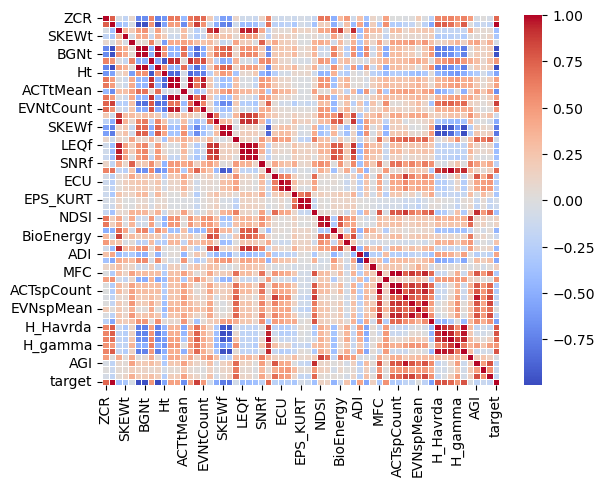

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_acoustic_indices.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths = .5)
plt.show()

### Outliers

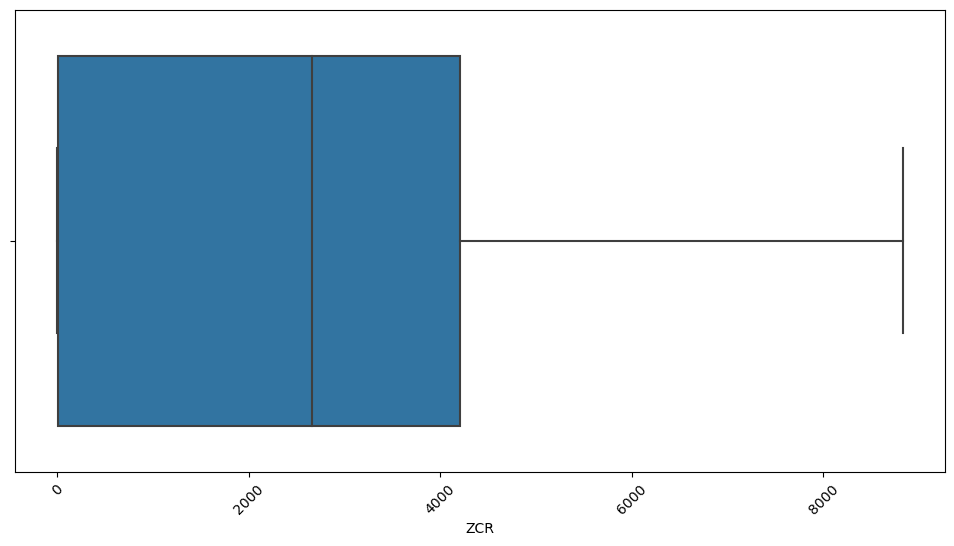

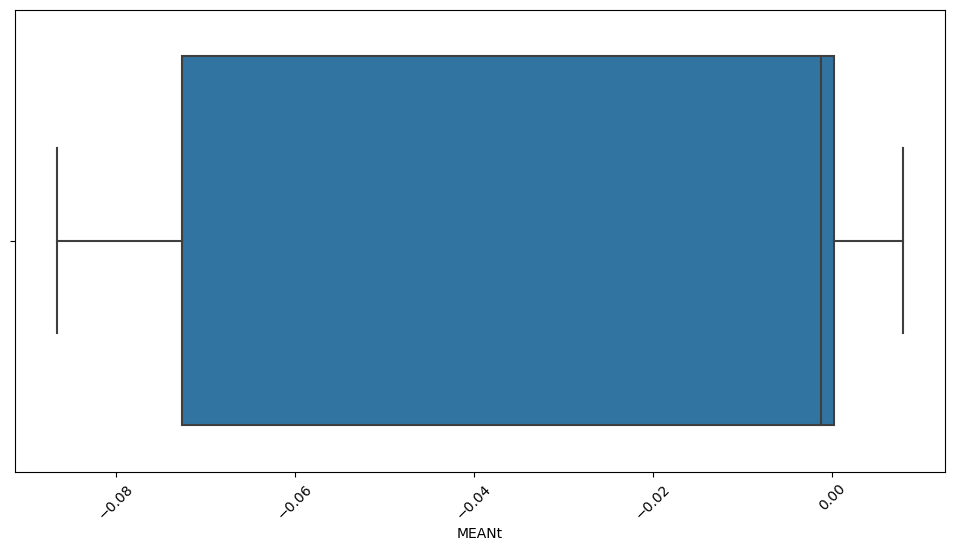

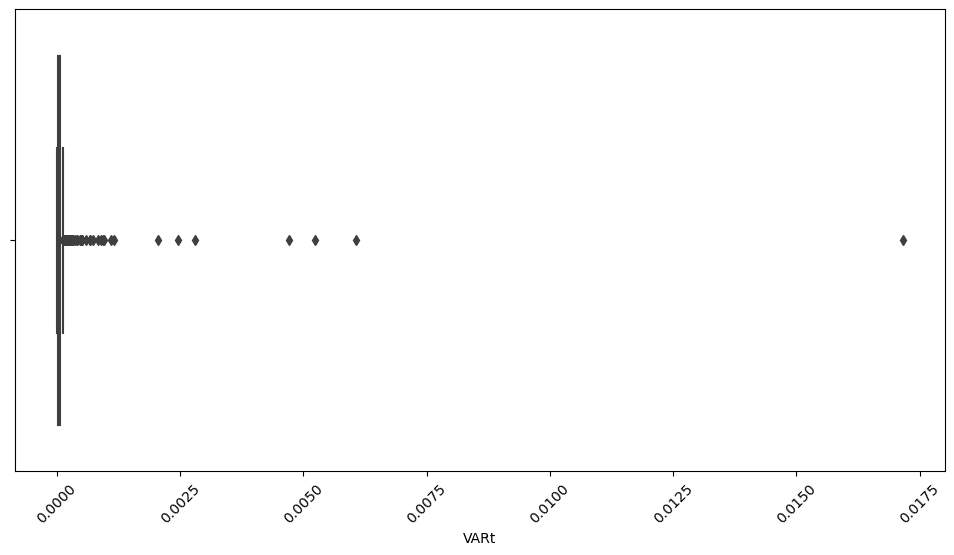

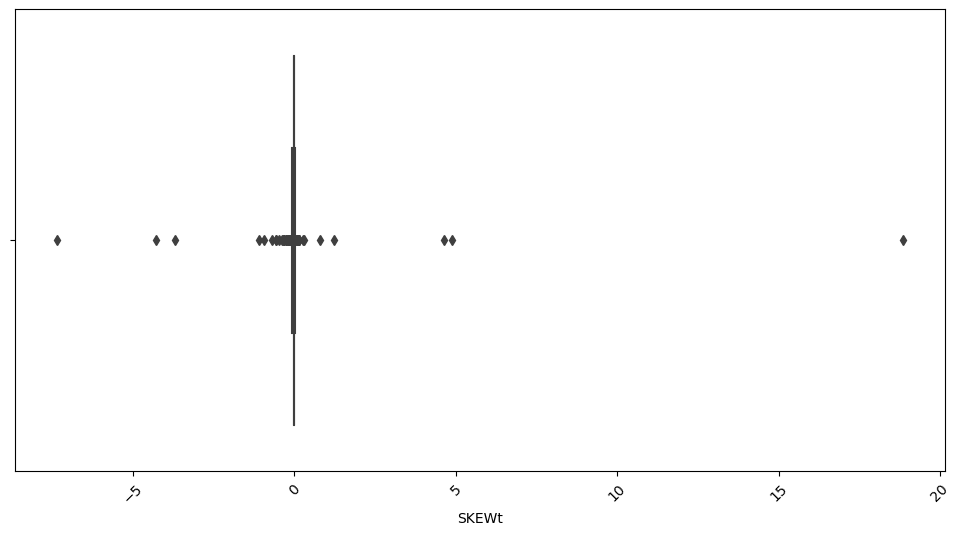

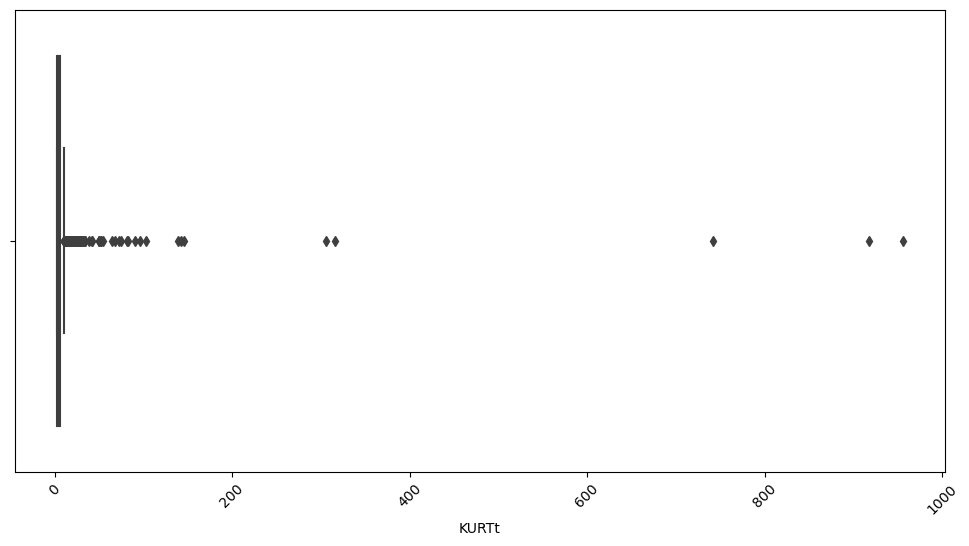

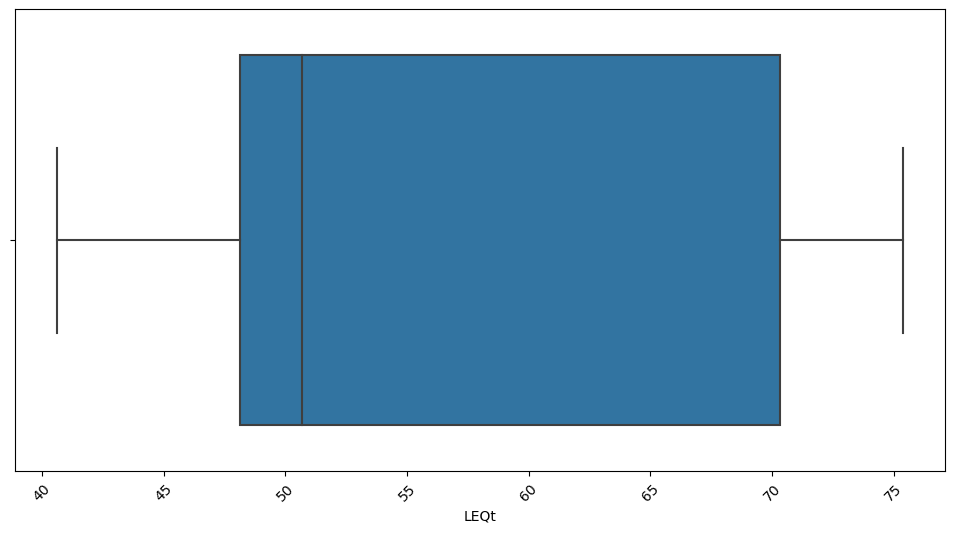

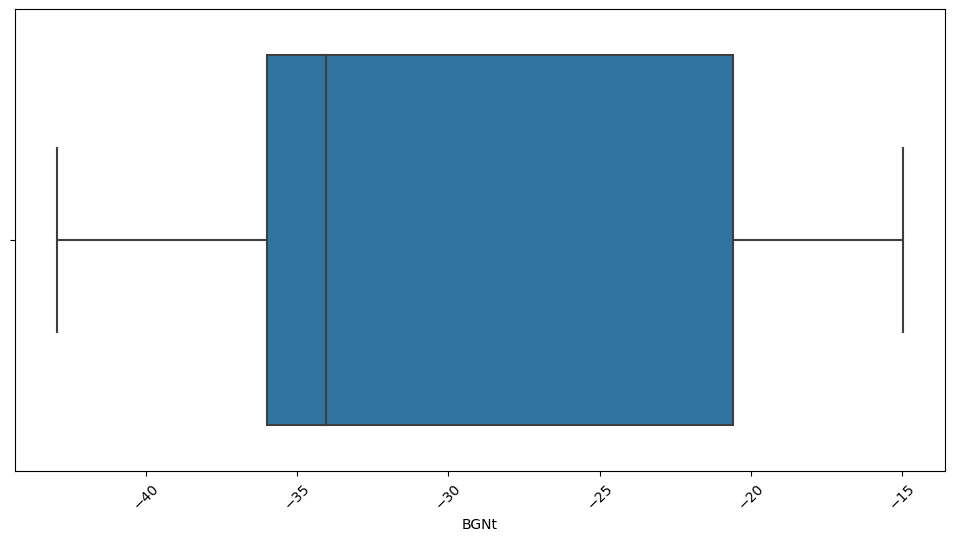

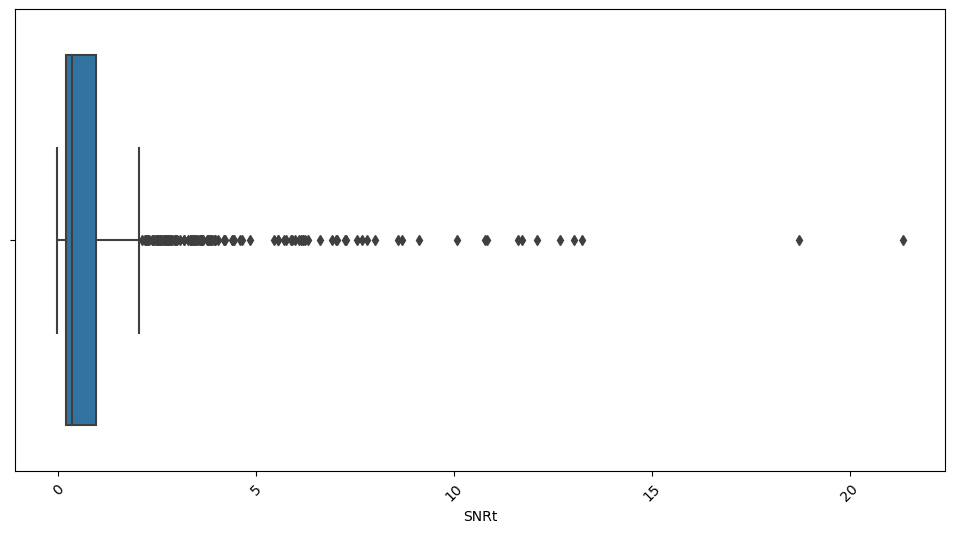

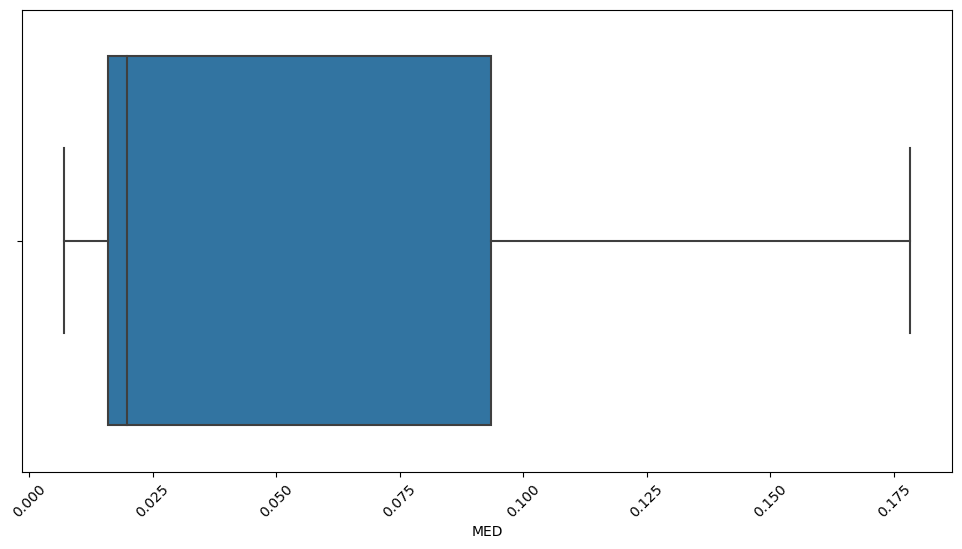

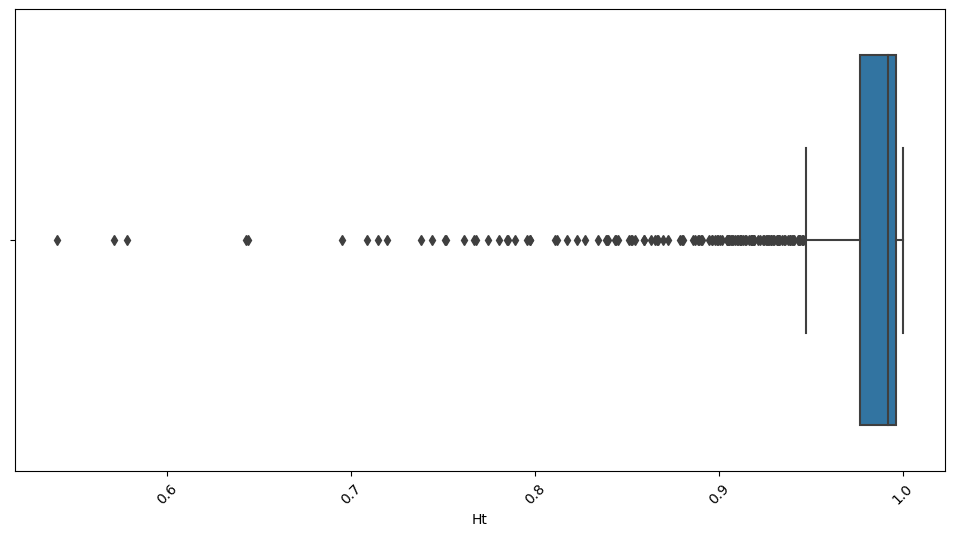

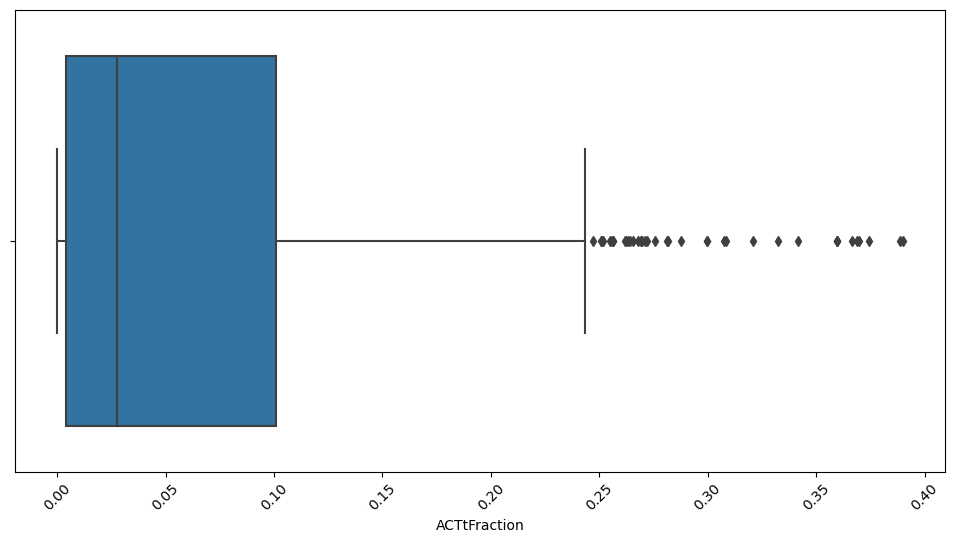

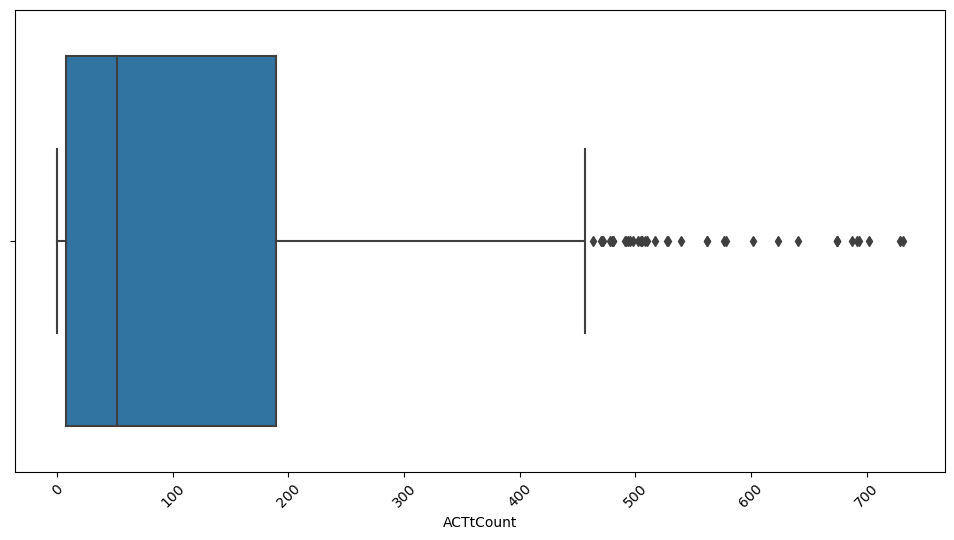

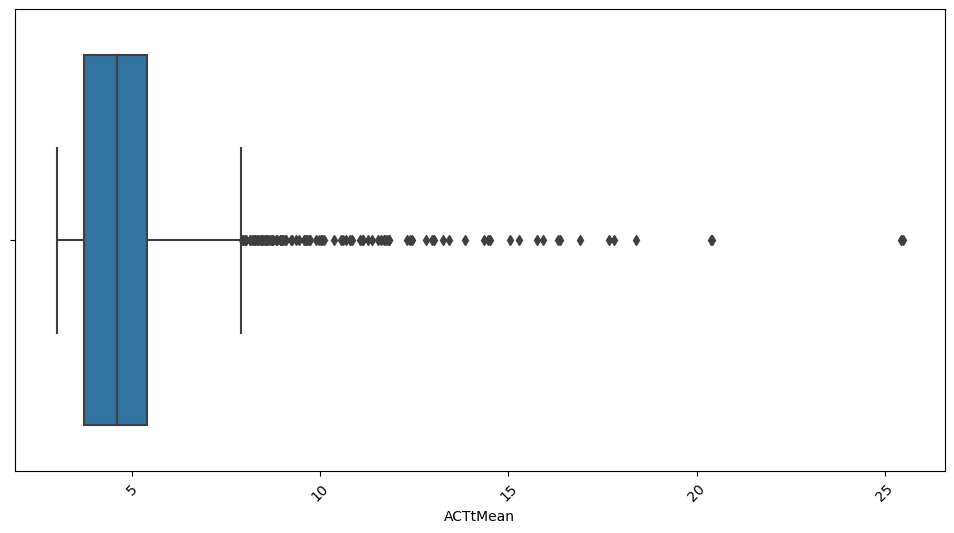

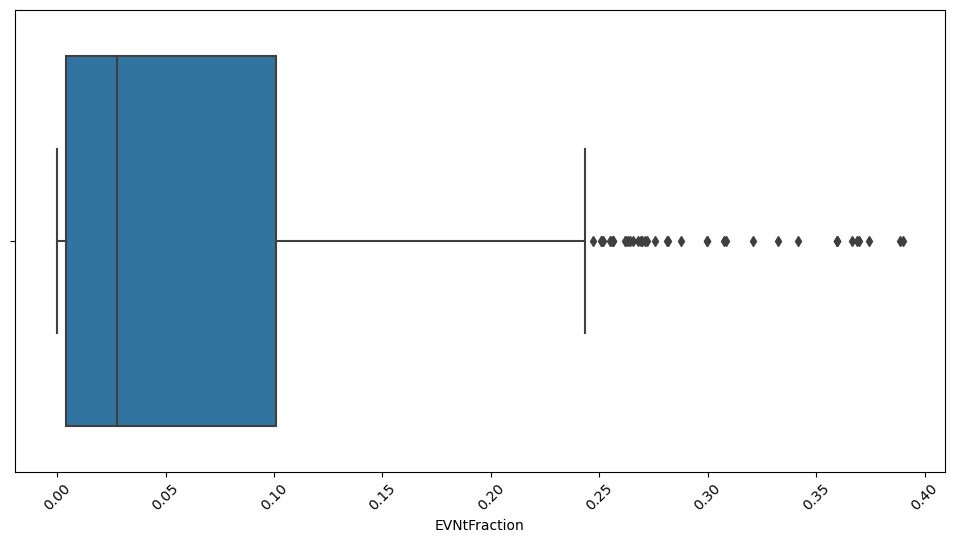

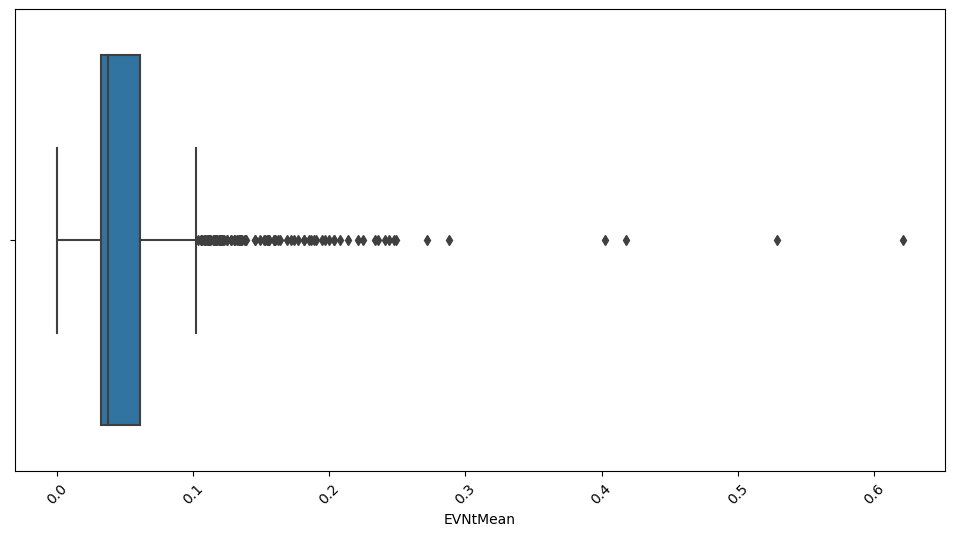

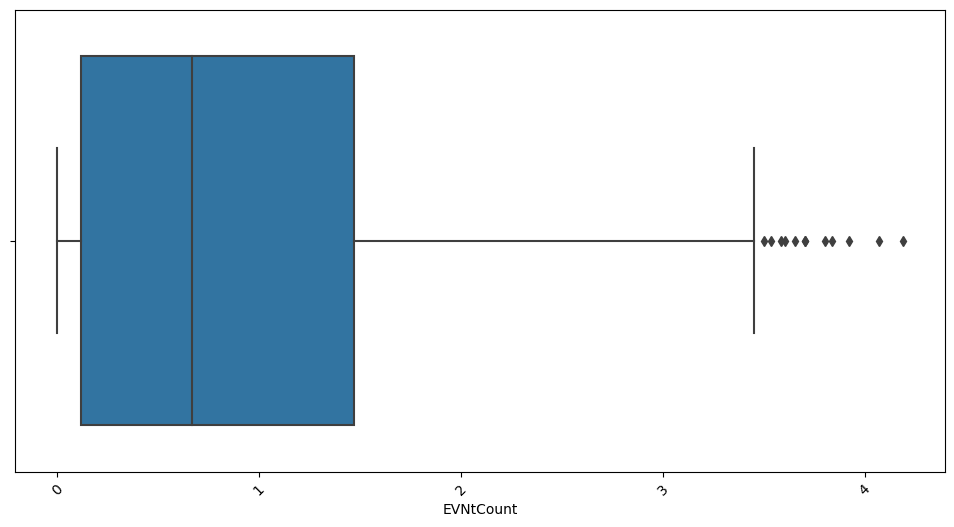

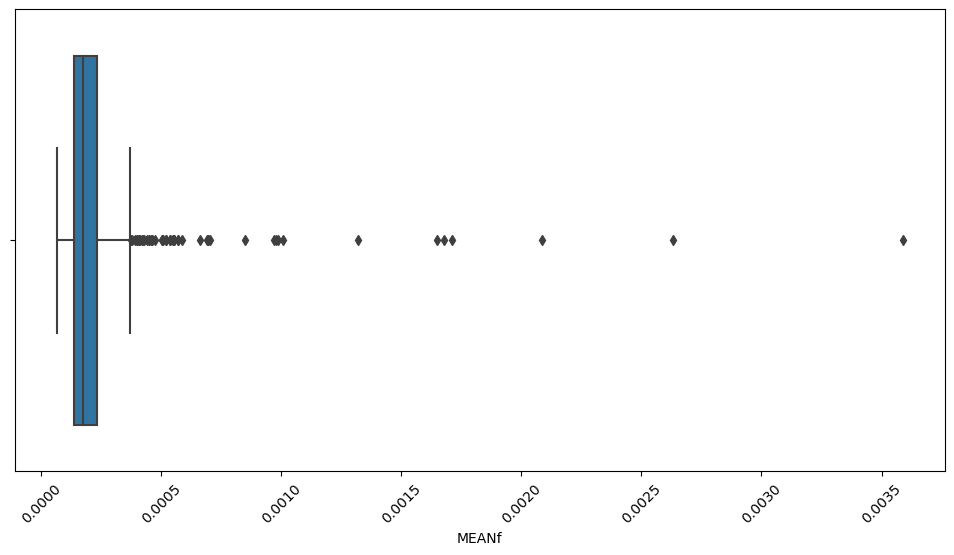

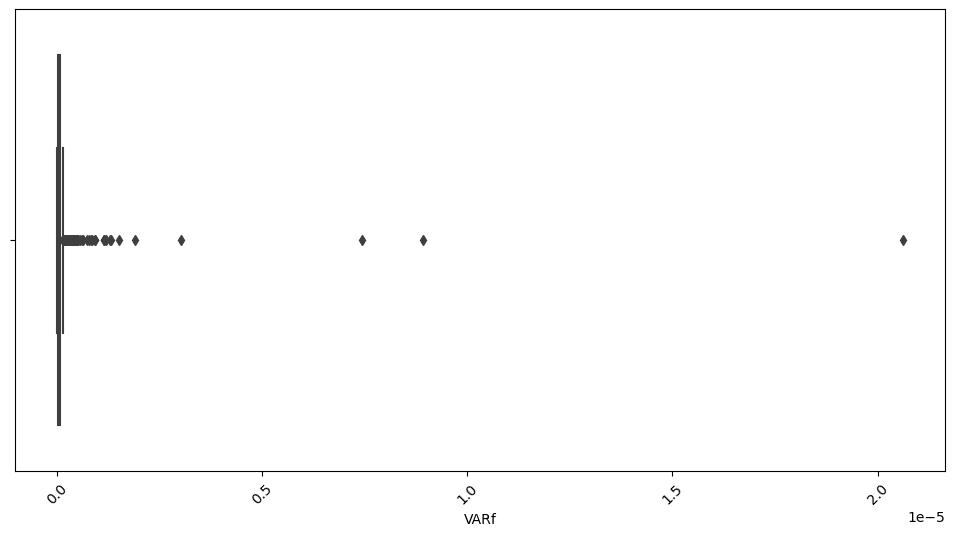

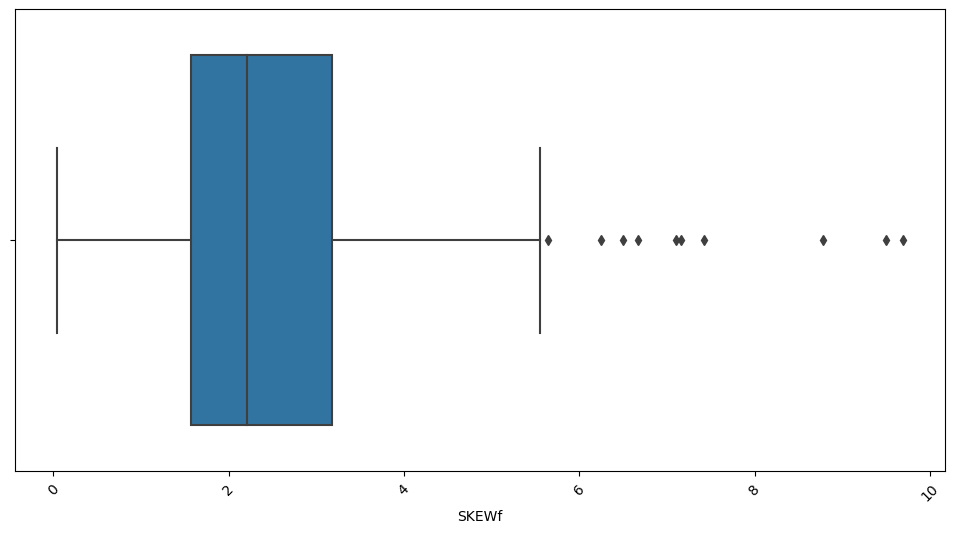

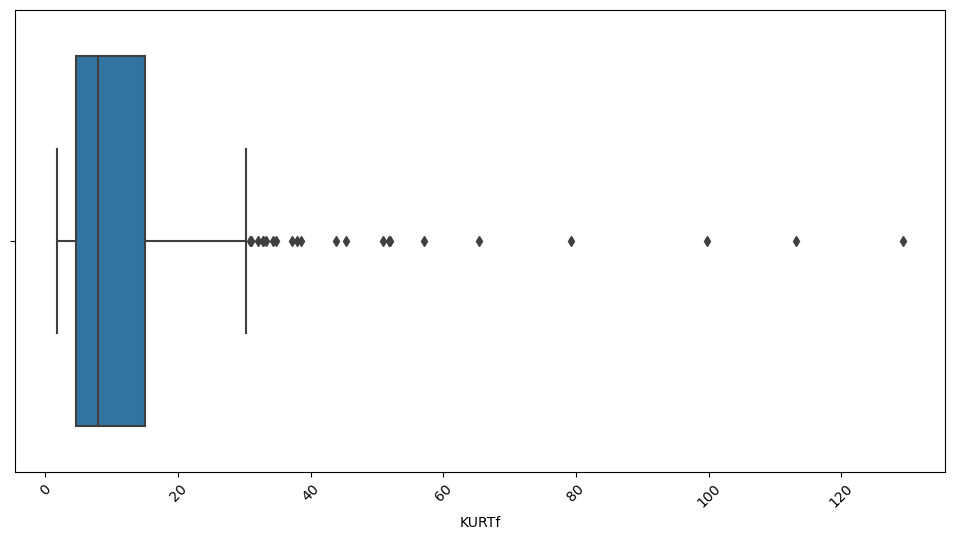

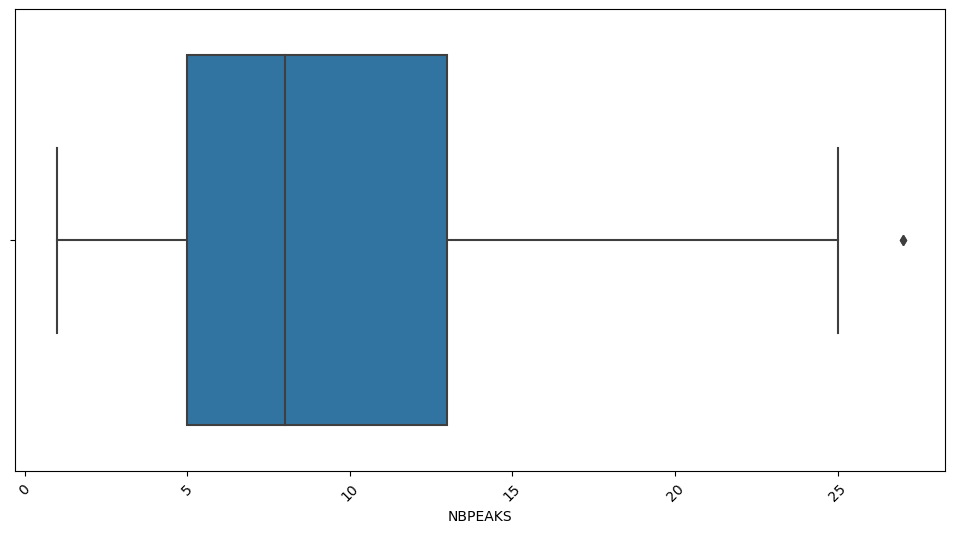

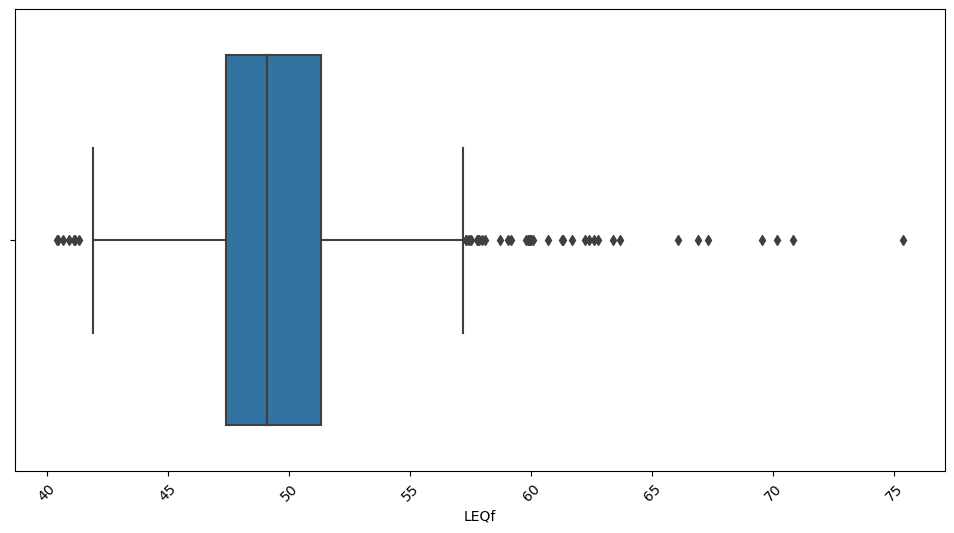

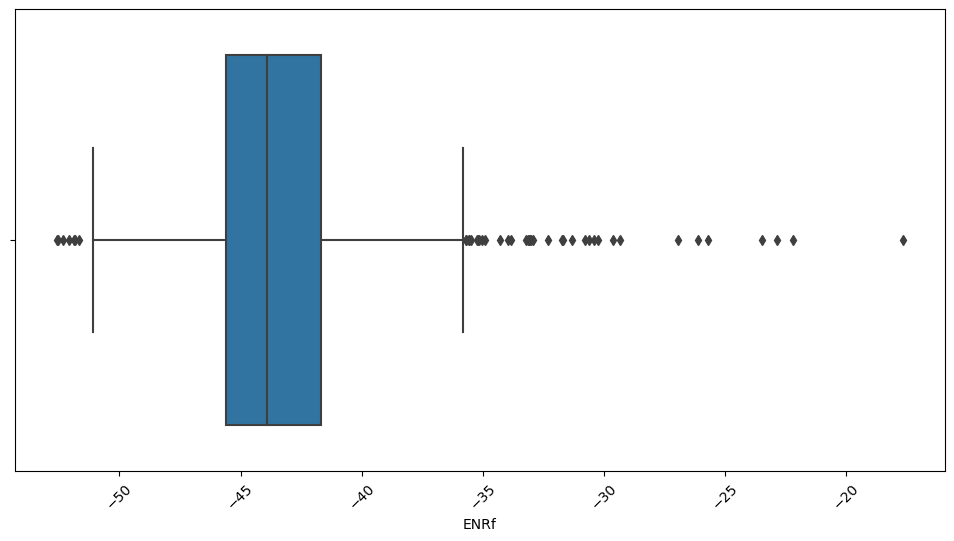

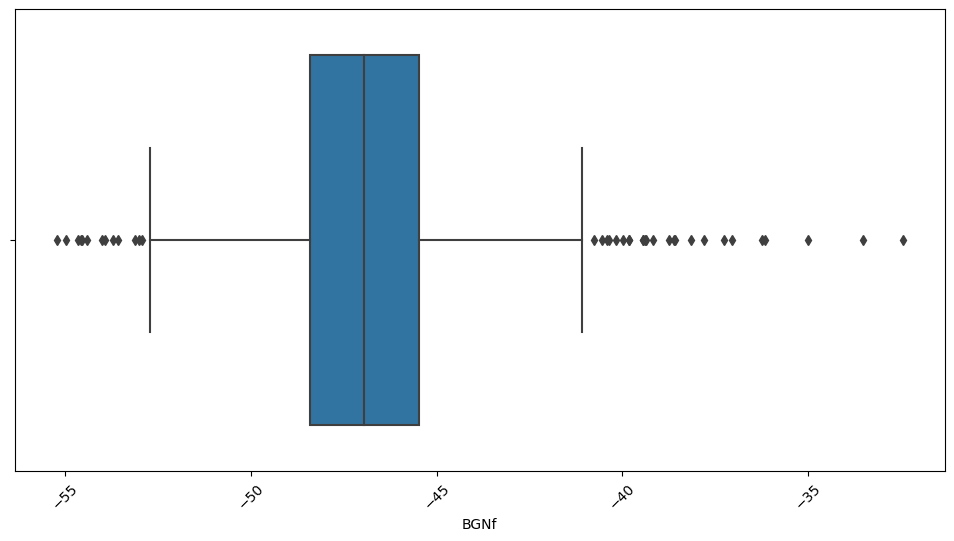

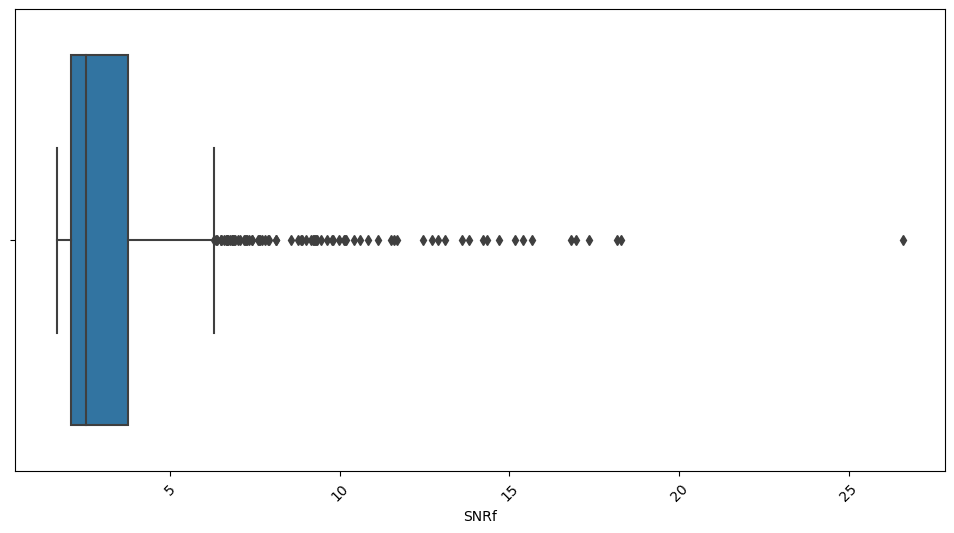

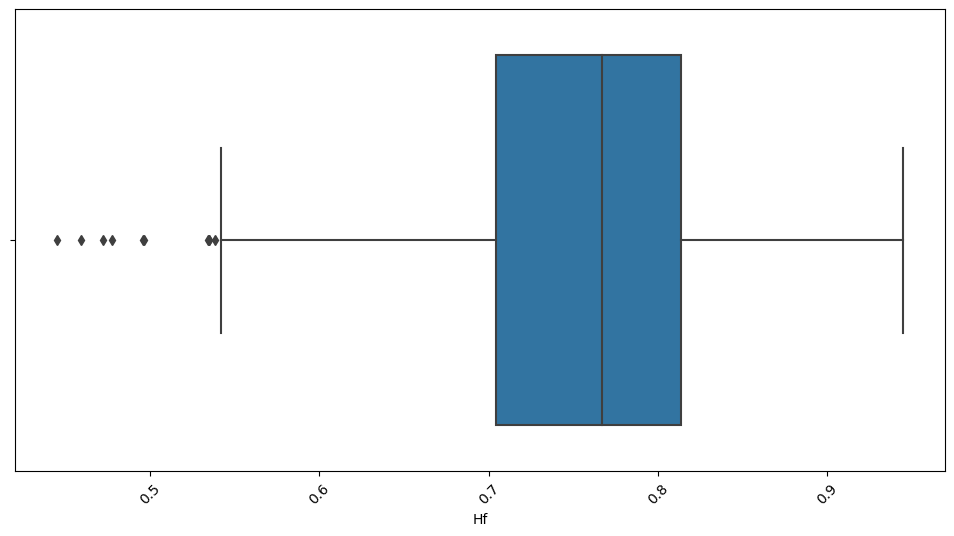

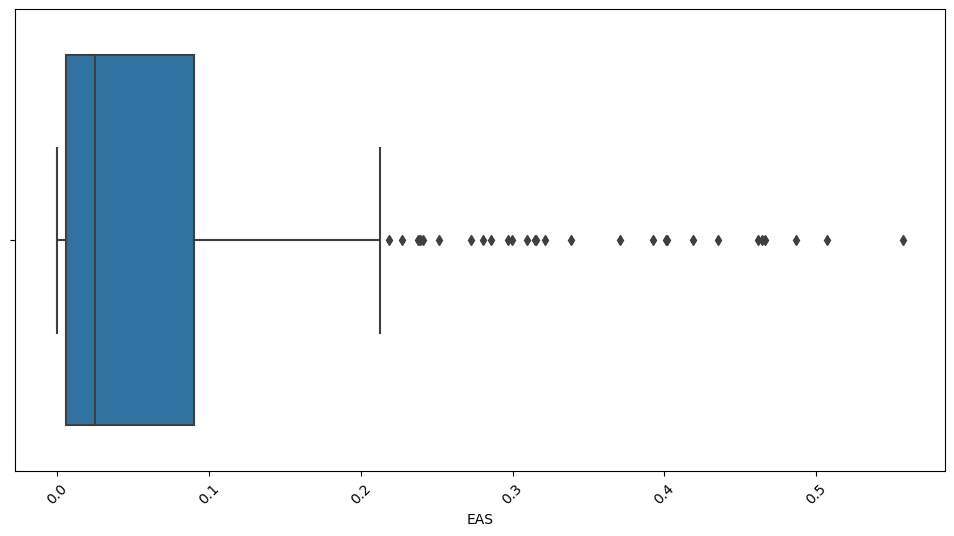

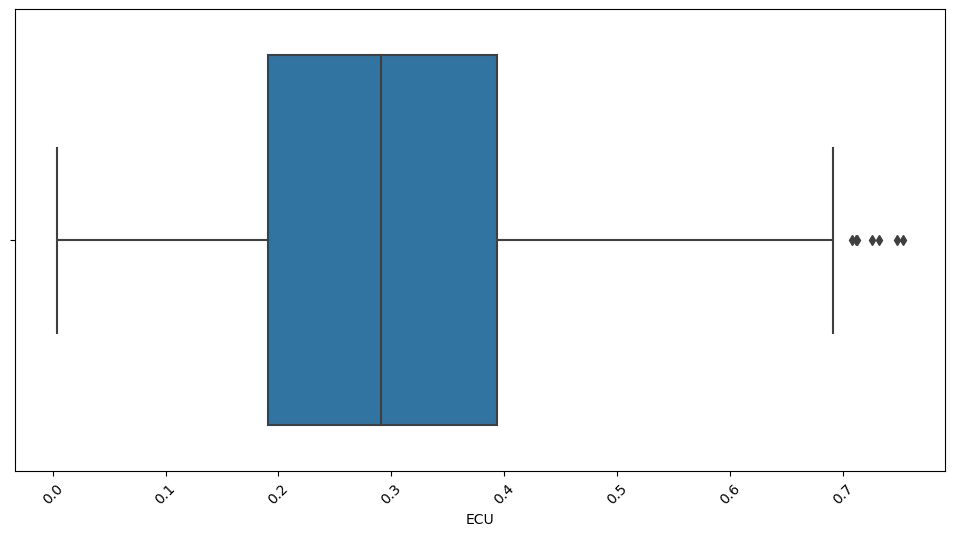

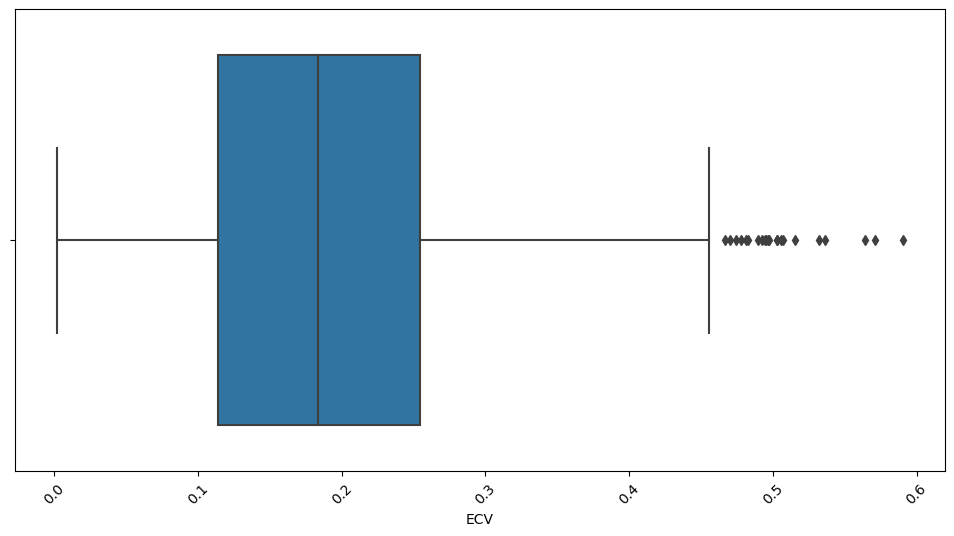

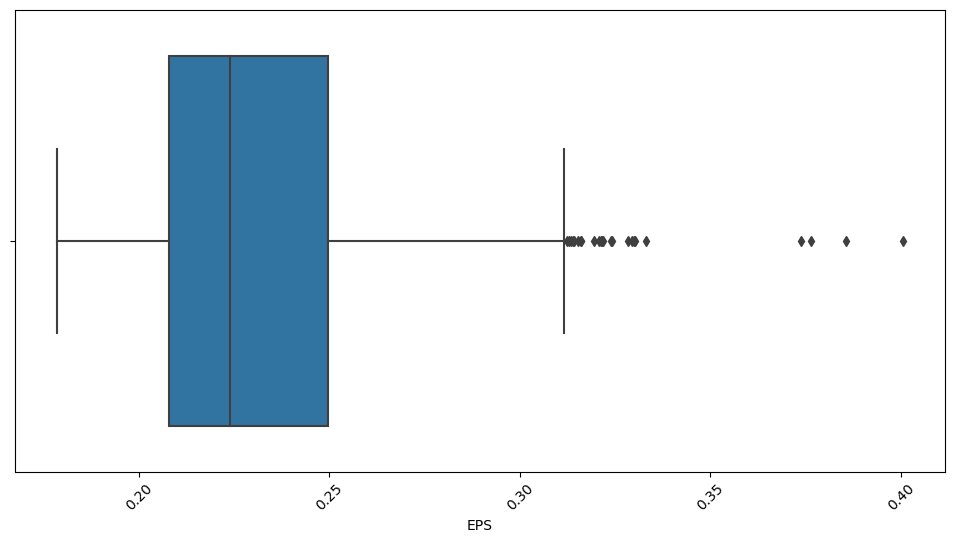

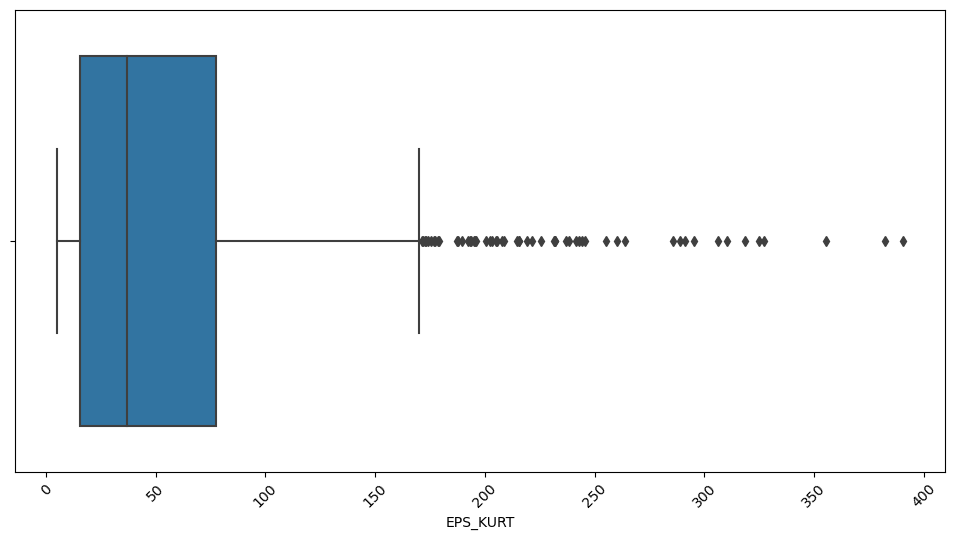

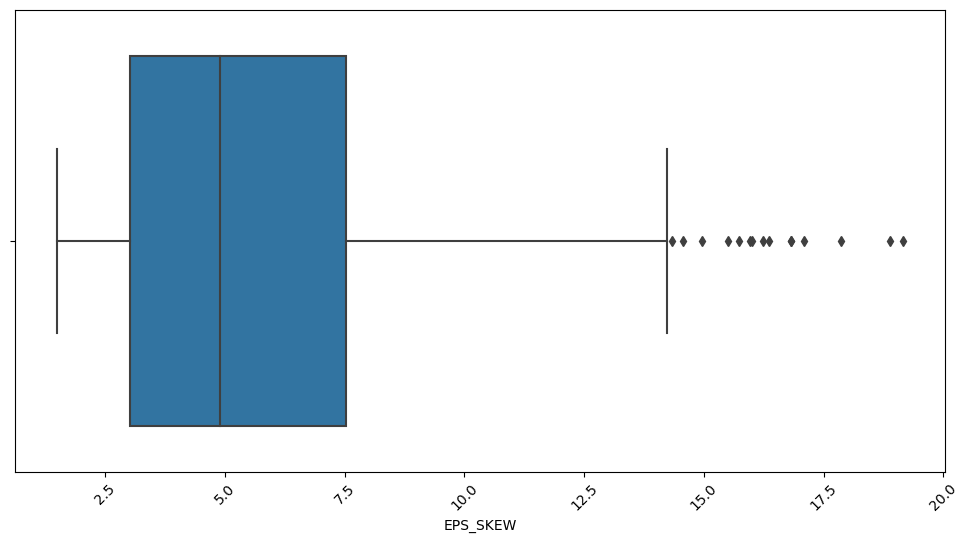

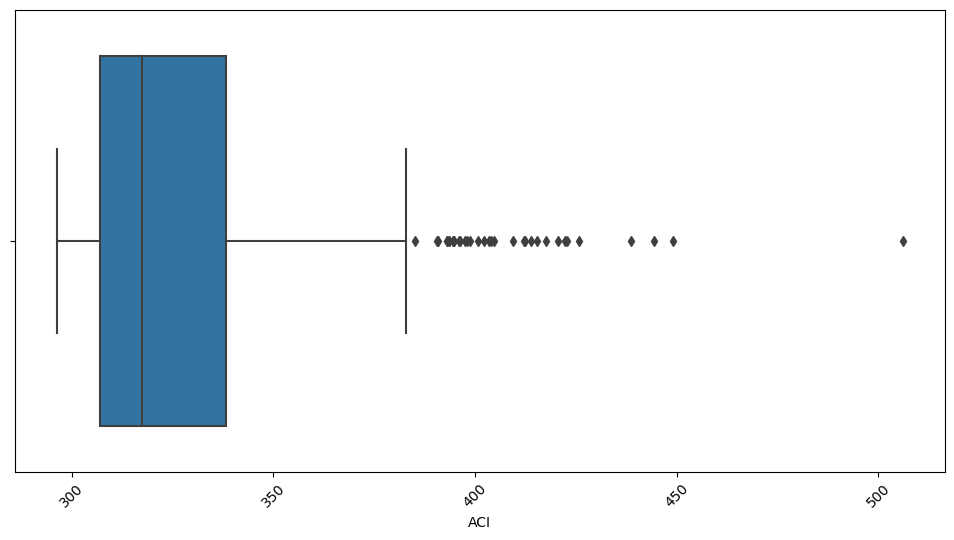

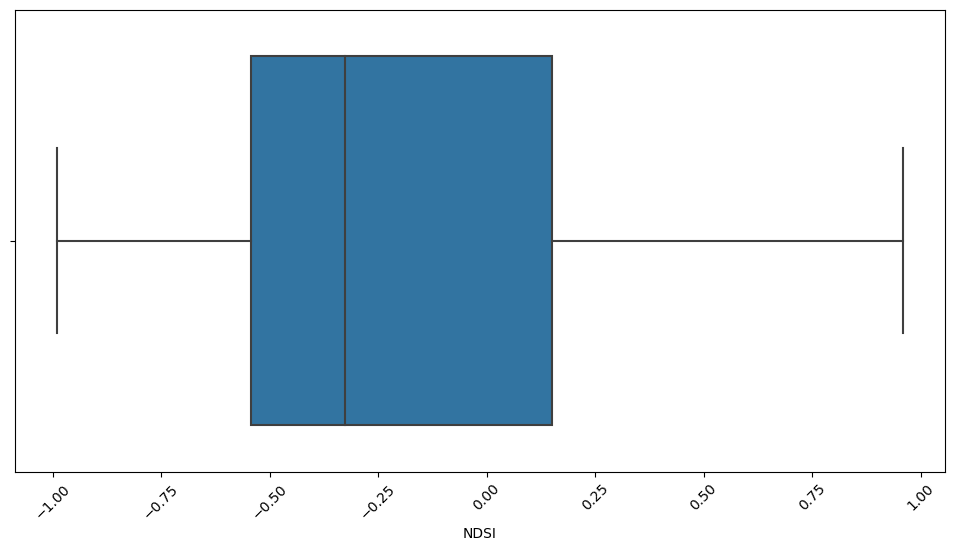

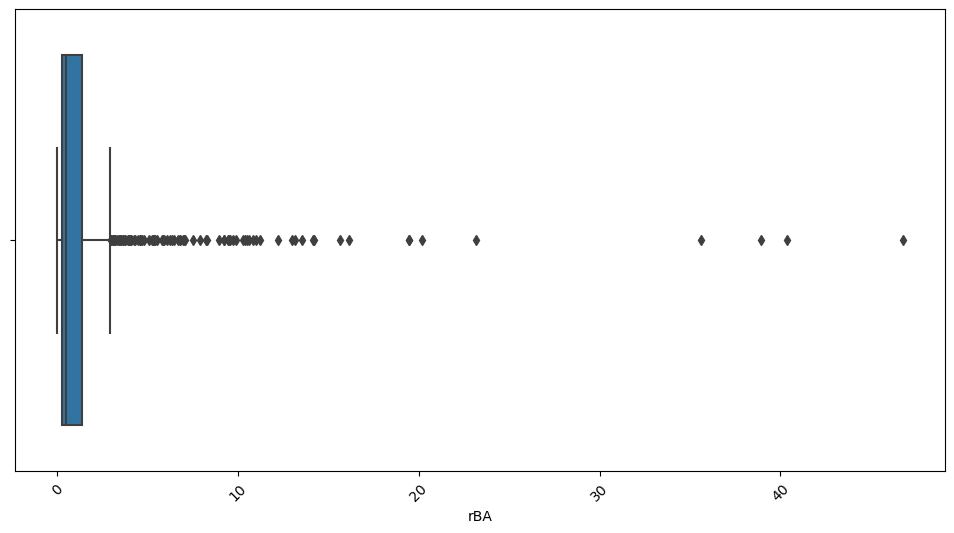

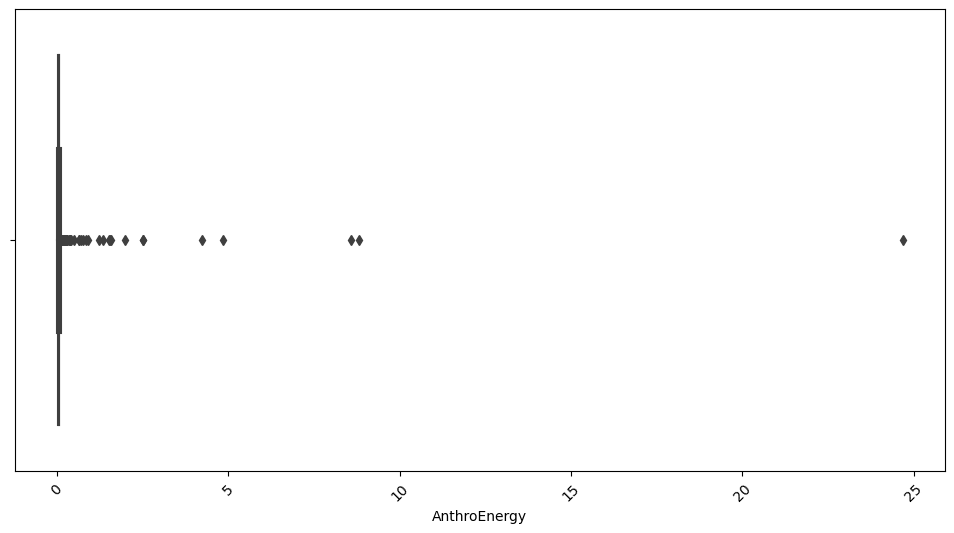

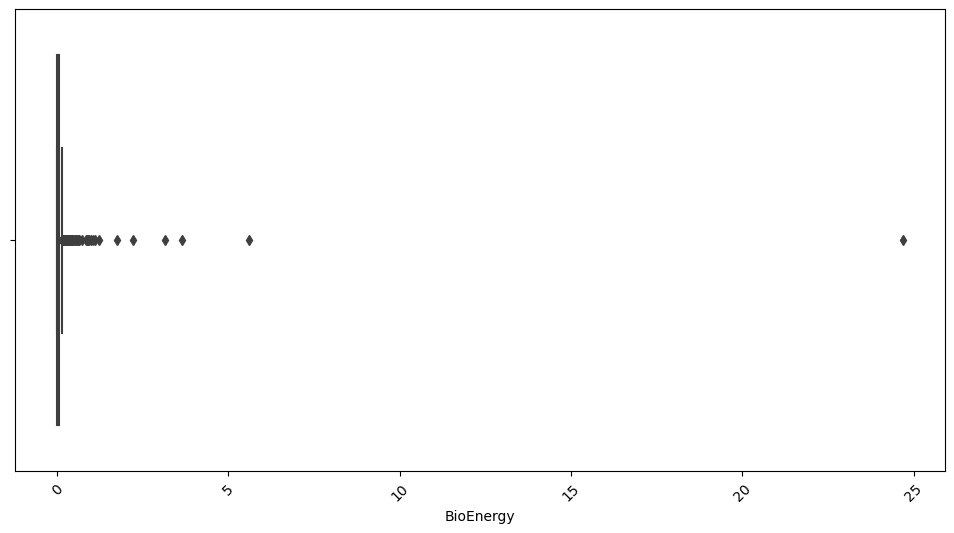

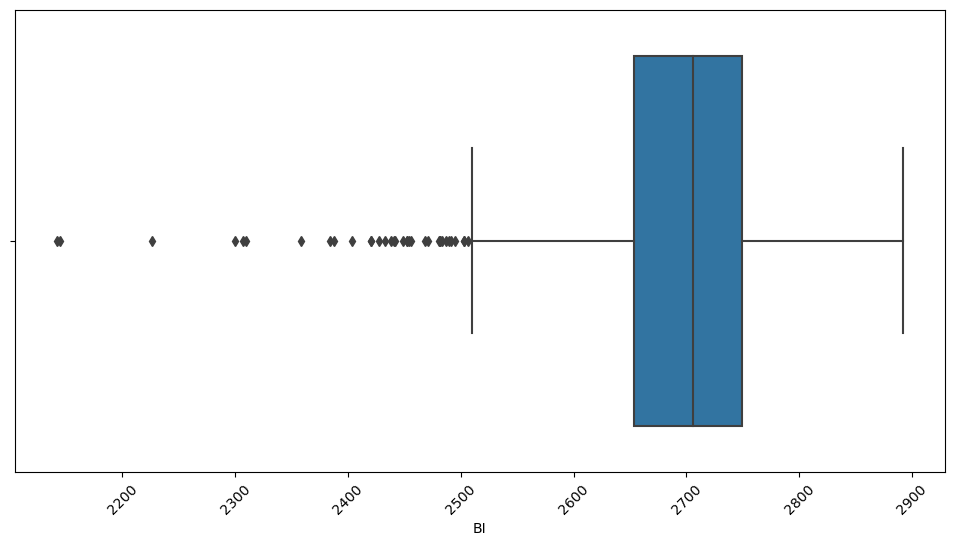

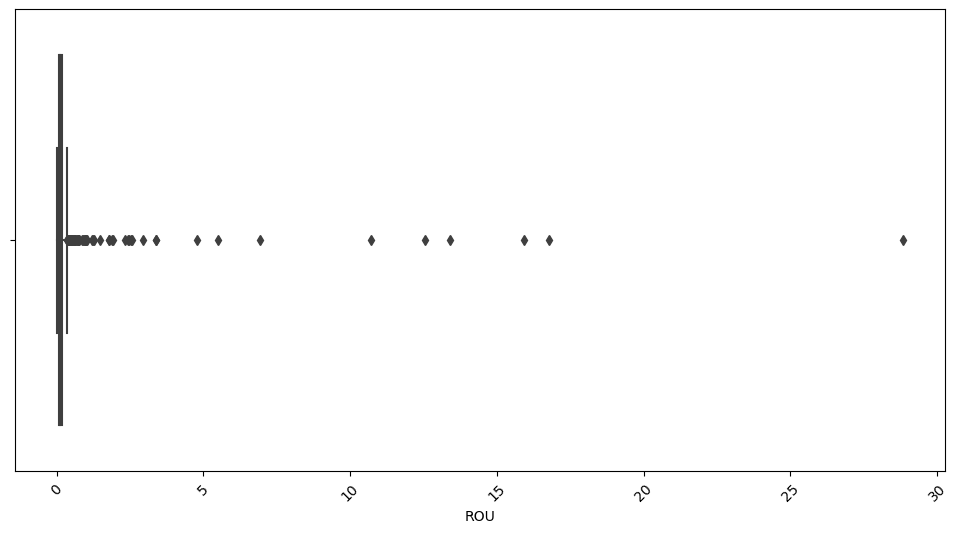

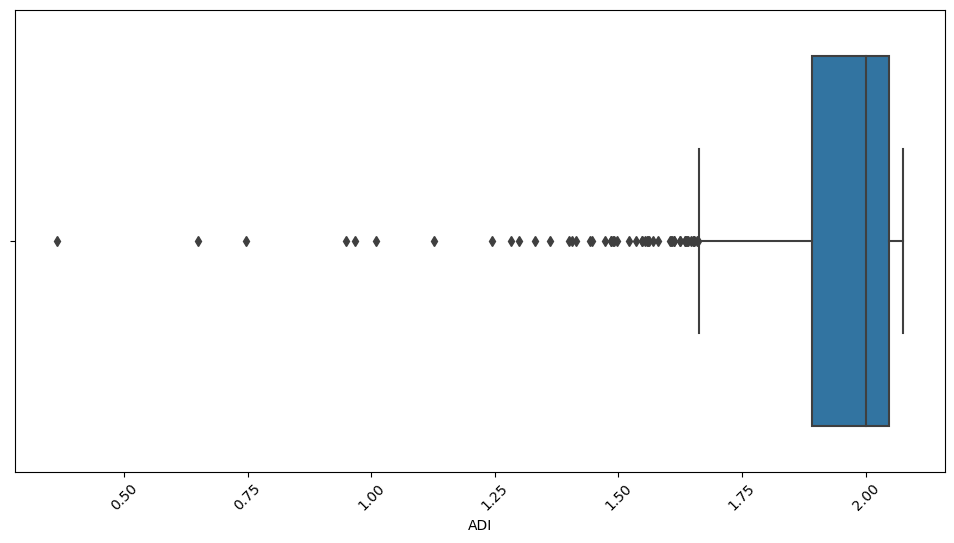

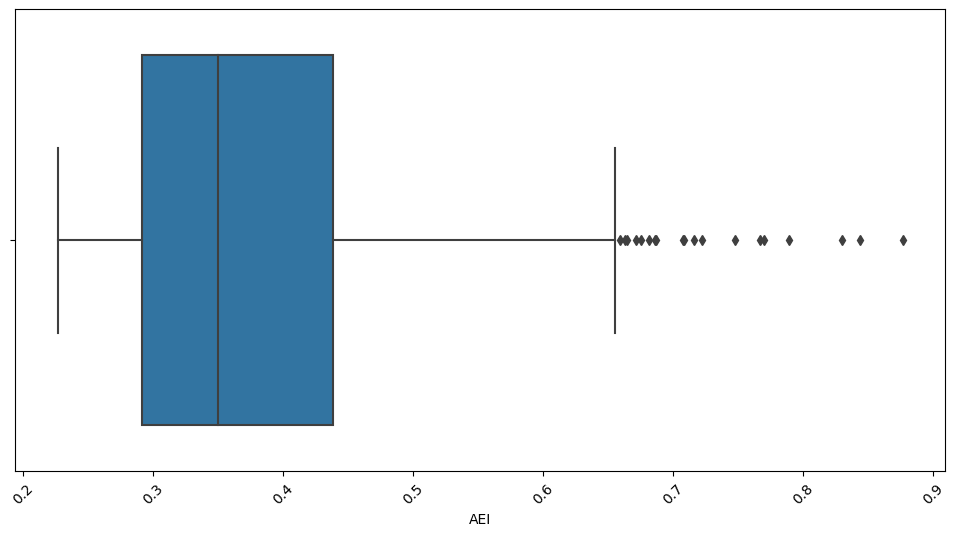

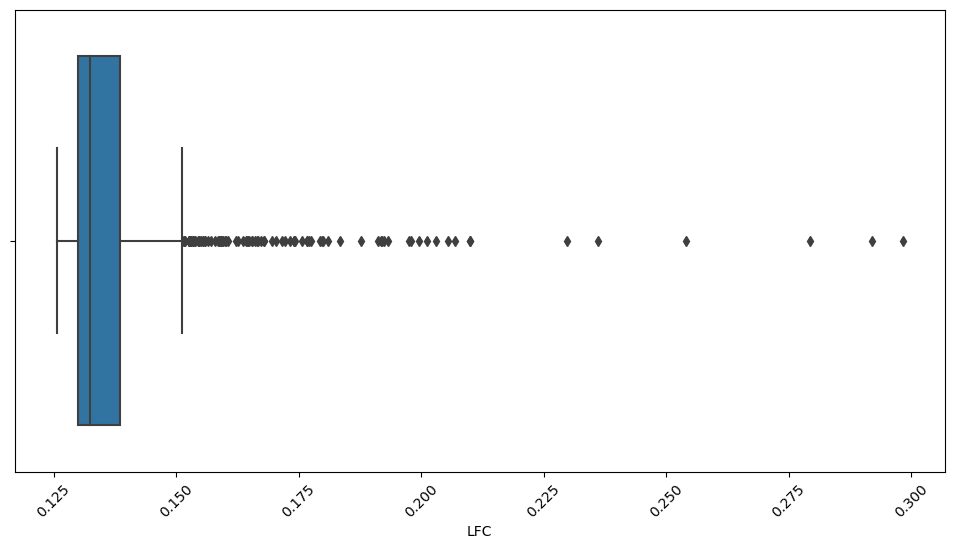

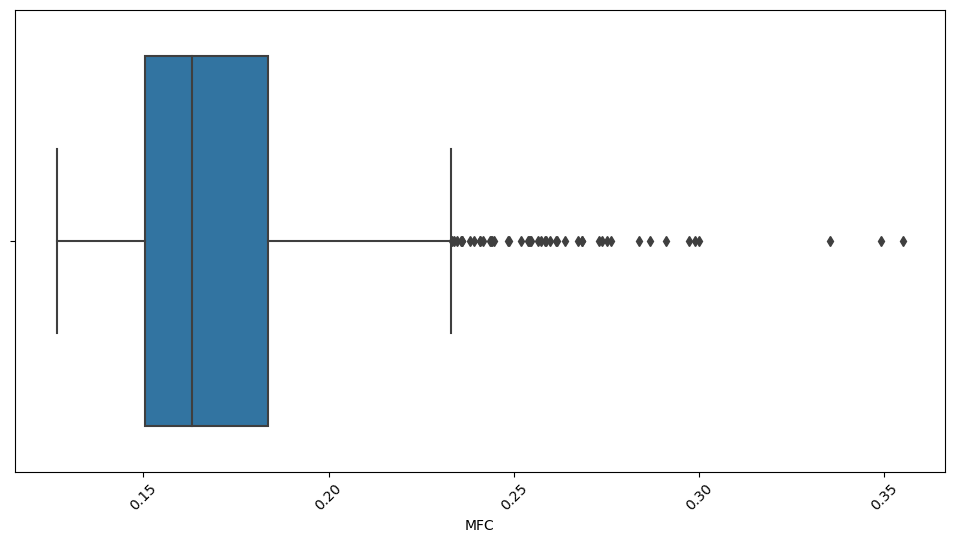

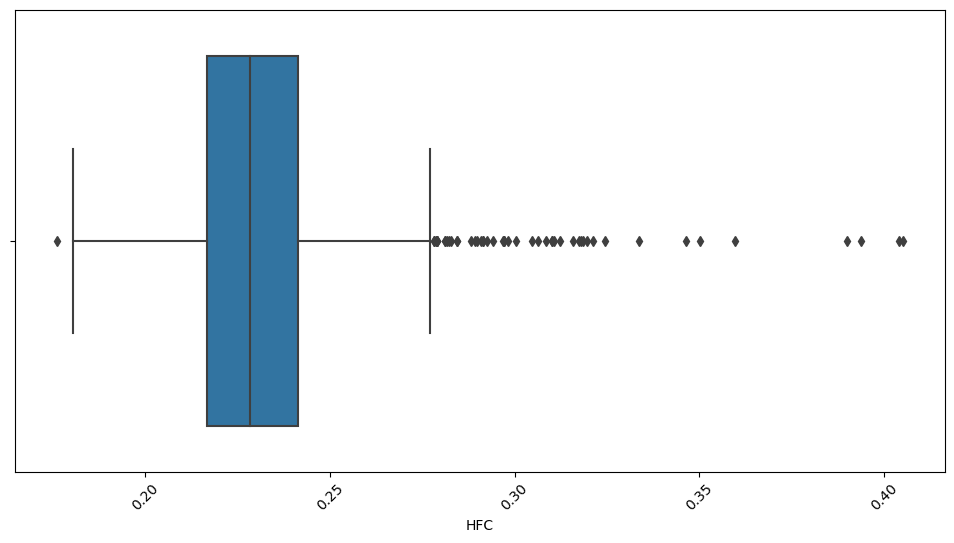

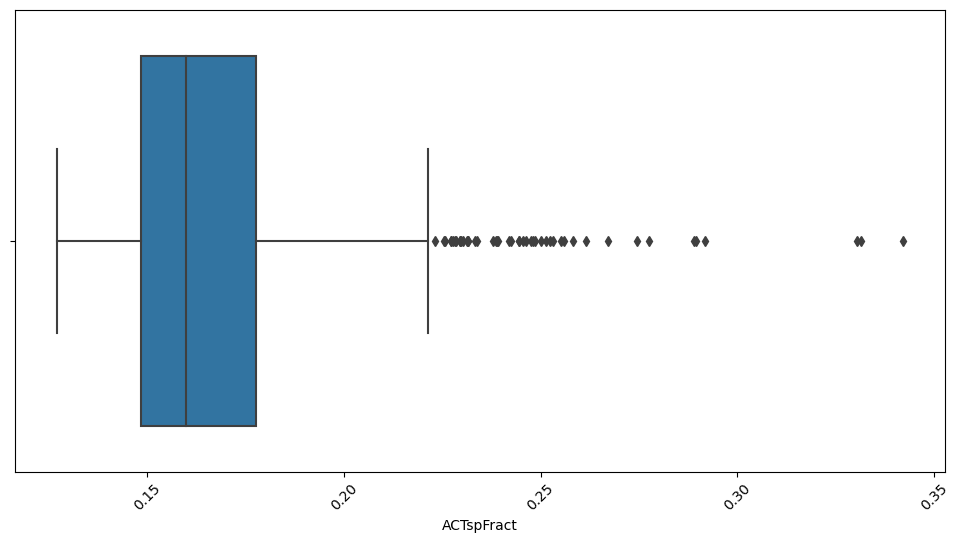

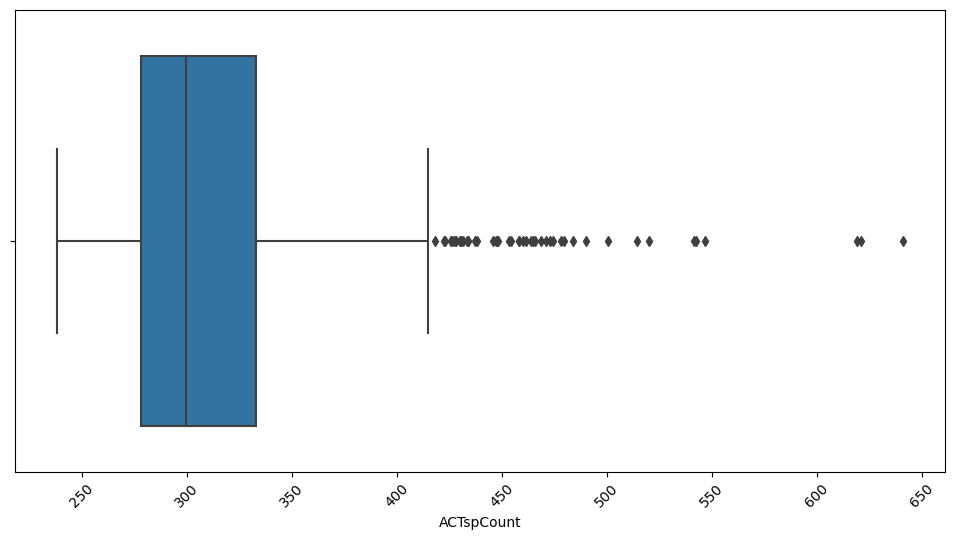

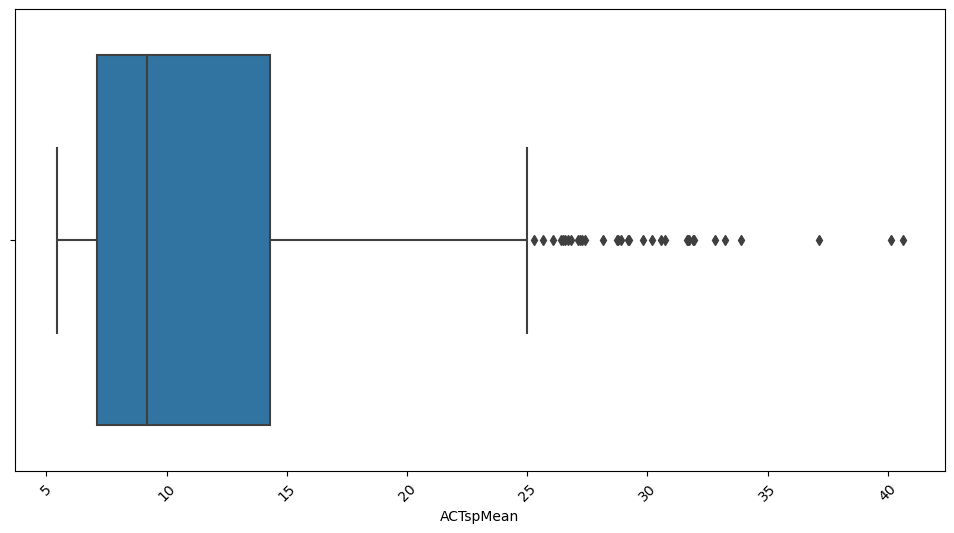

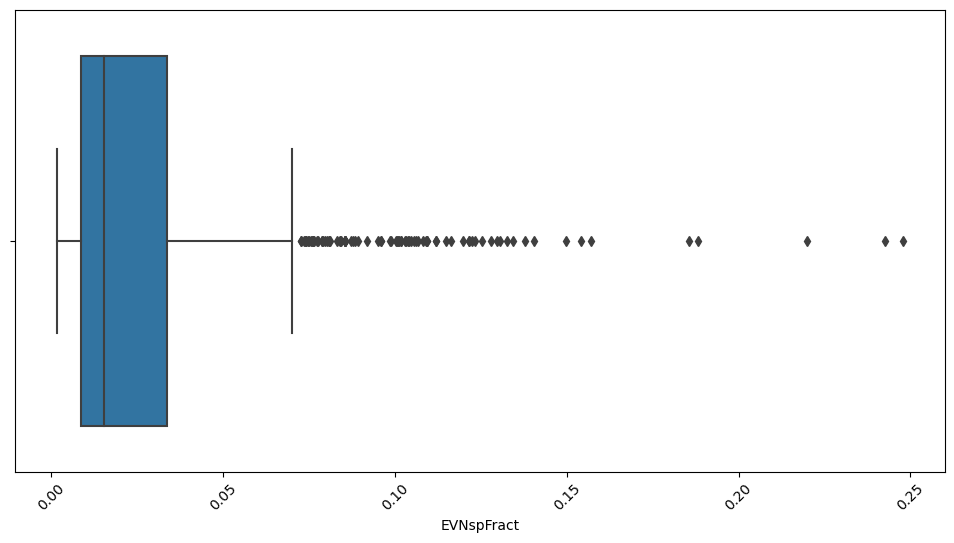

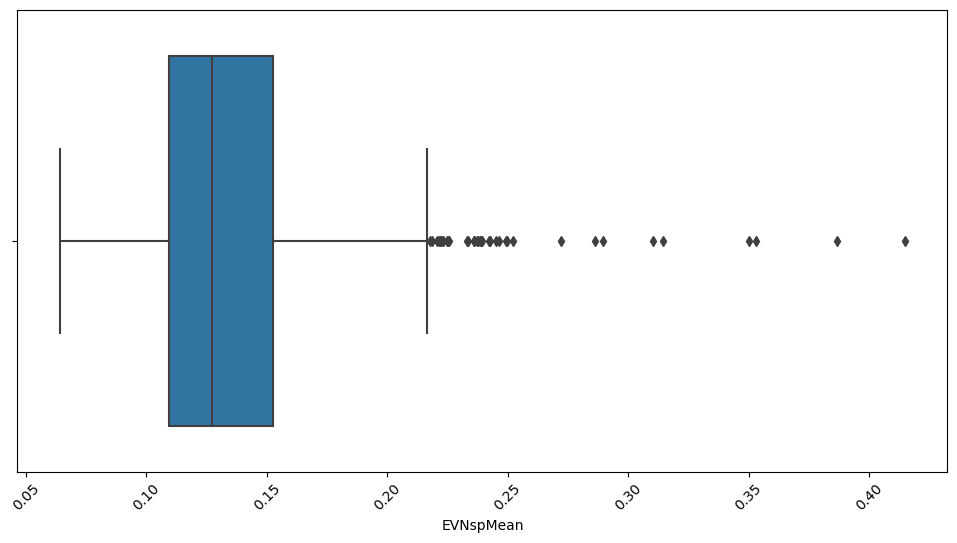

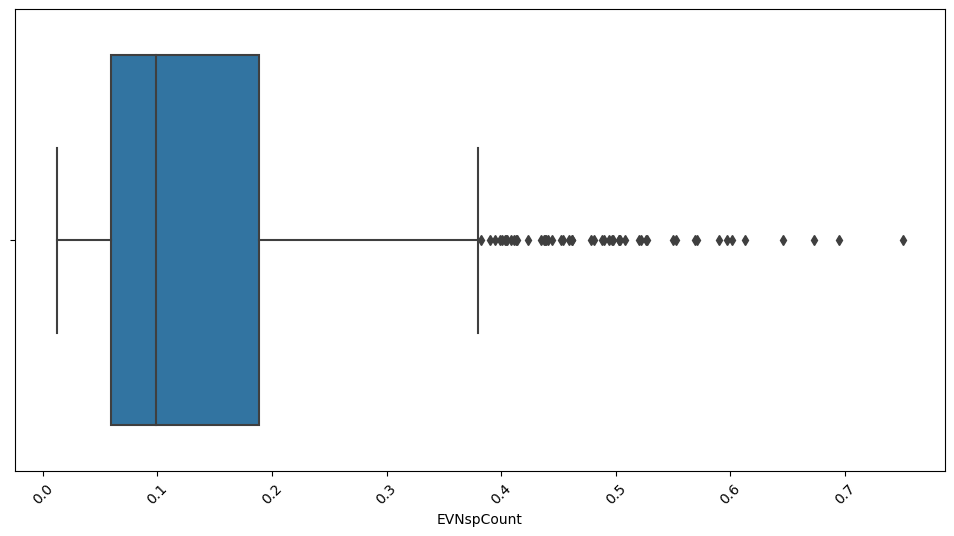

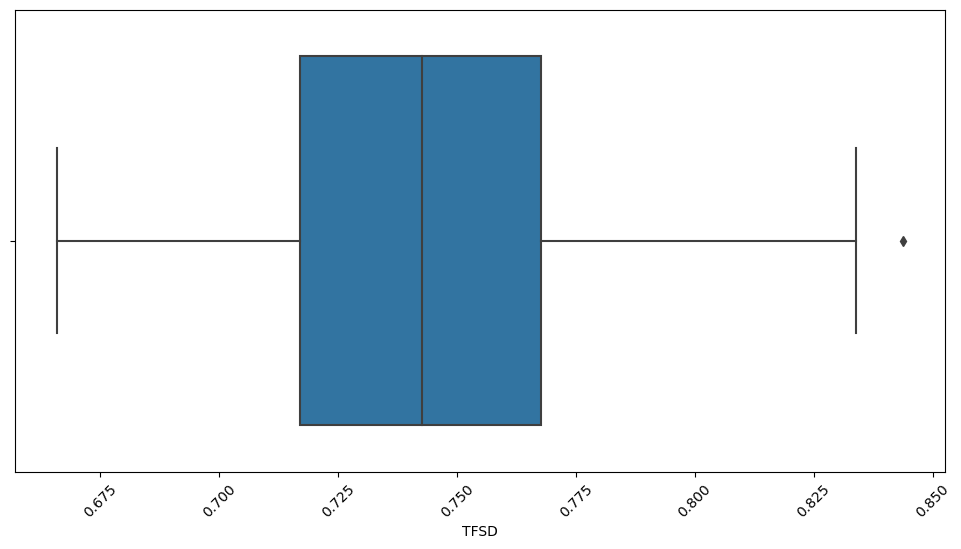

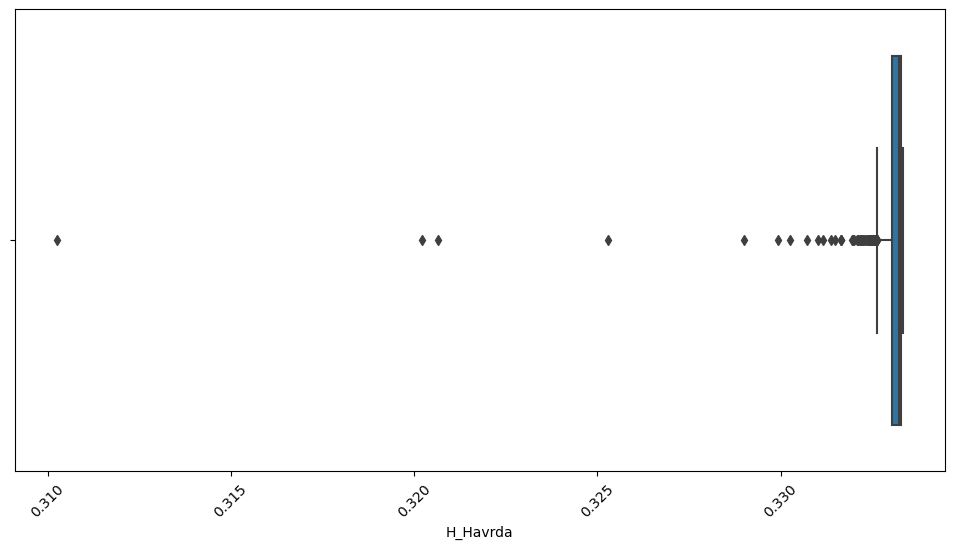

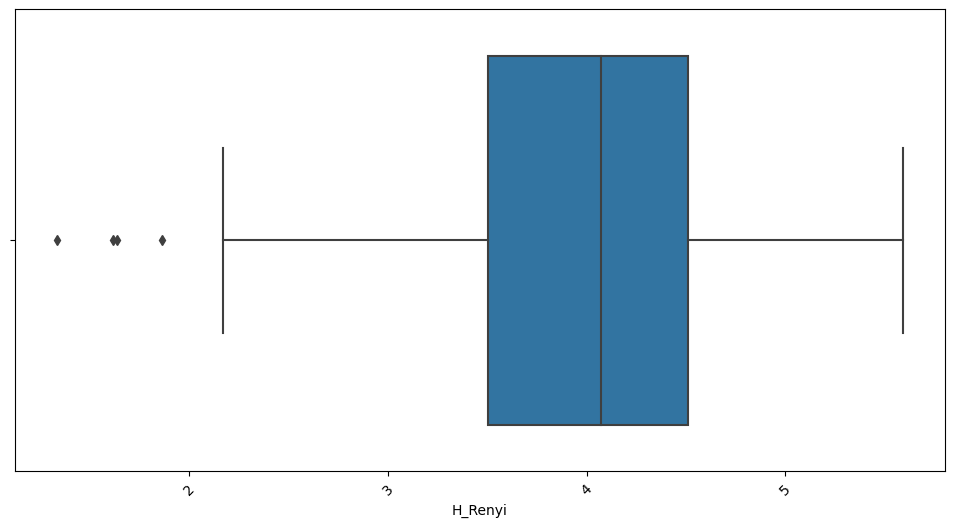

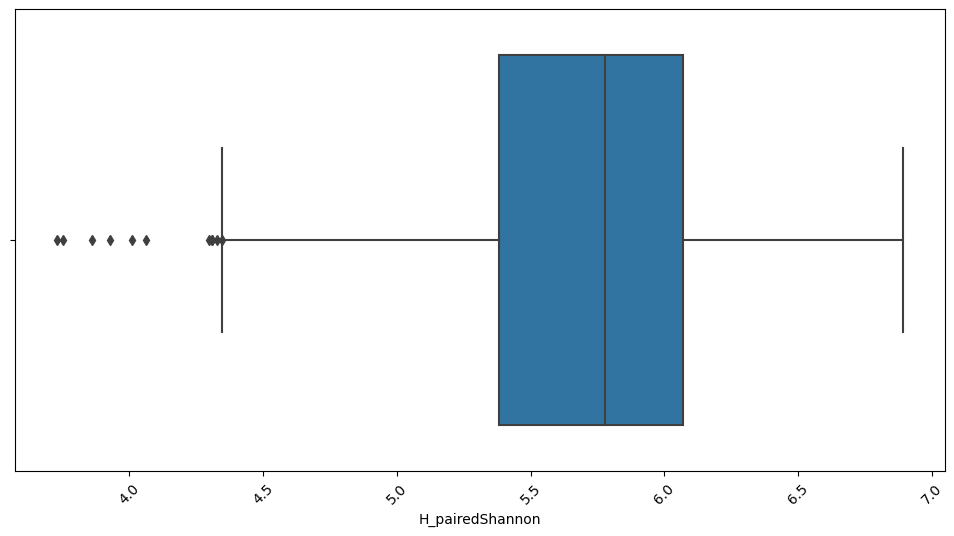

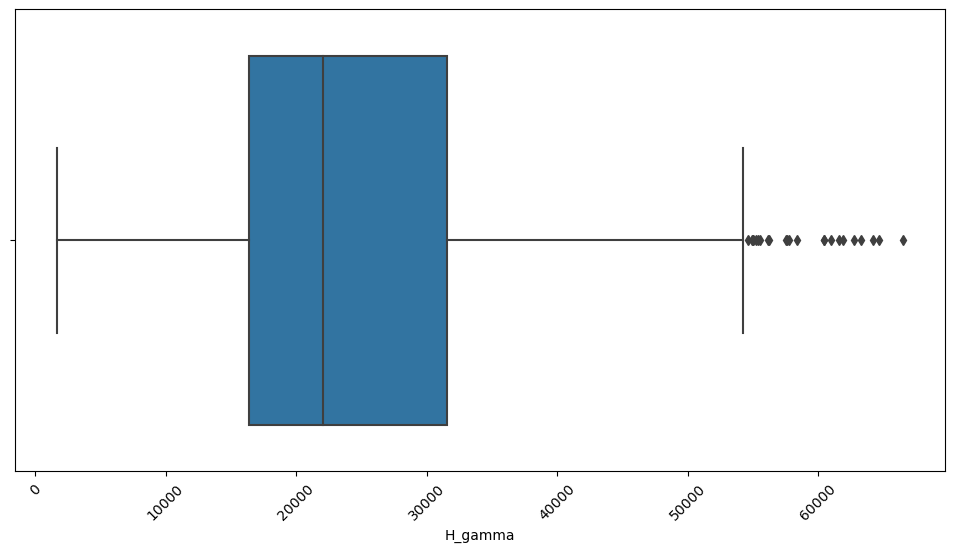

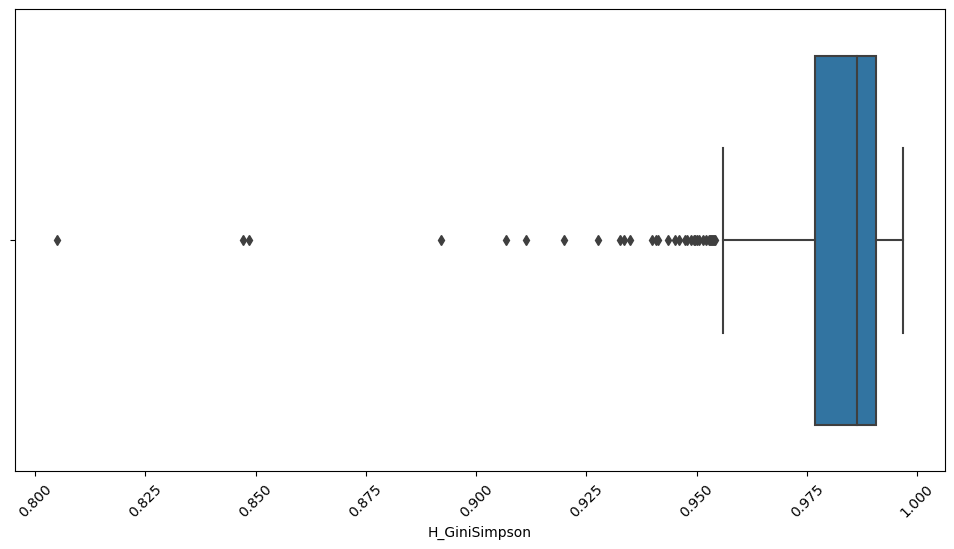

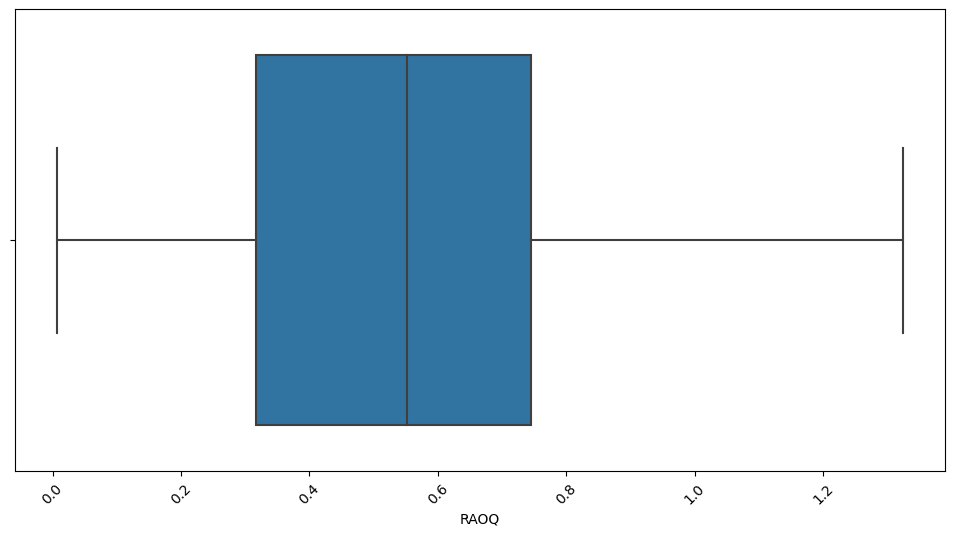

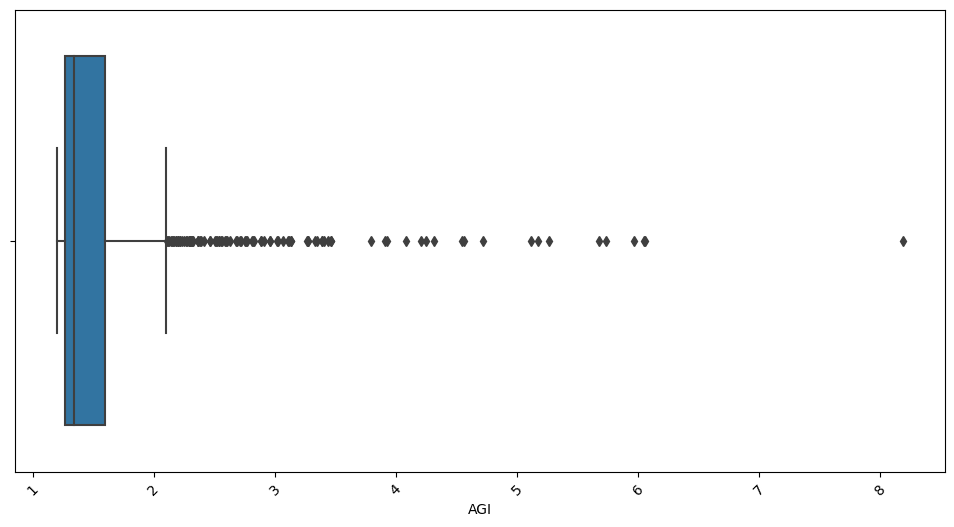

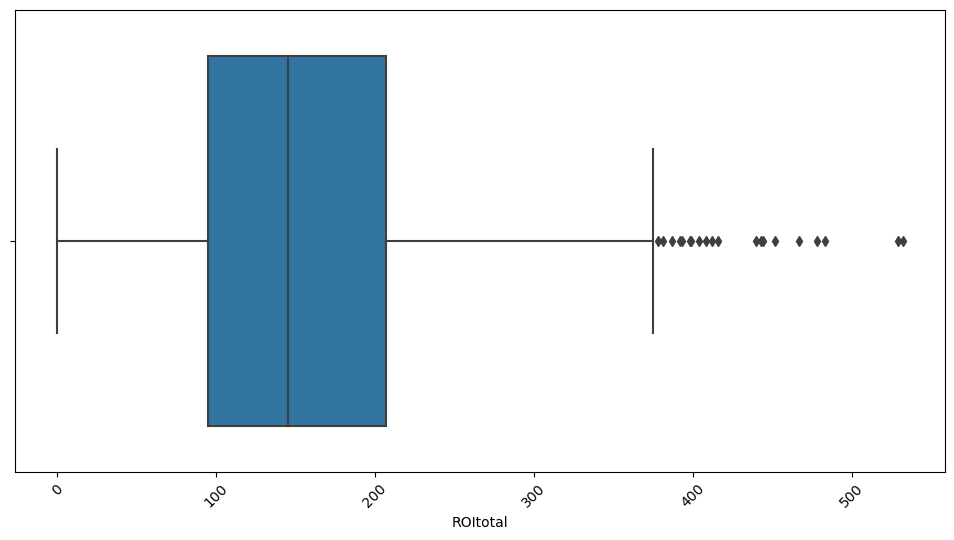

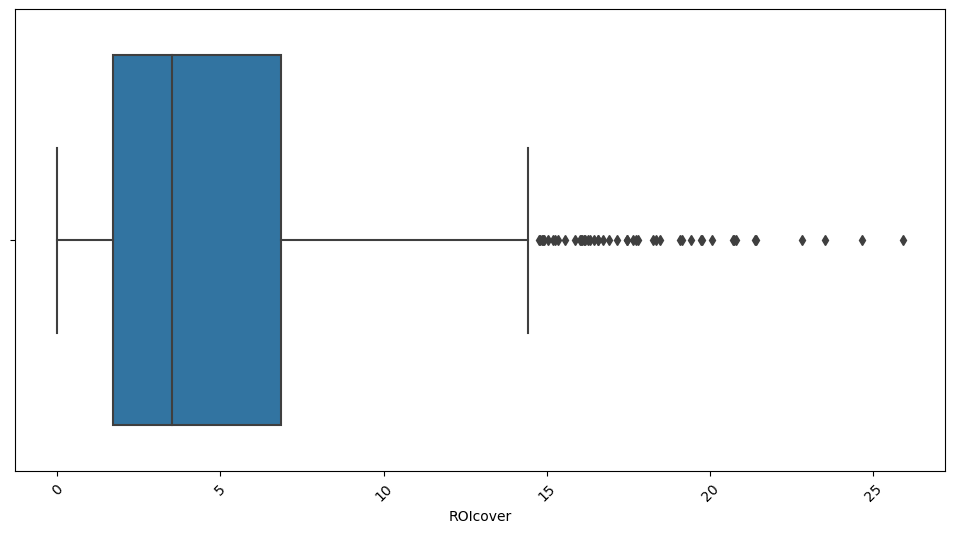

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1200x600 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in df_acoustic_indices.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=c, data=df_acoustic_indices)
    plt.xticks(rotation=45)
    plt.show()


In [79]:
# Sélectionner les colonnes numériques
numeric_columns = df_acoustic_indices.select_dtypes(include=['number']).columns

# Calculer les Q1 et Q3 uniquement pour les colonnes numériques
Q1 = df_acoustic_indices[numeric_columns].quantile(0.25)
Q3 = df_acoustic_indices[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifier les outliers
outliers = ((df_acoustic_indices[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_acoustic_indices[numeric_columns] > (Q3 + 1.5 * IQR)))

# Supprimer les lignes avec des outliers de manière permanente
df_acoustic_indices = df_acoustic_indices[~outliers.any(axis=1)]


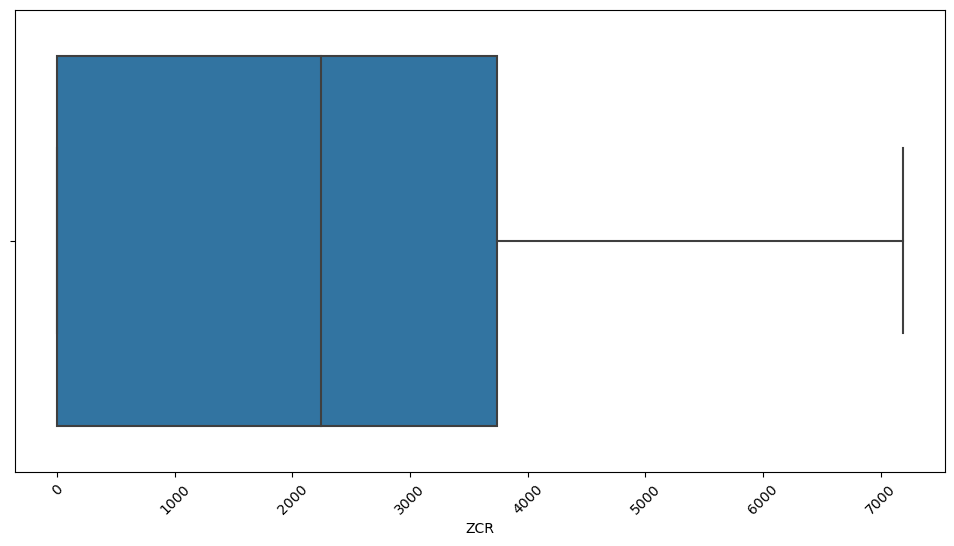

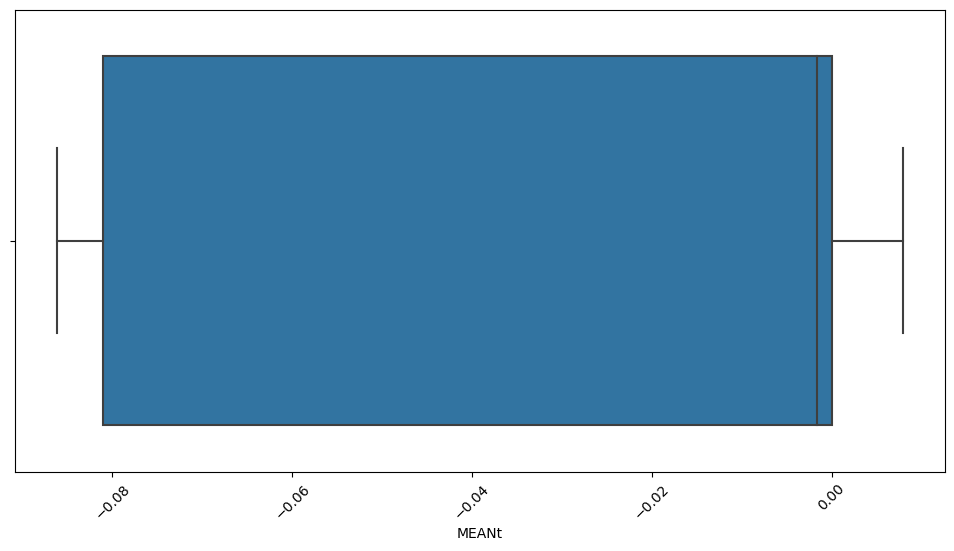

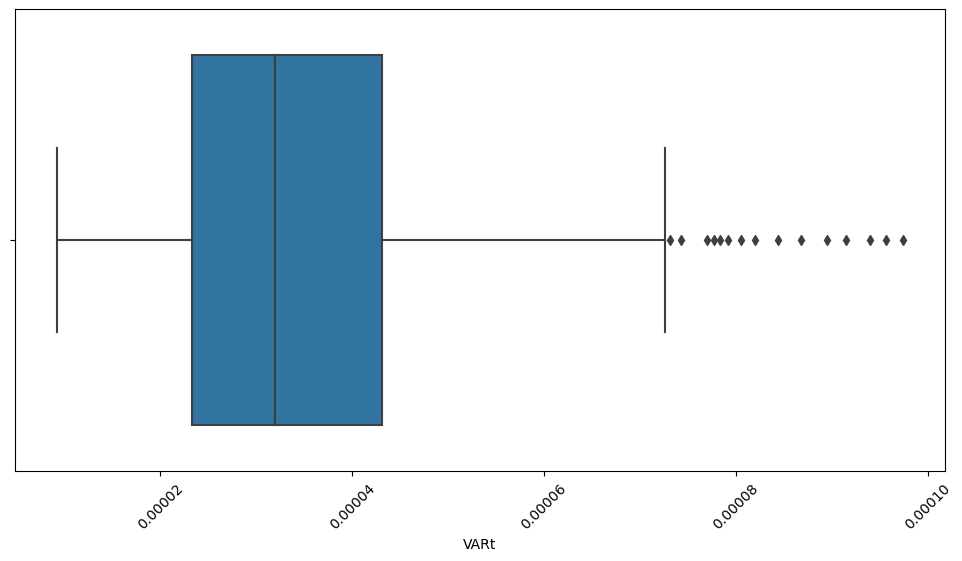

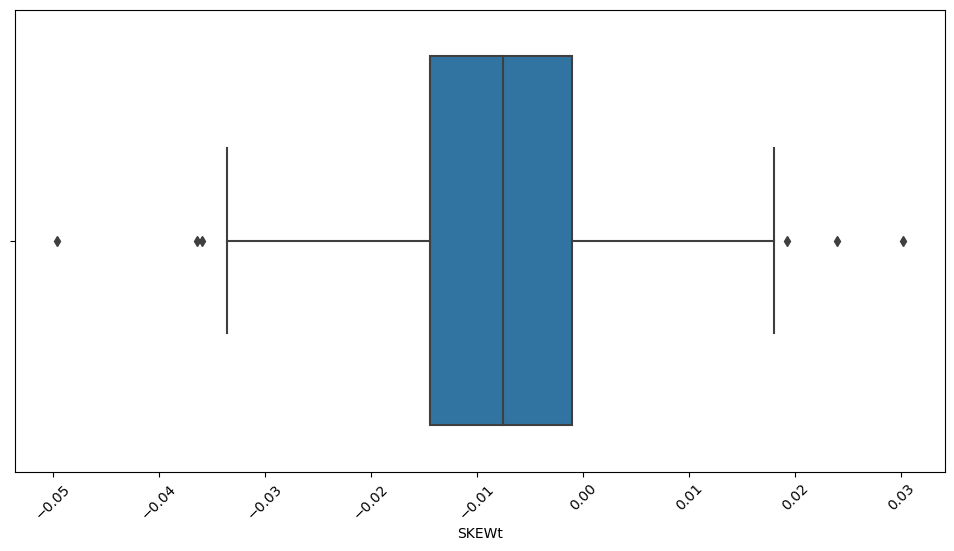

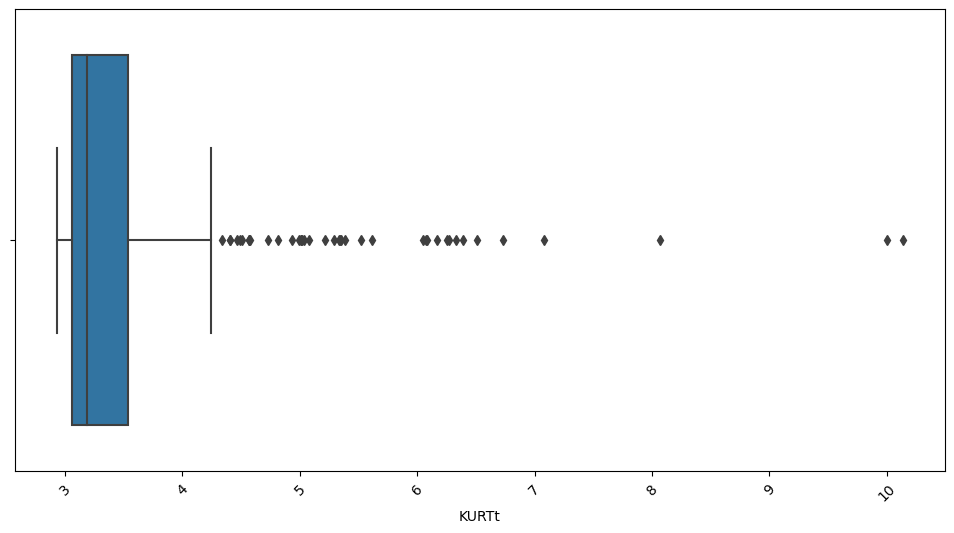

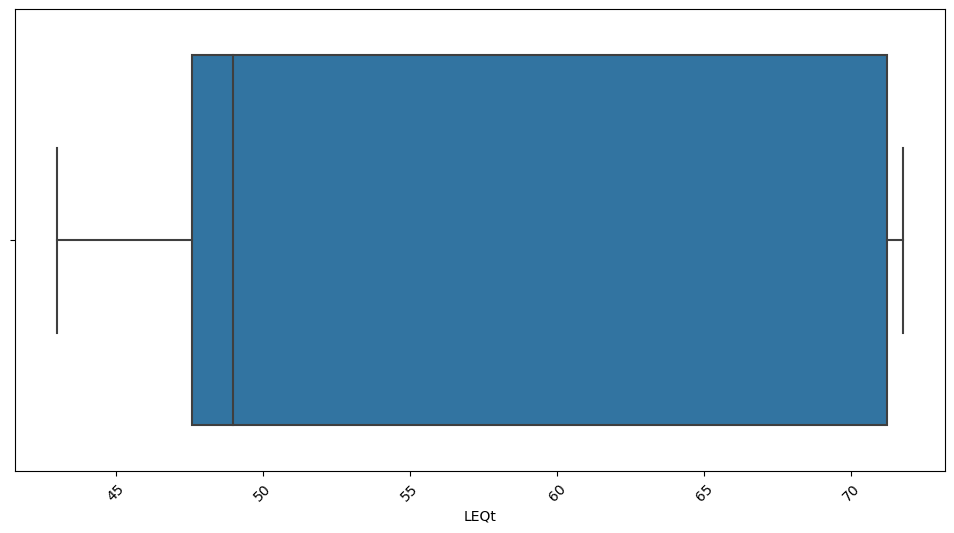

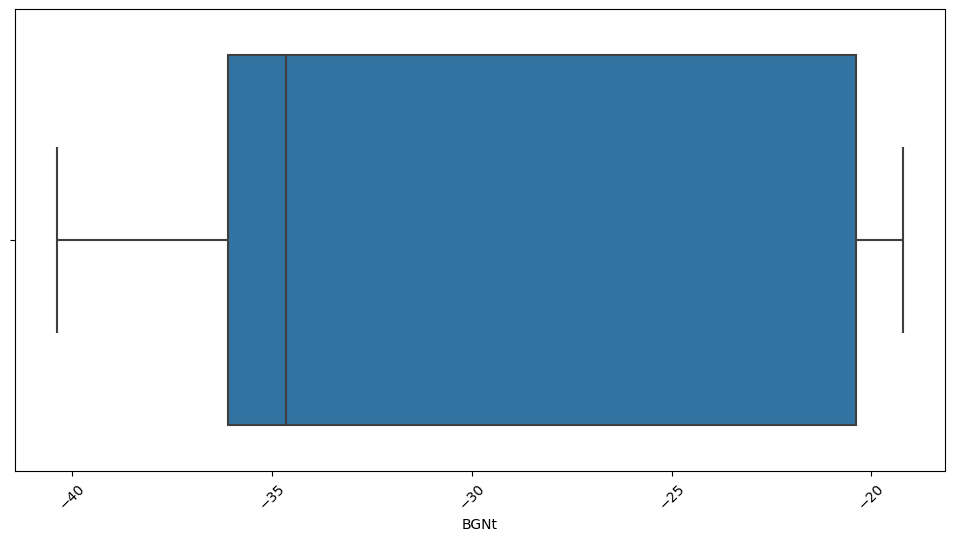

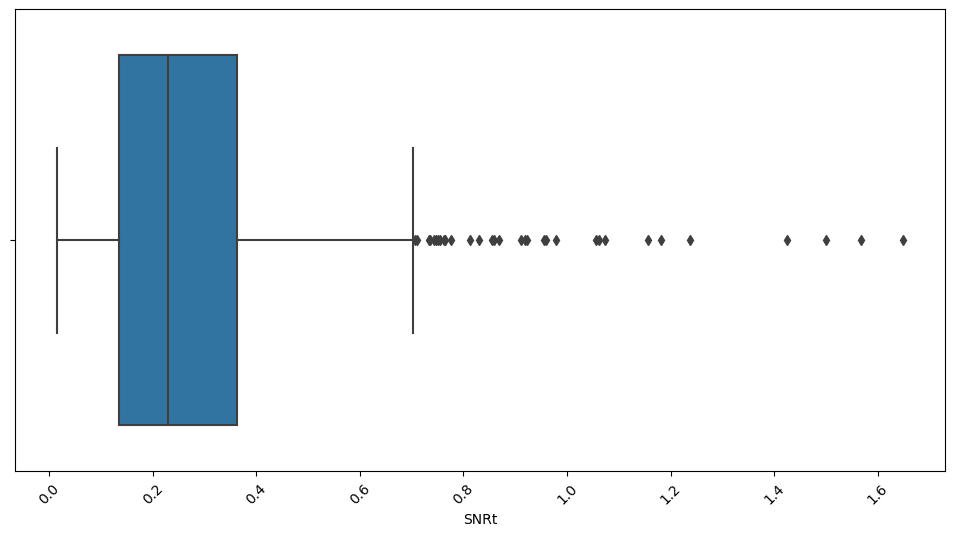

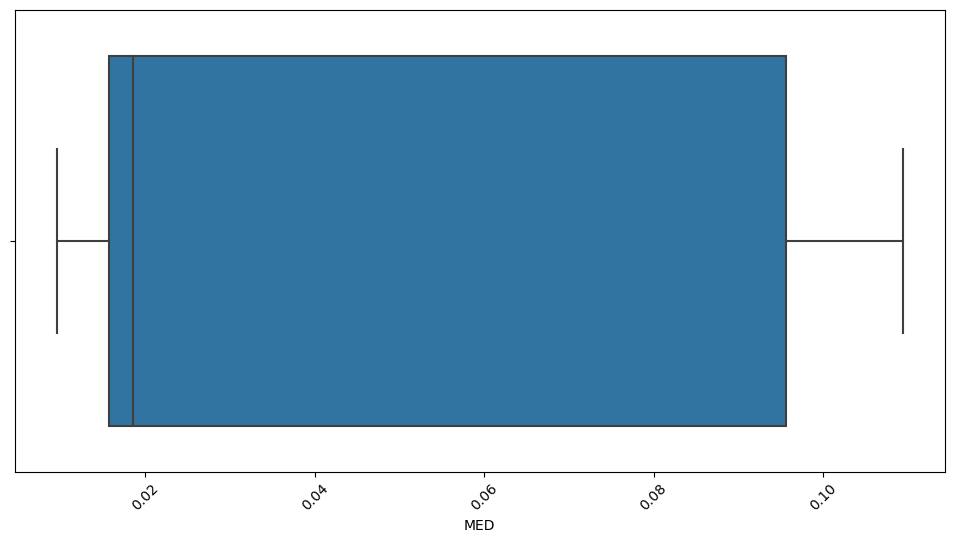

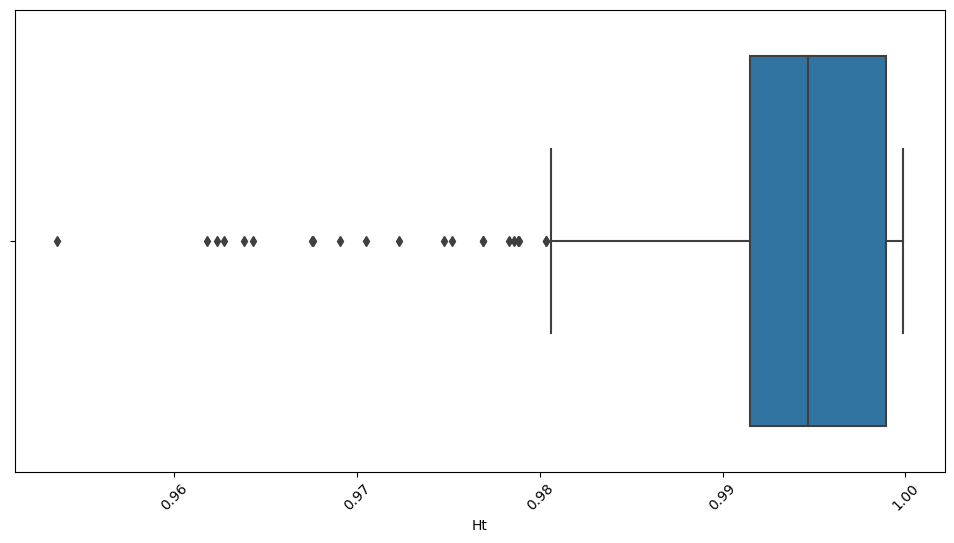

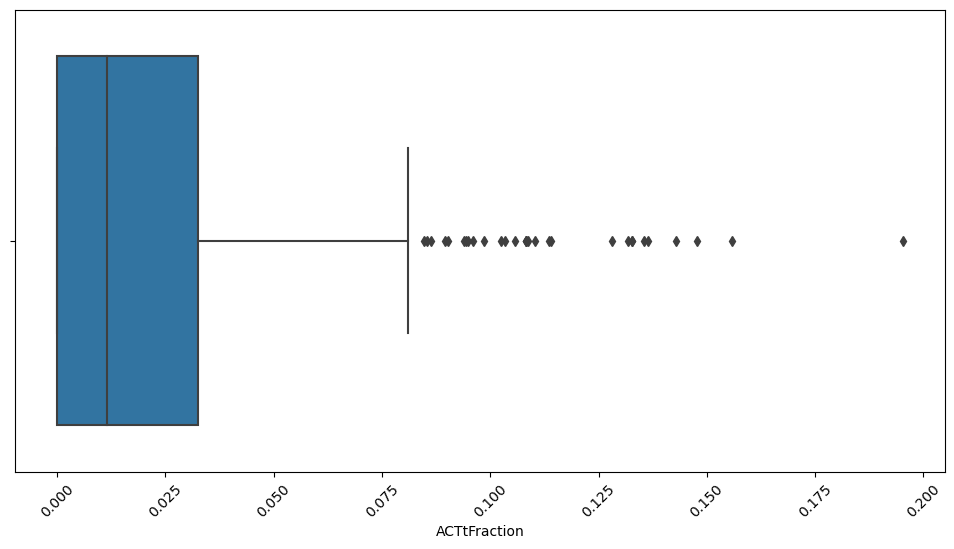

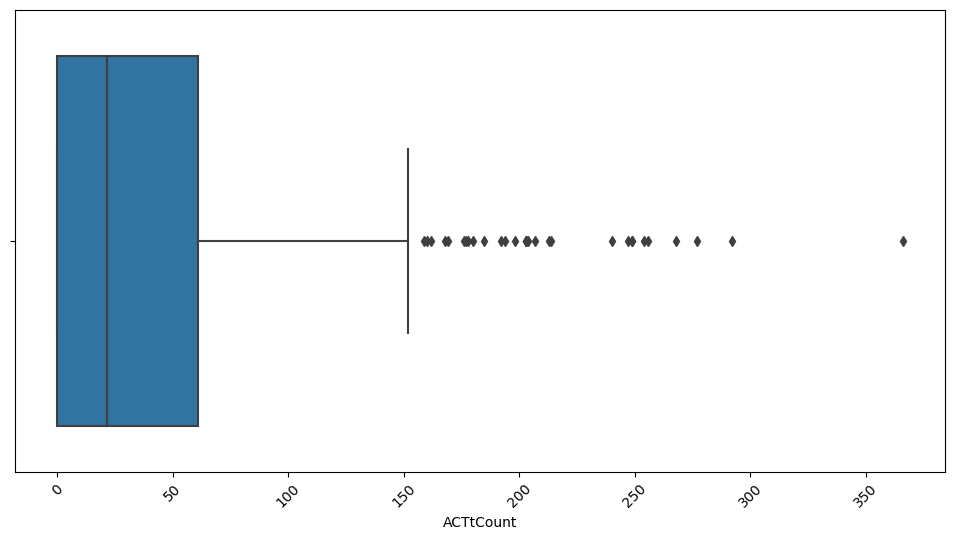

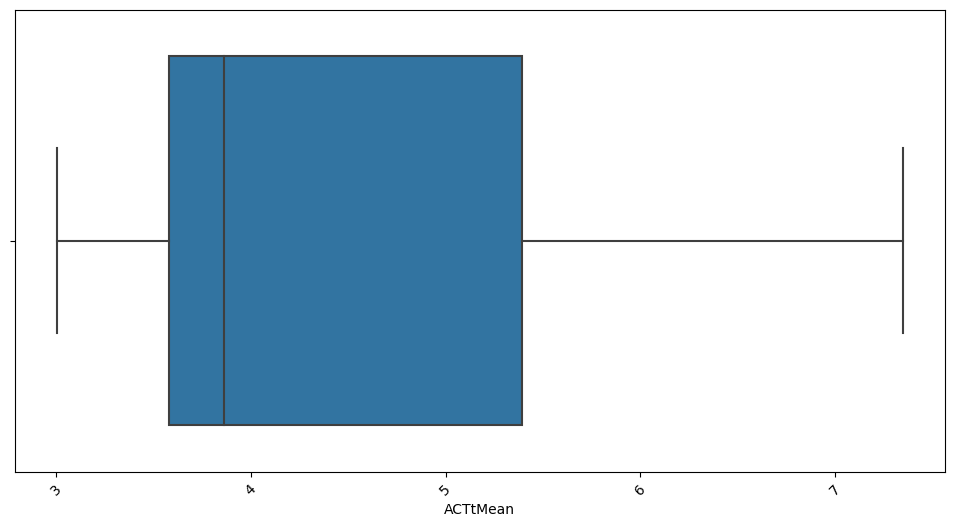

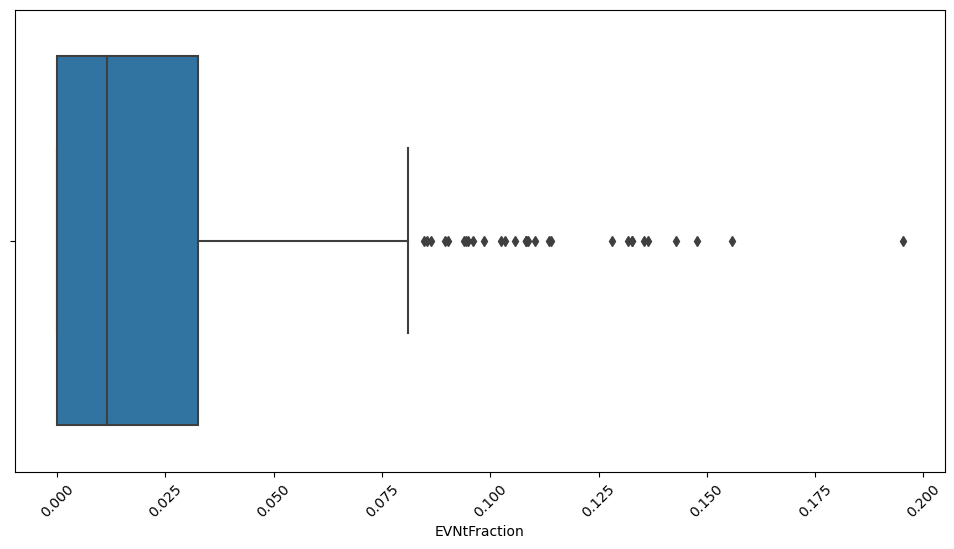

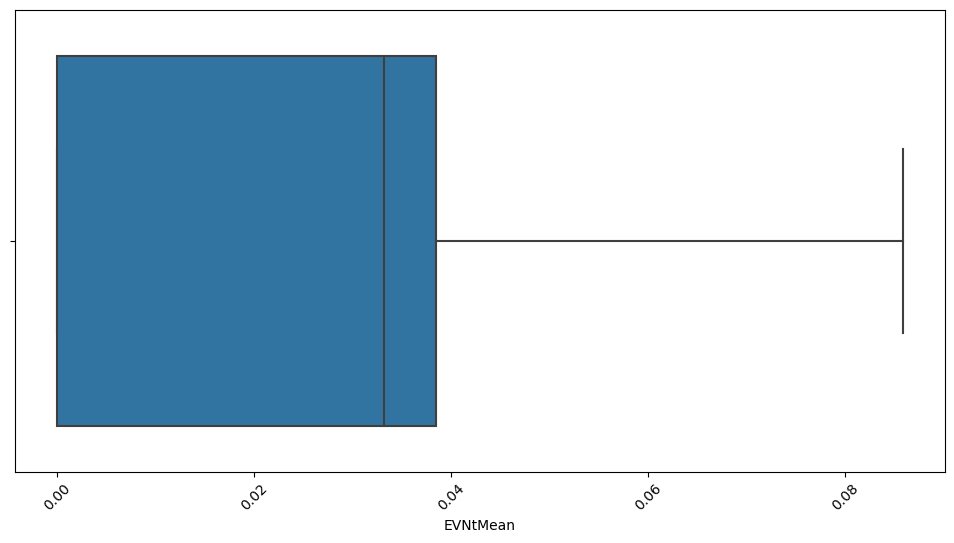

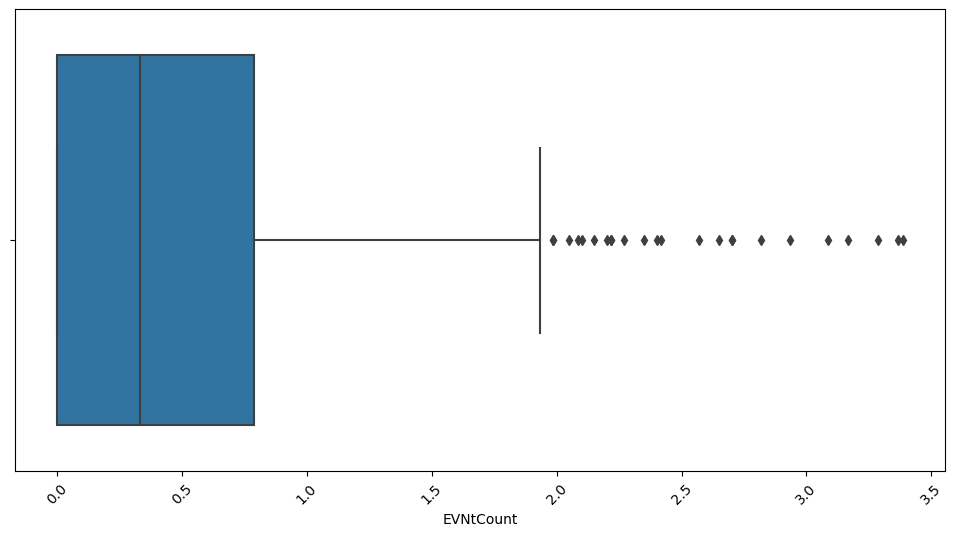

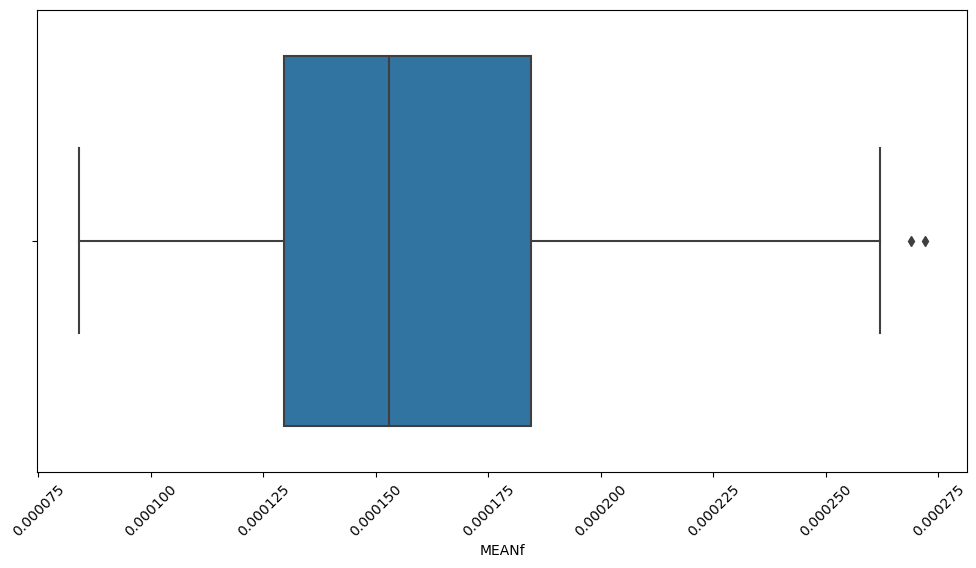

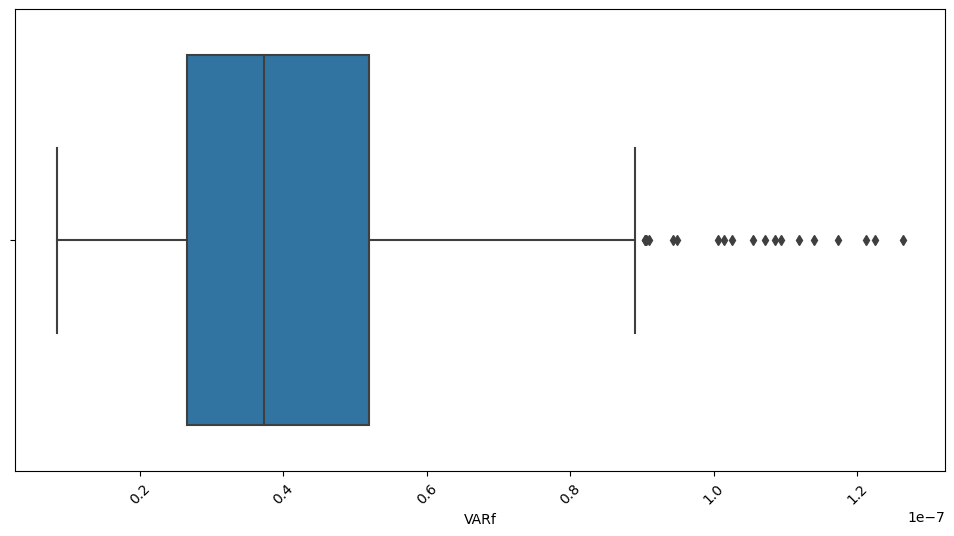

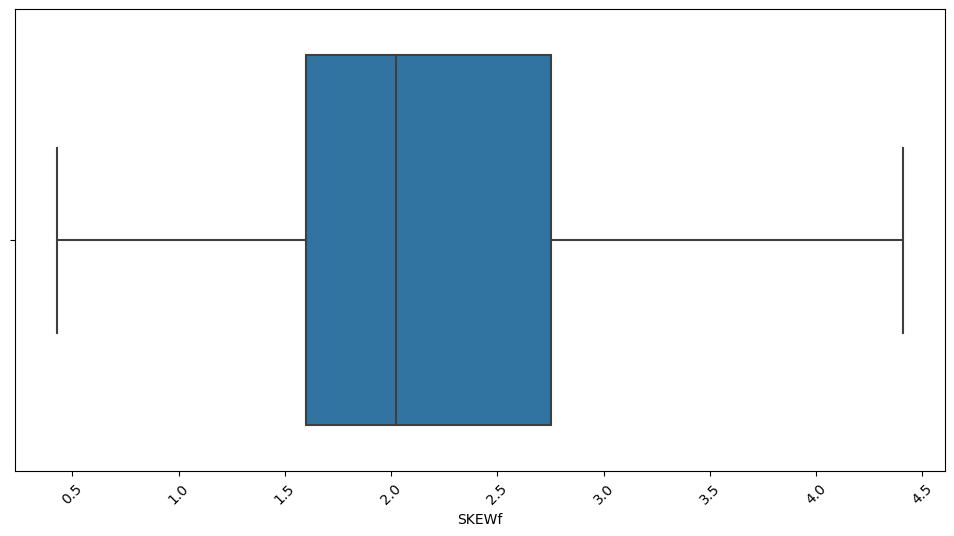

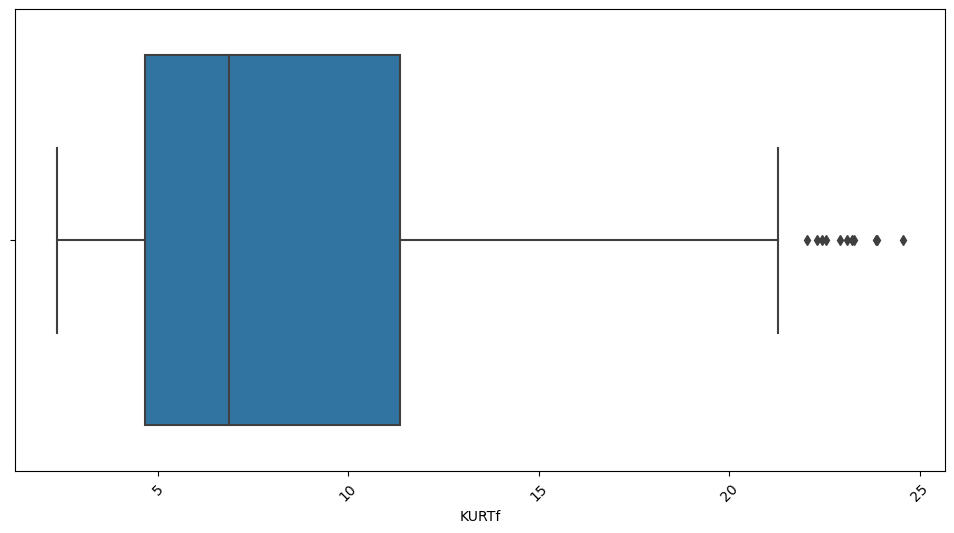

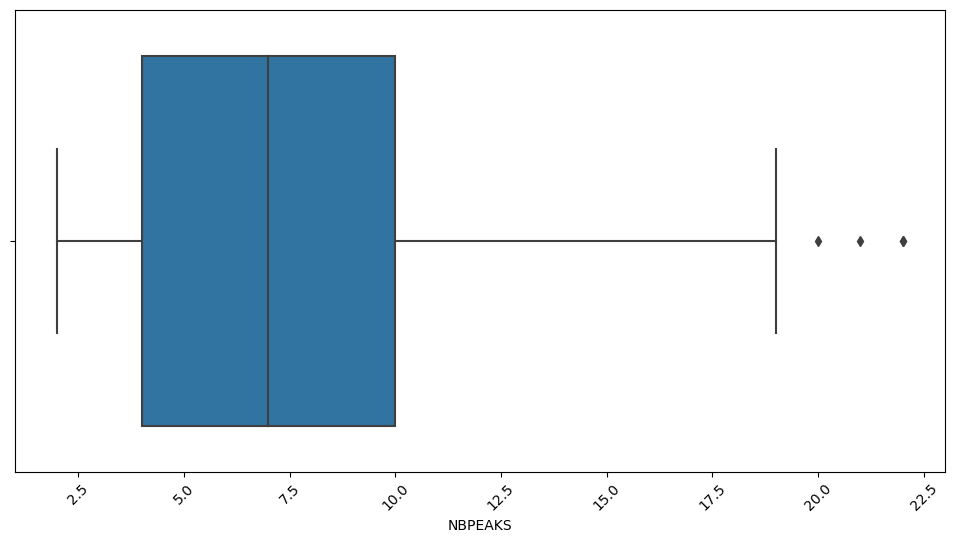

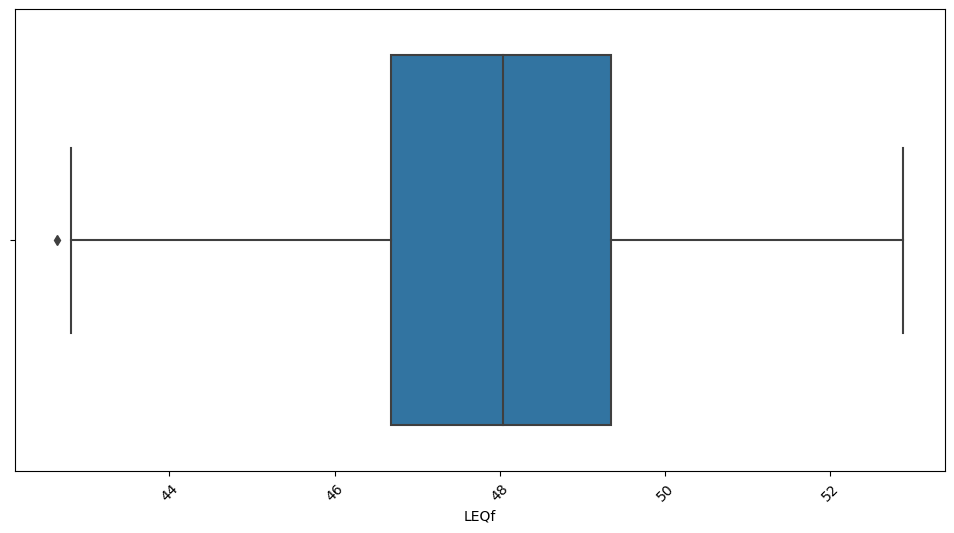

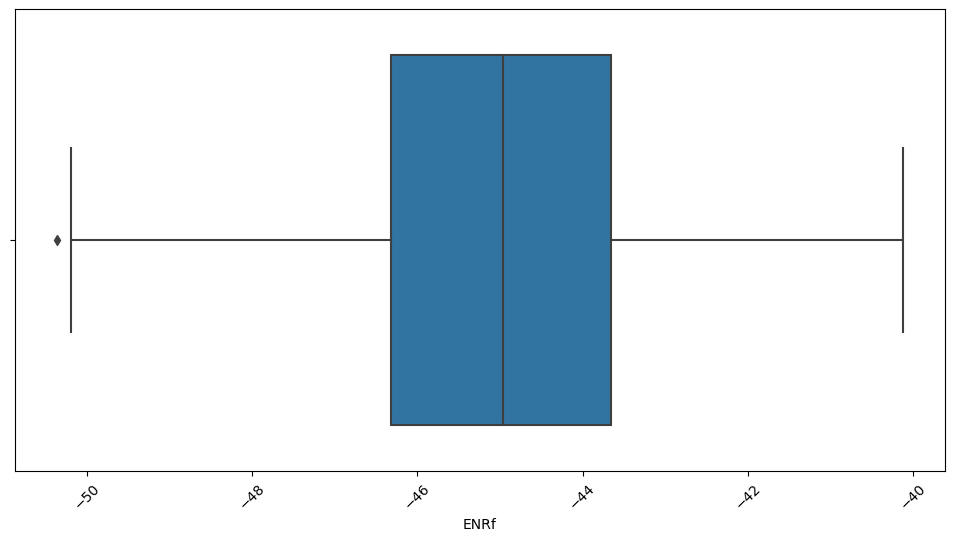

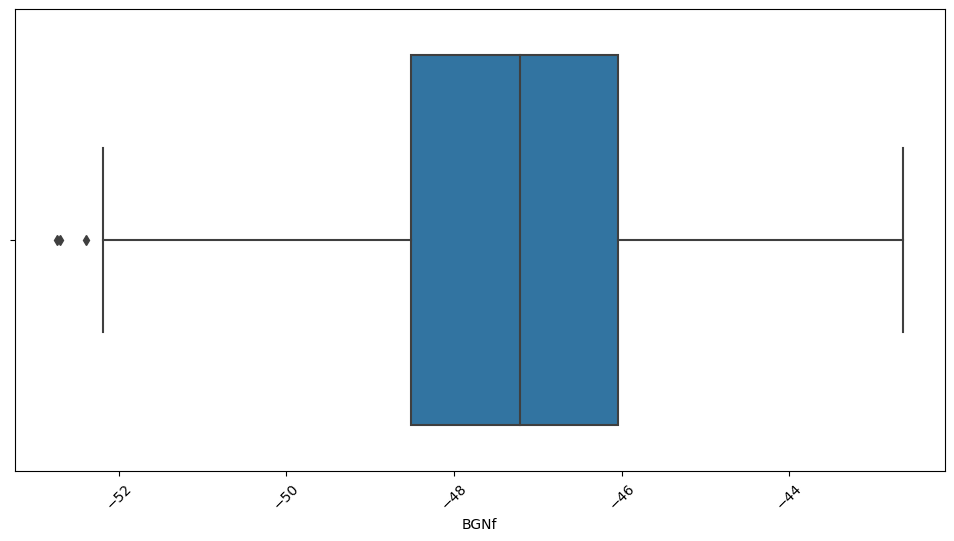

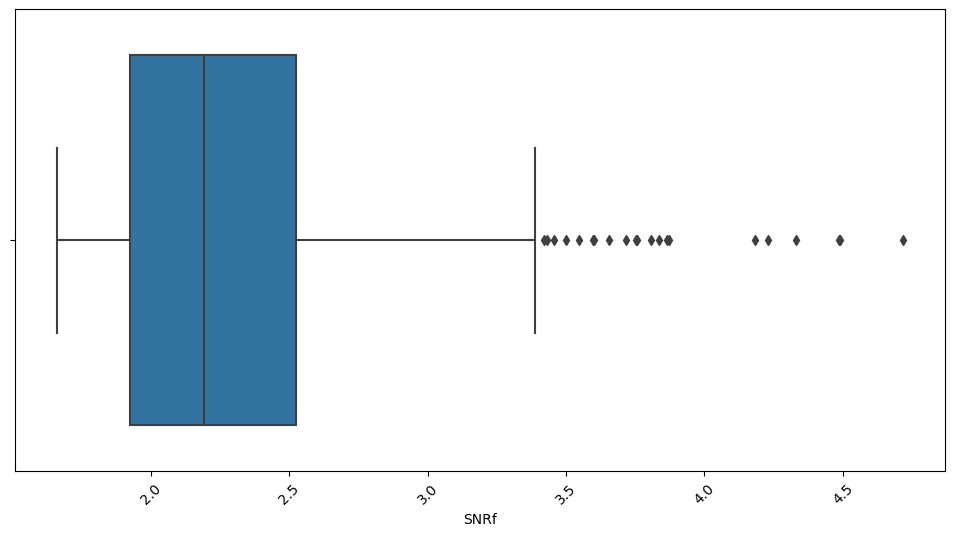

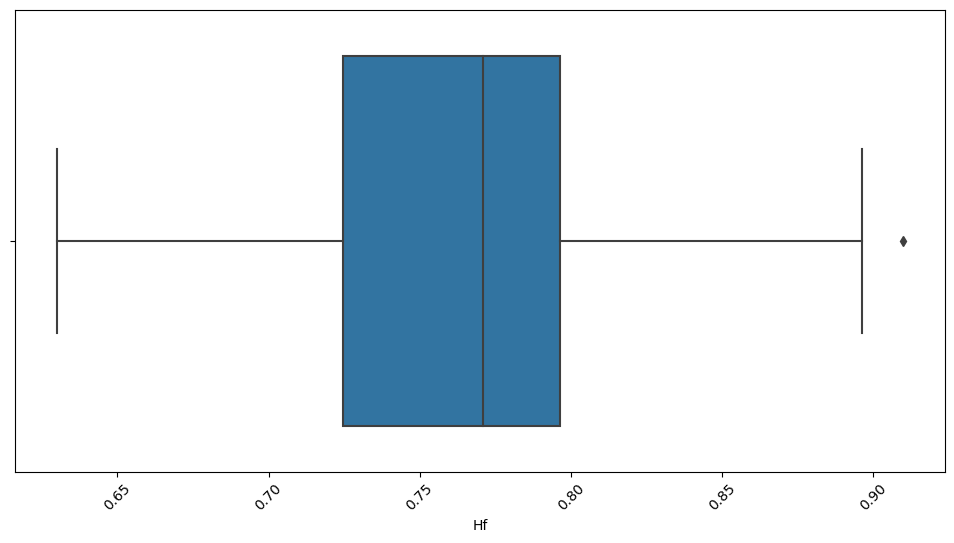

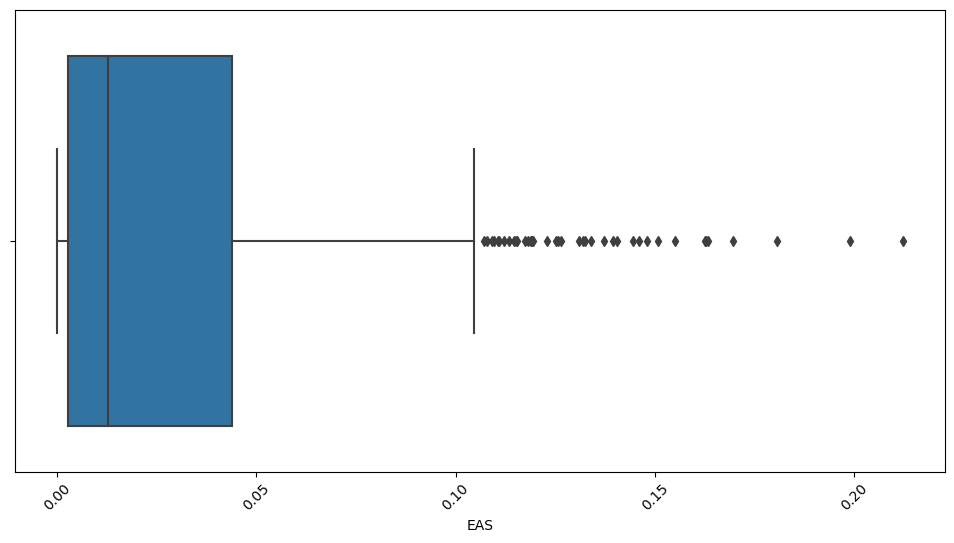

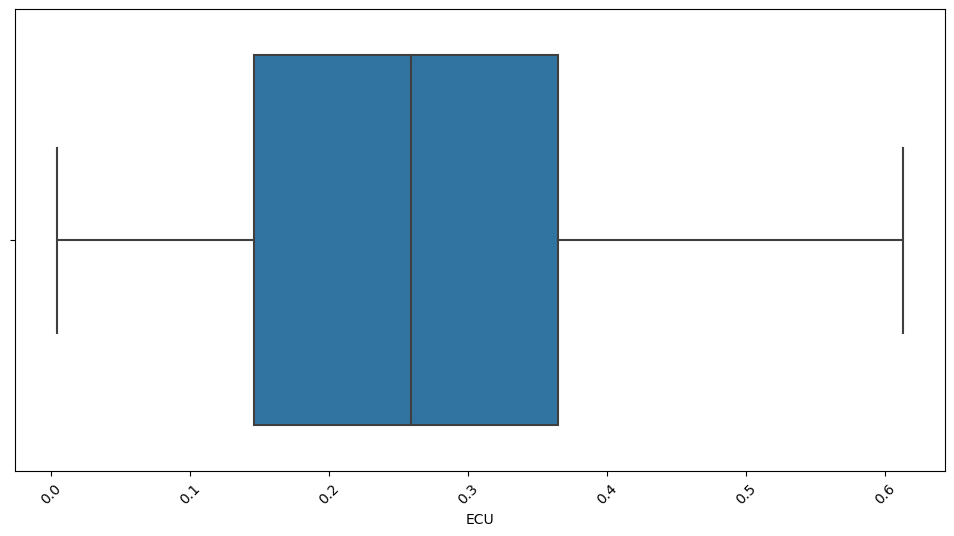

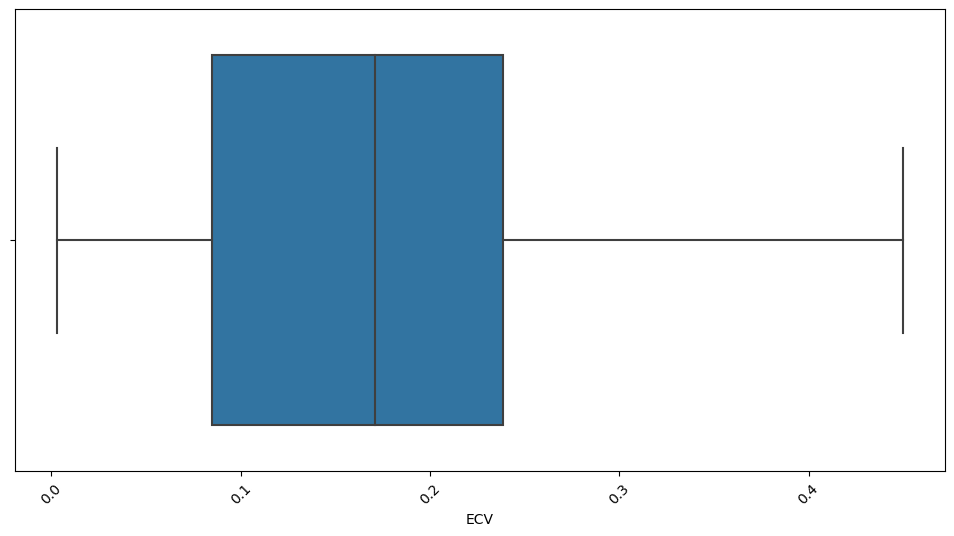

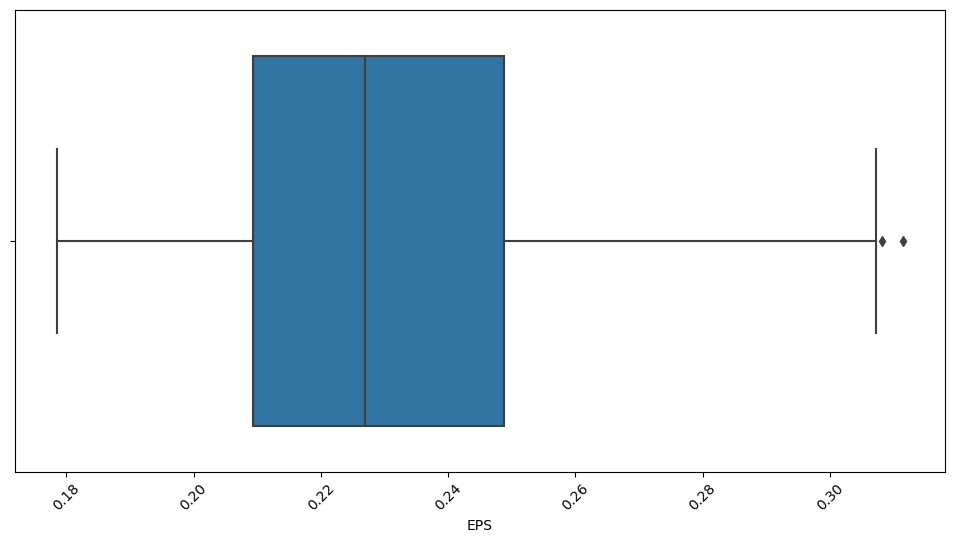

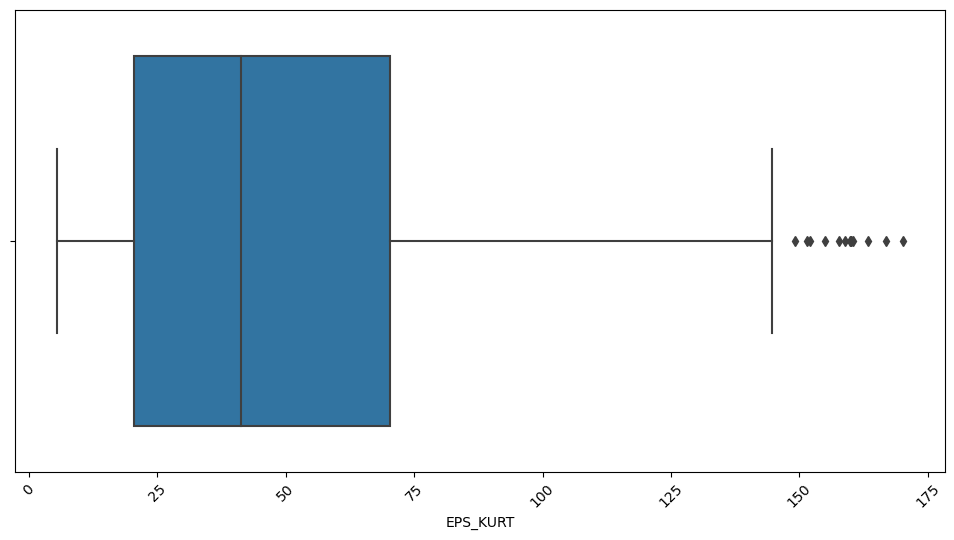

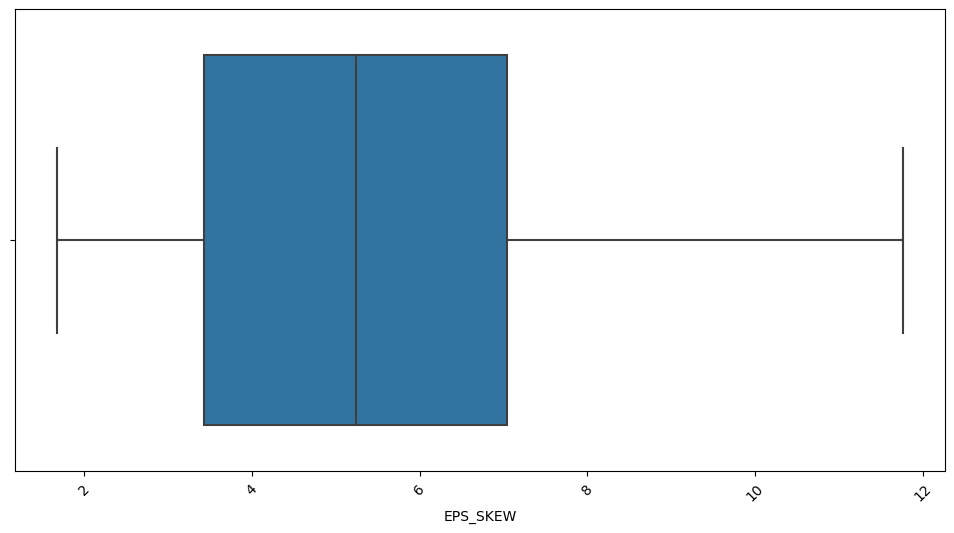

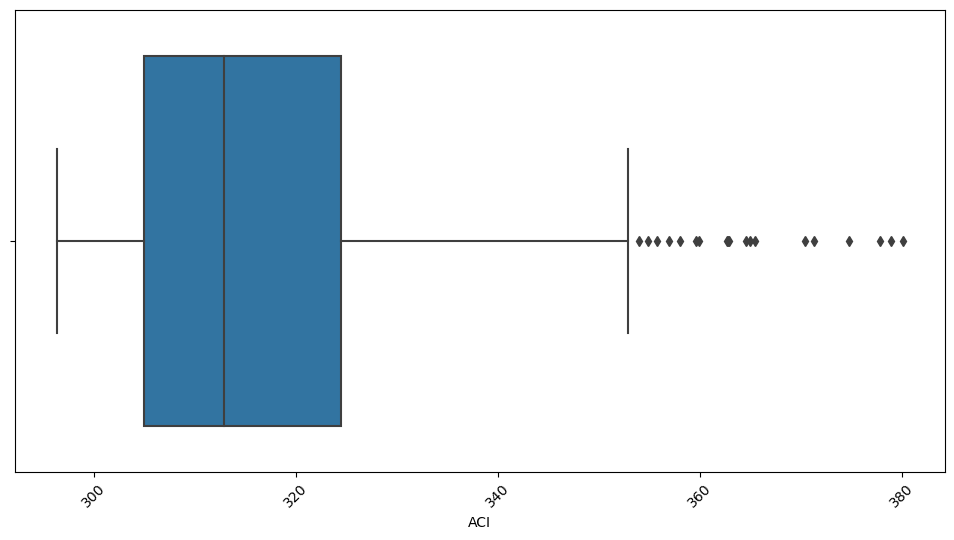

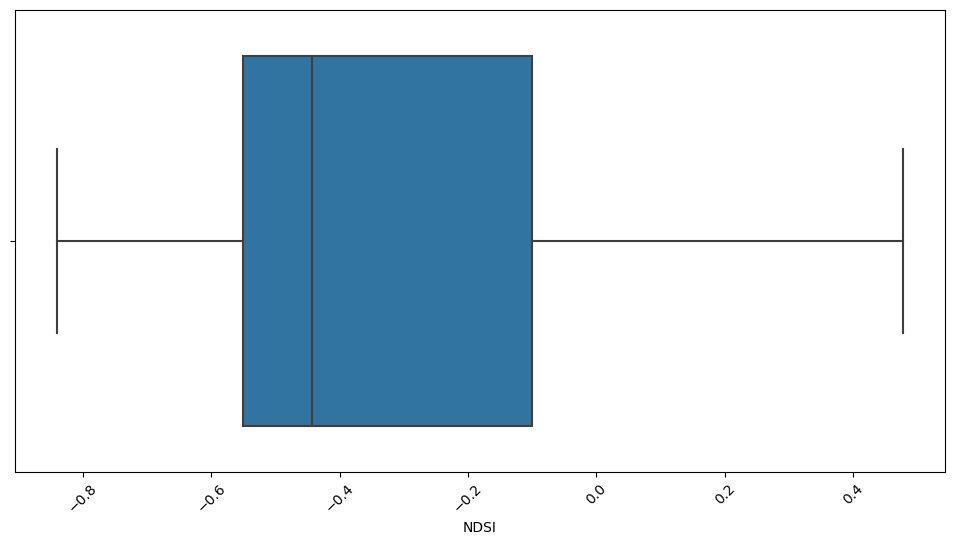

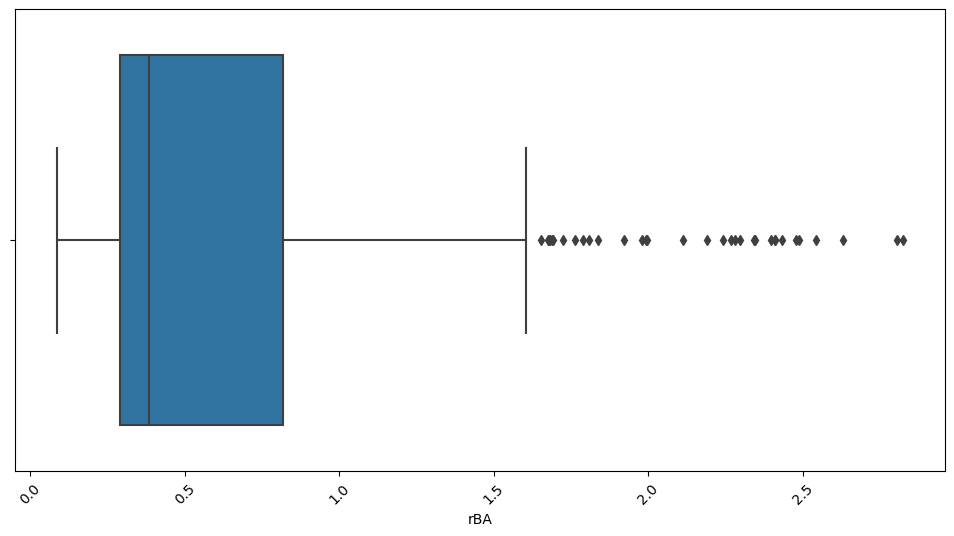

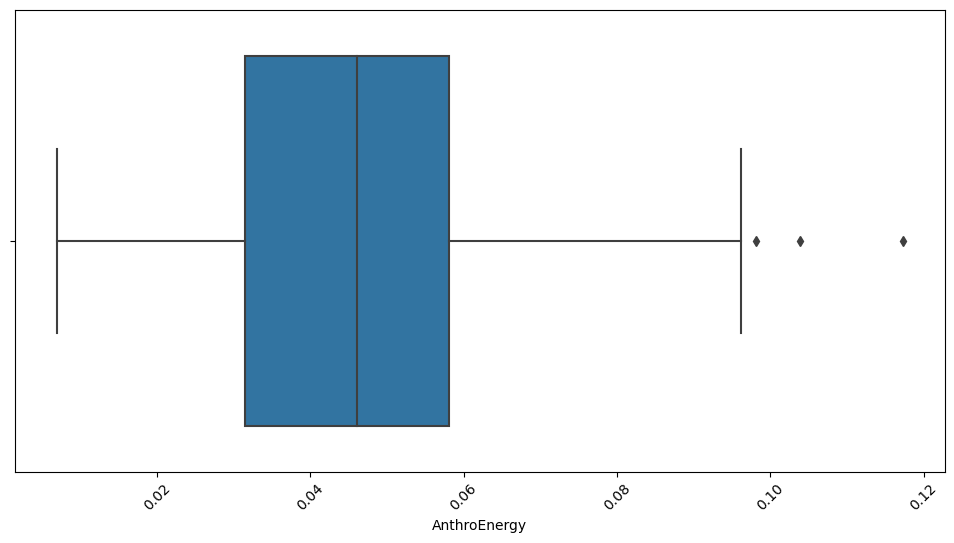

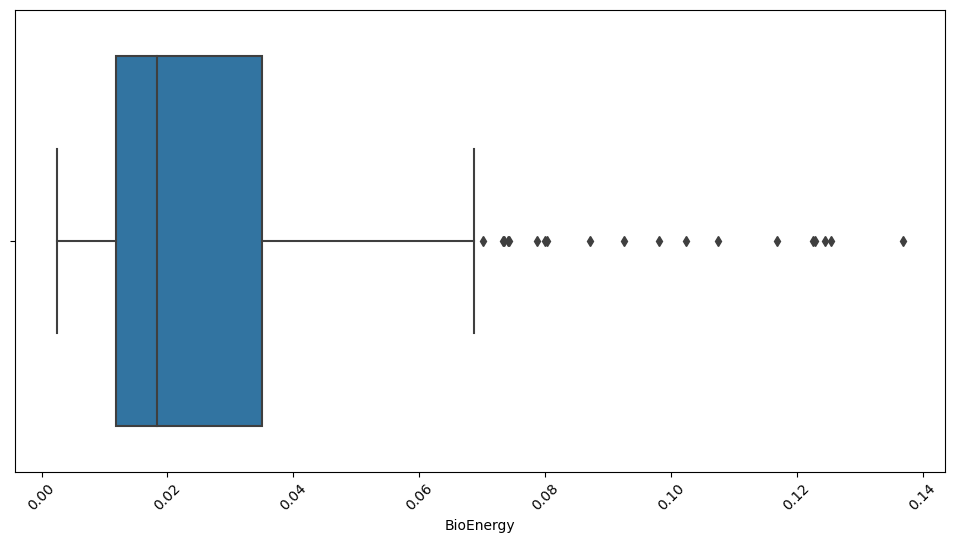

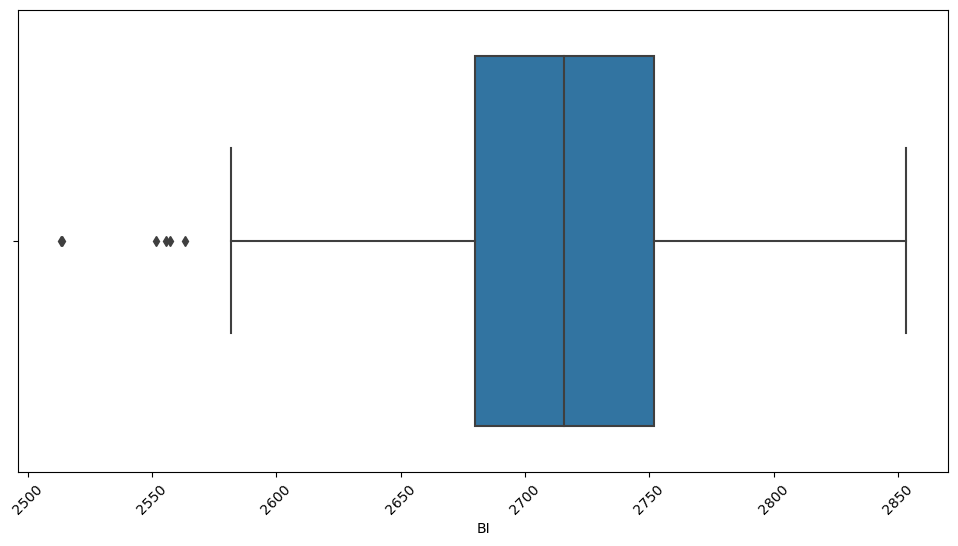

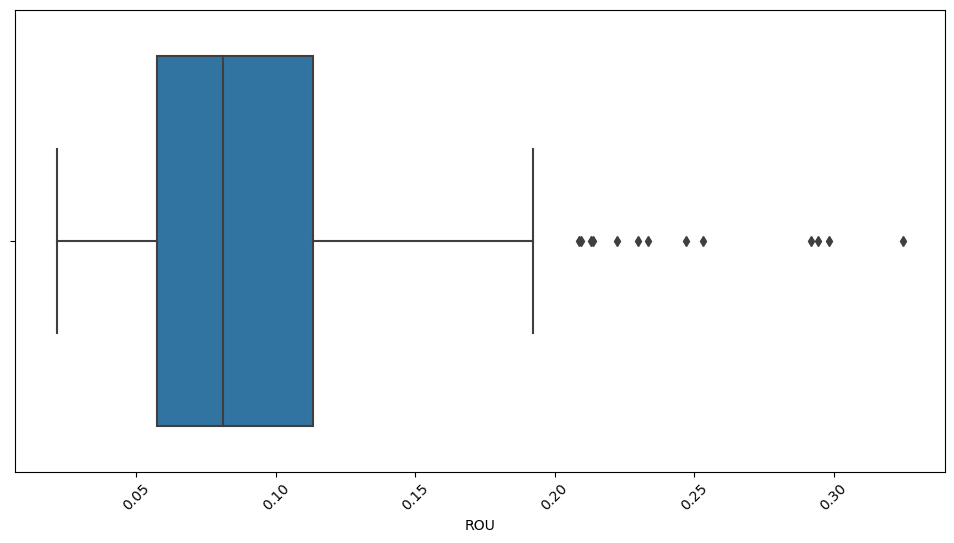

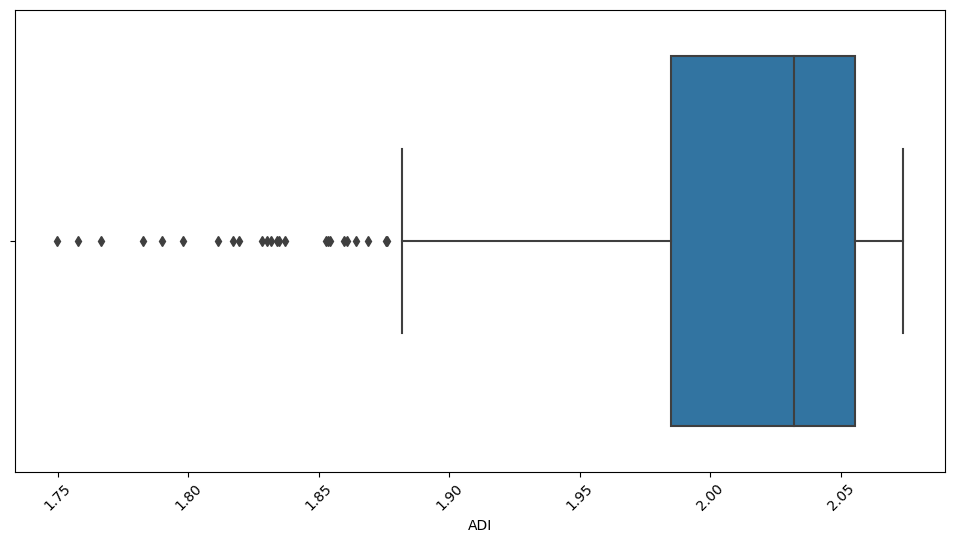

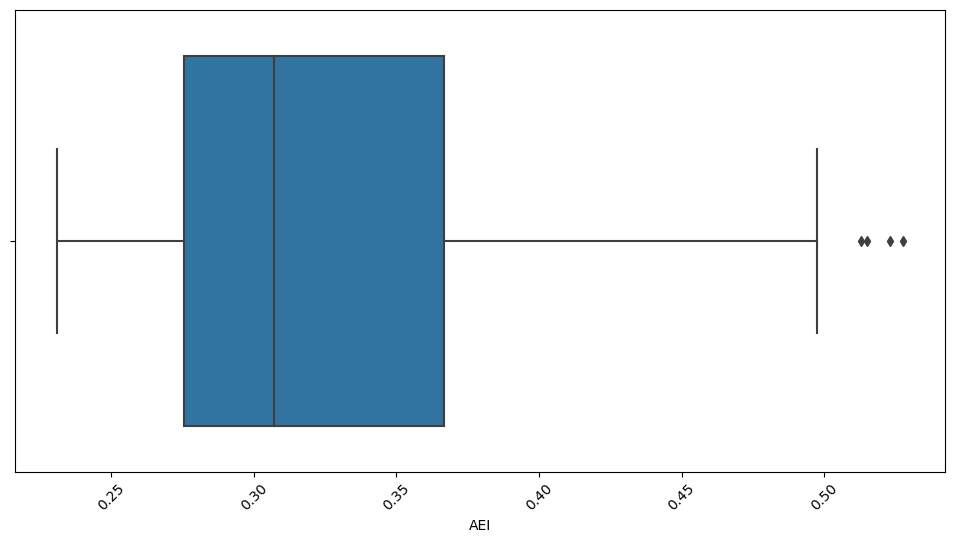

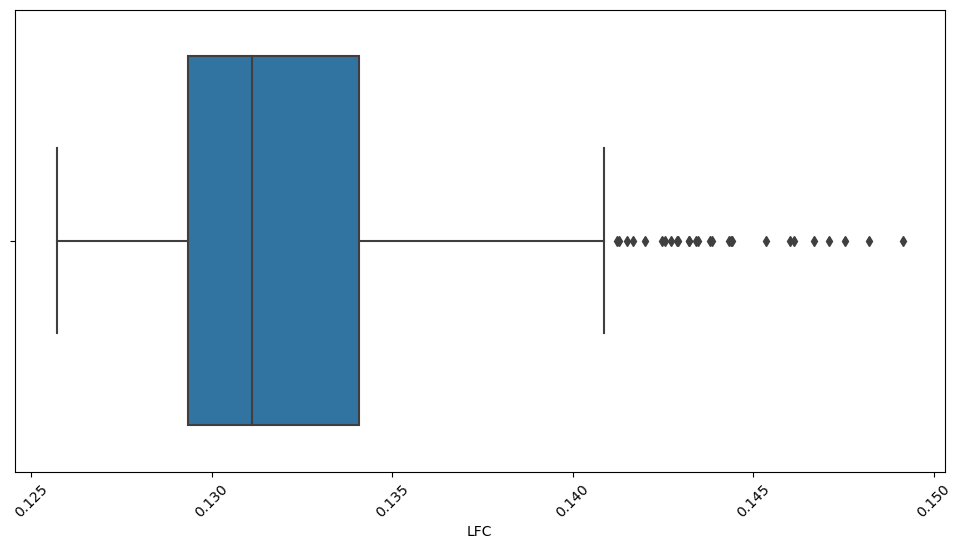

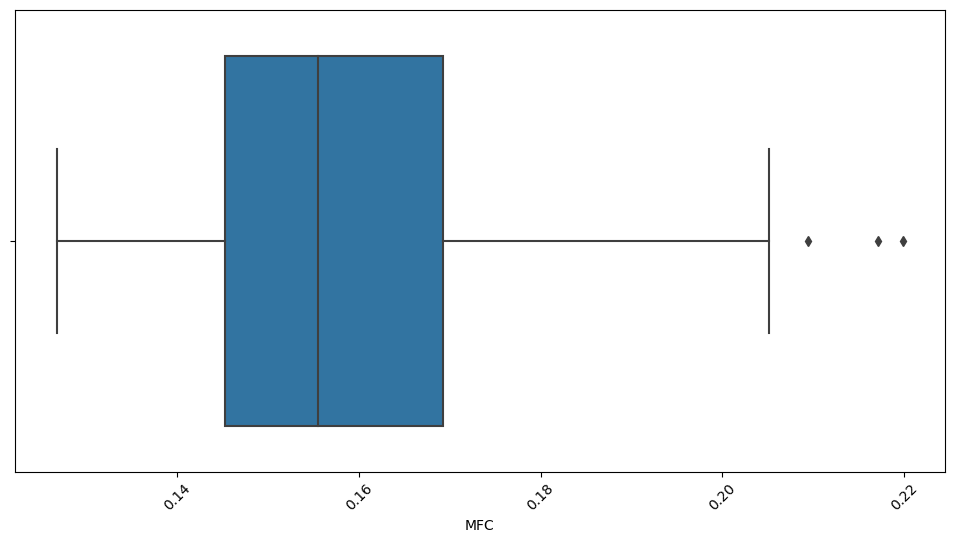

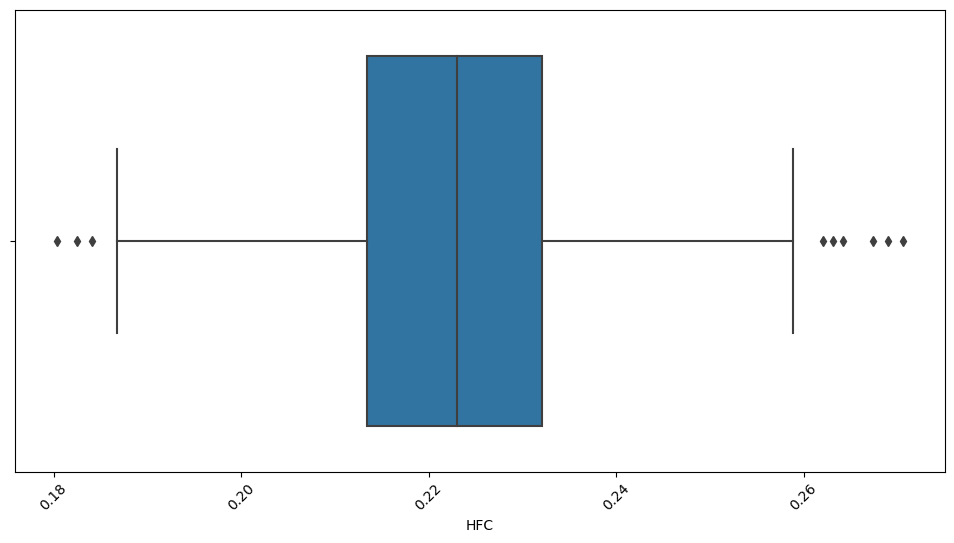

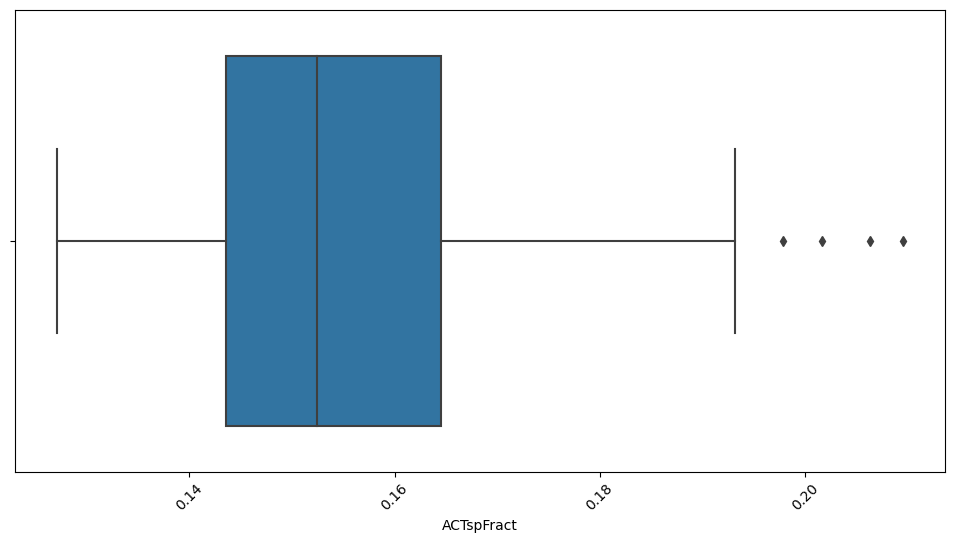

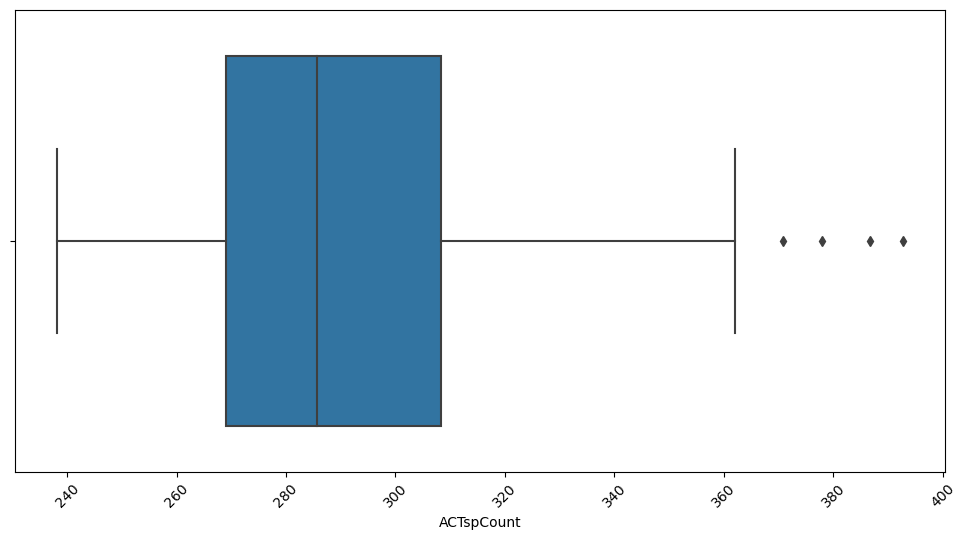

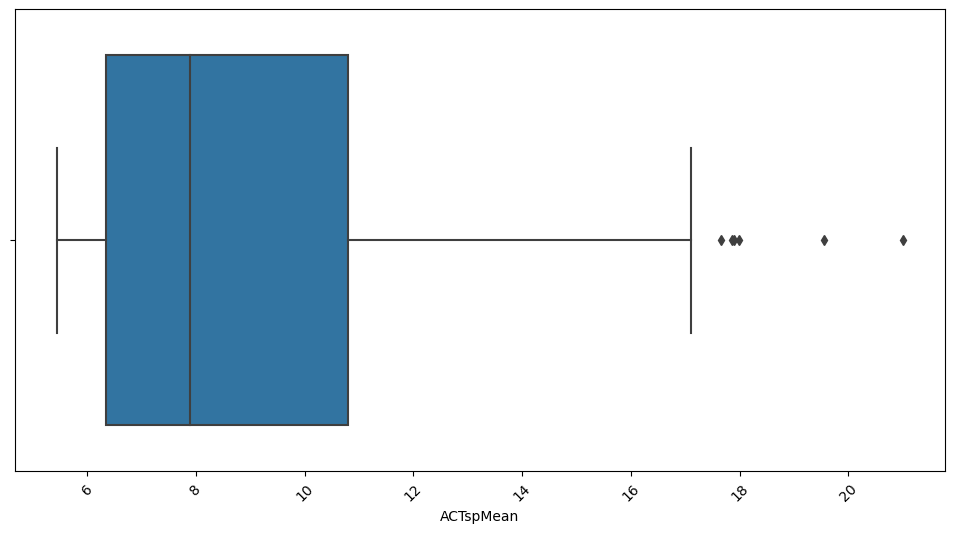

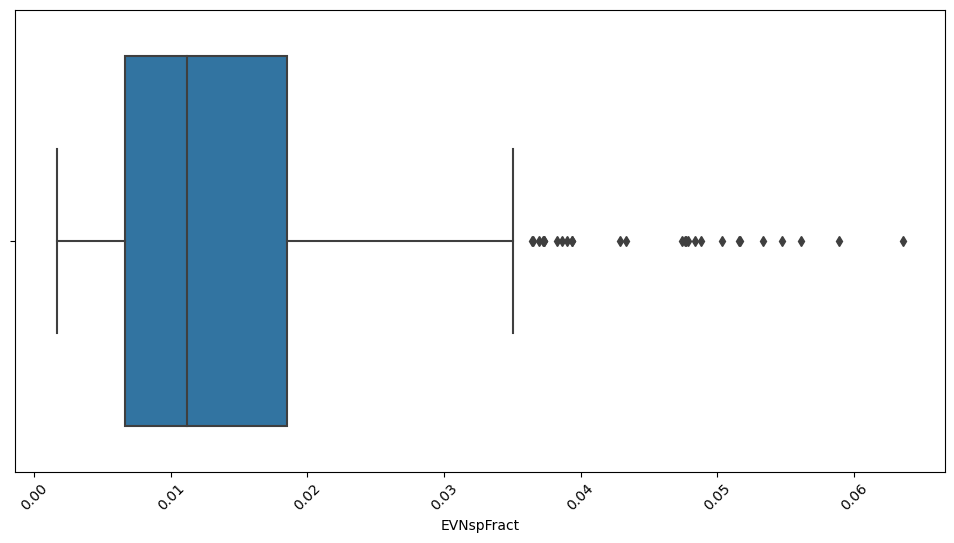

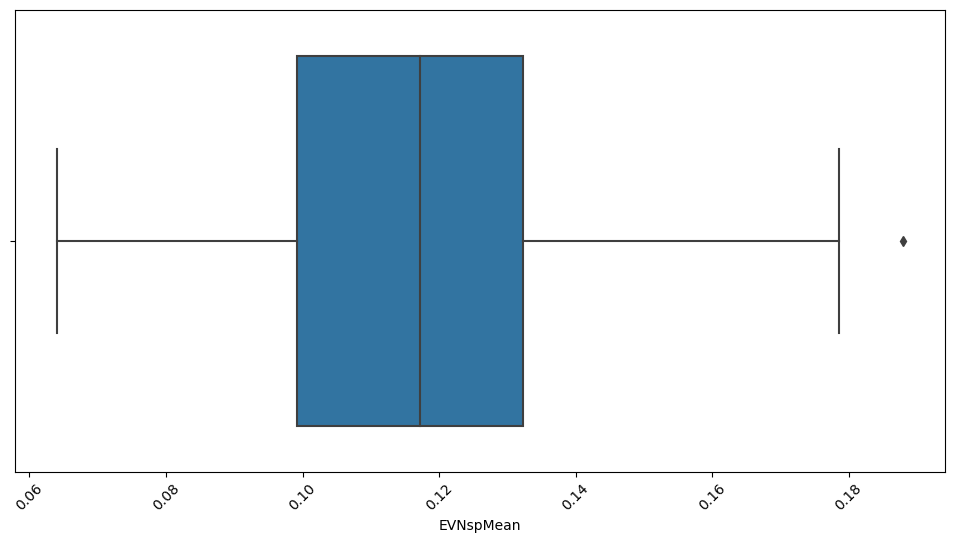

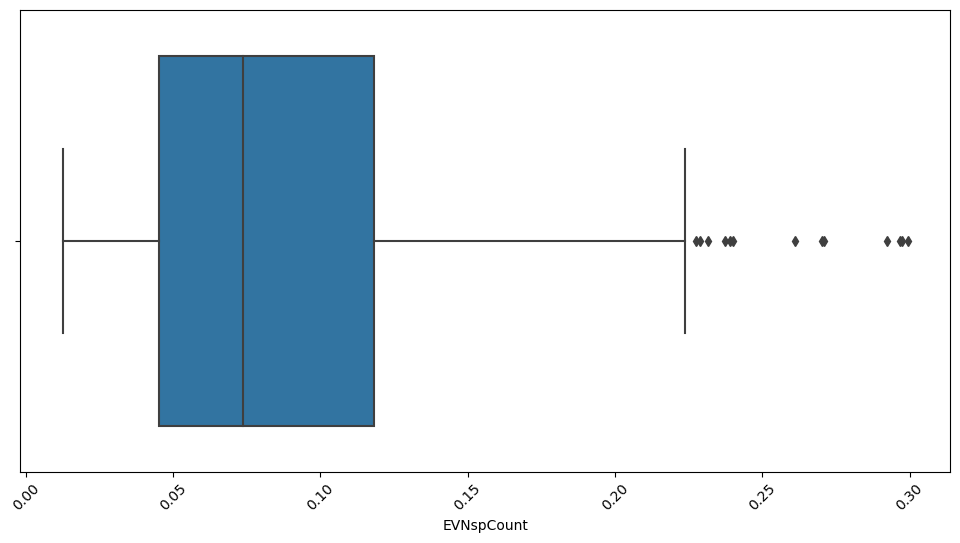

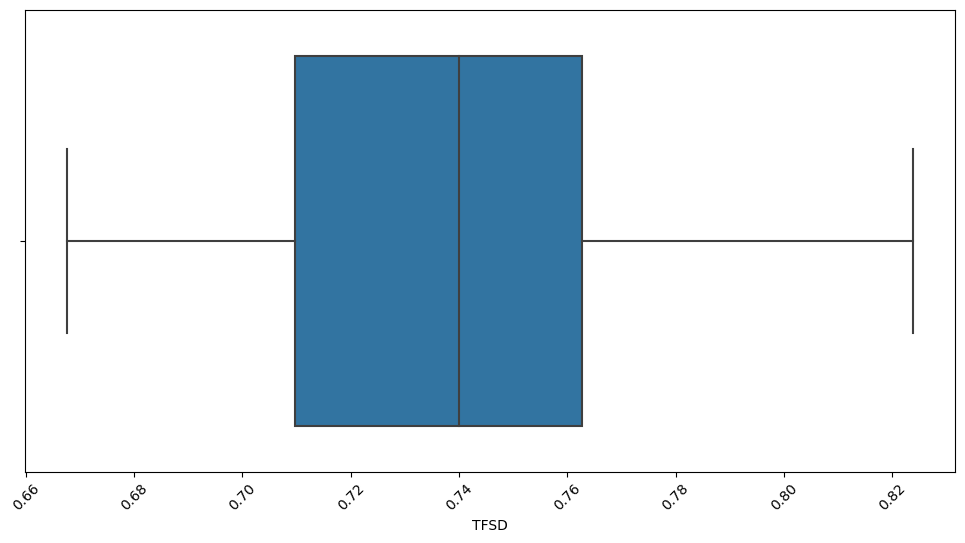

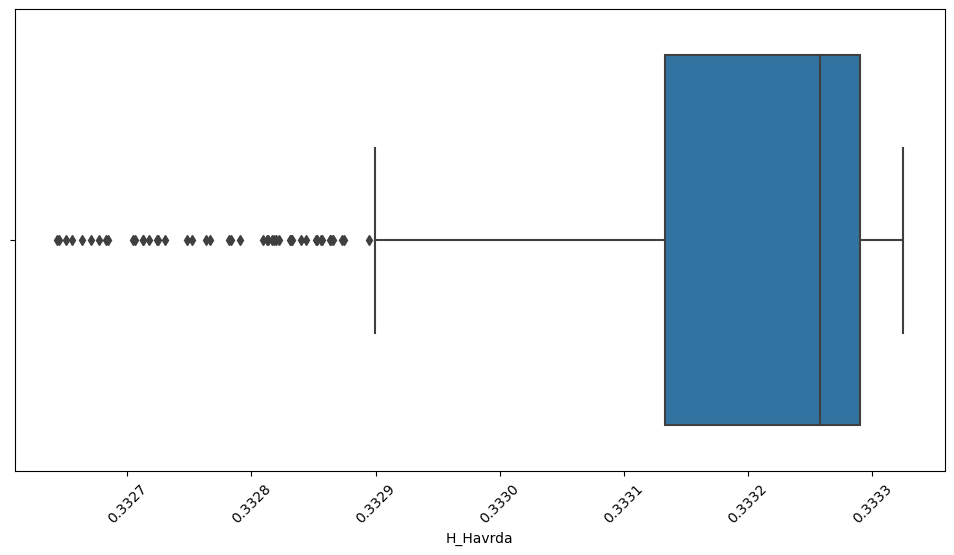

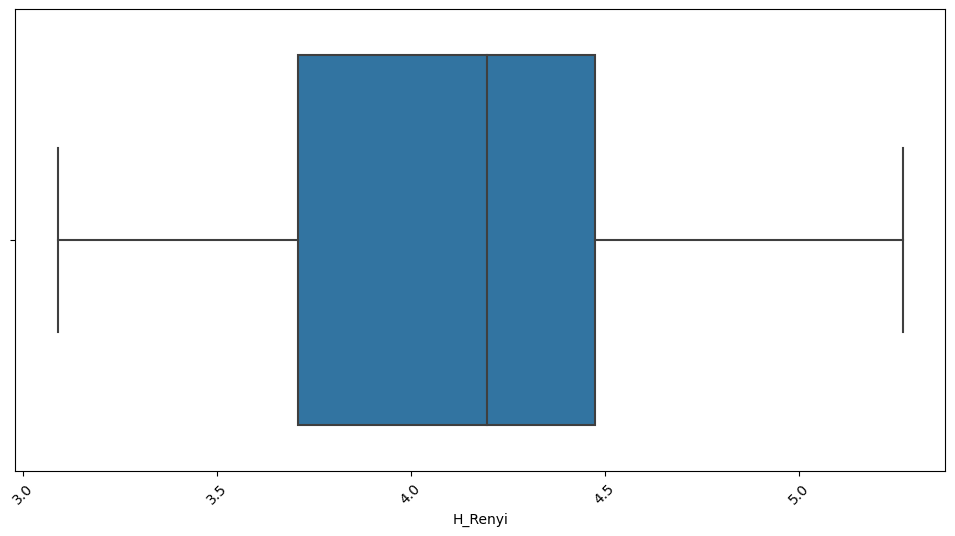

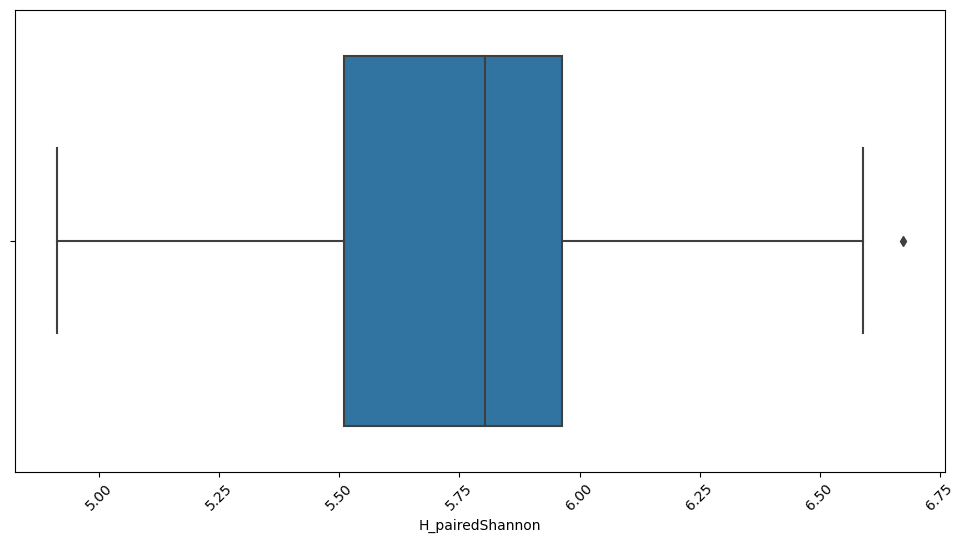

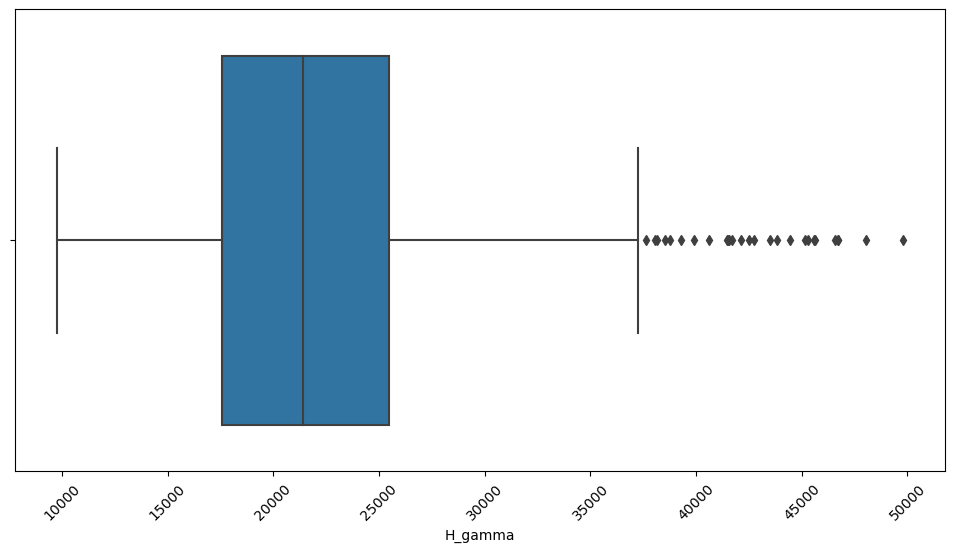

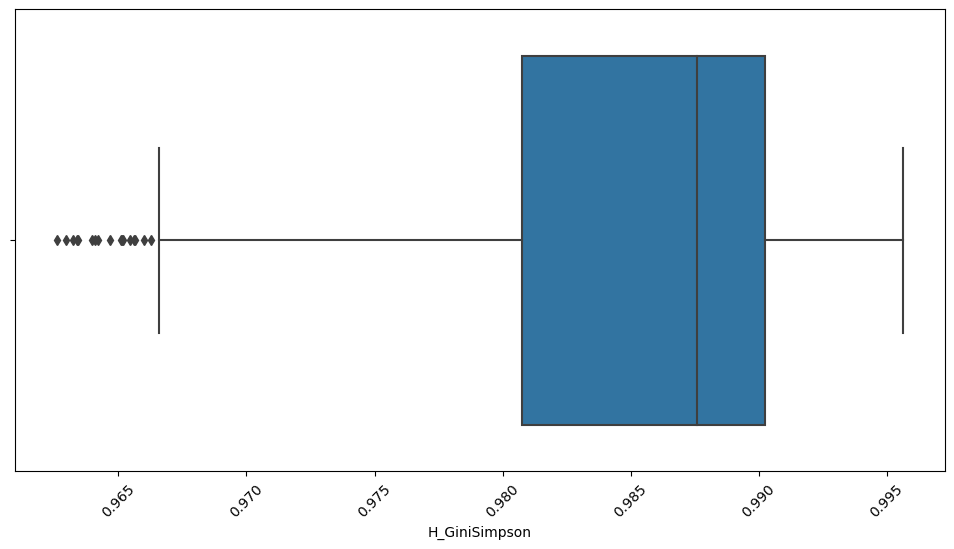

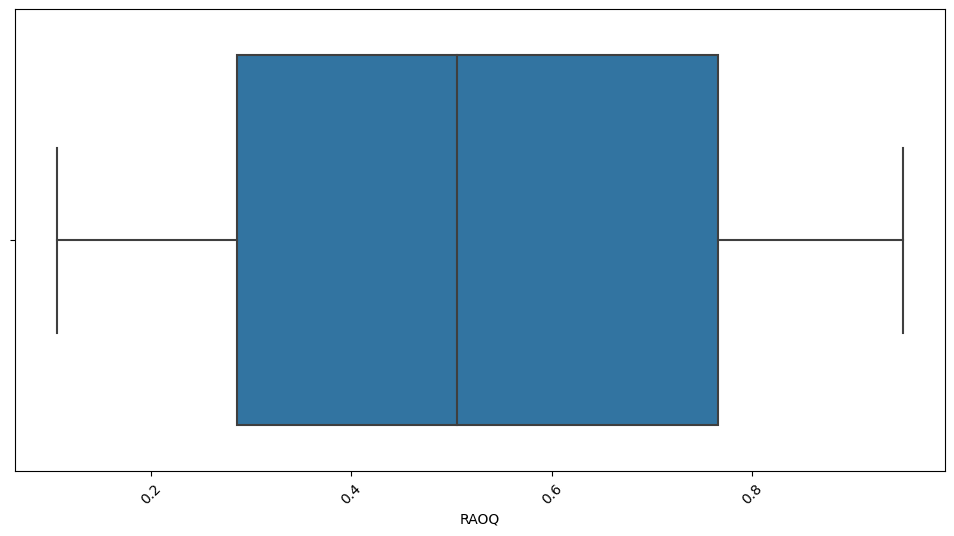

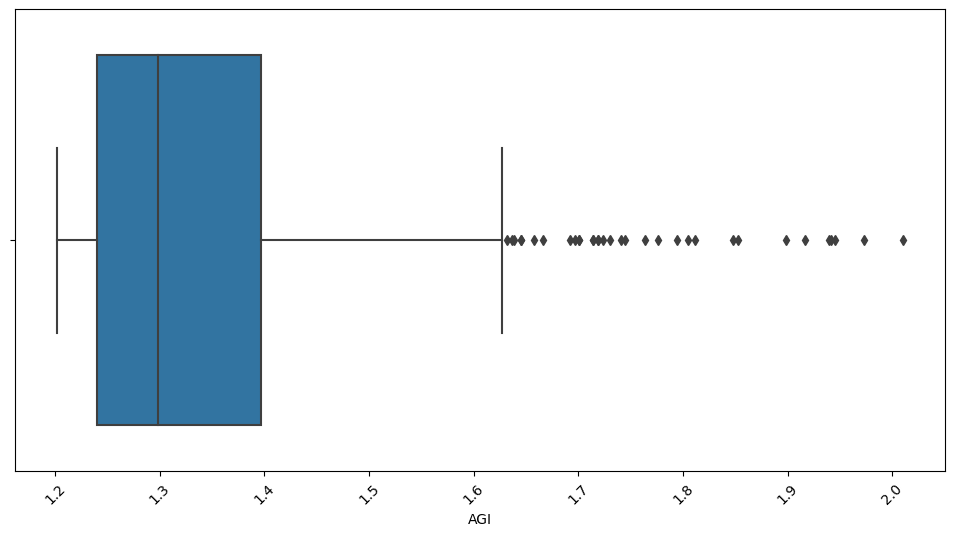

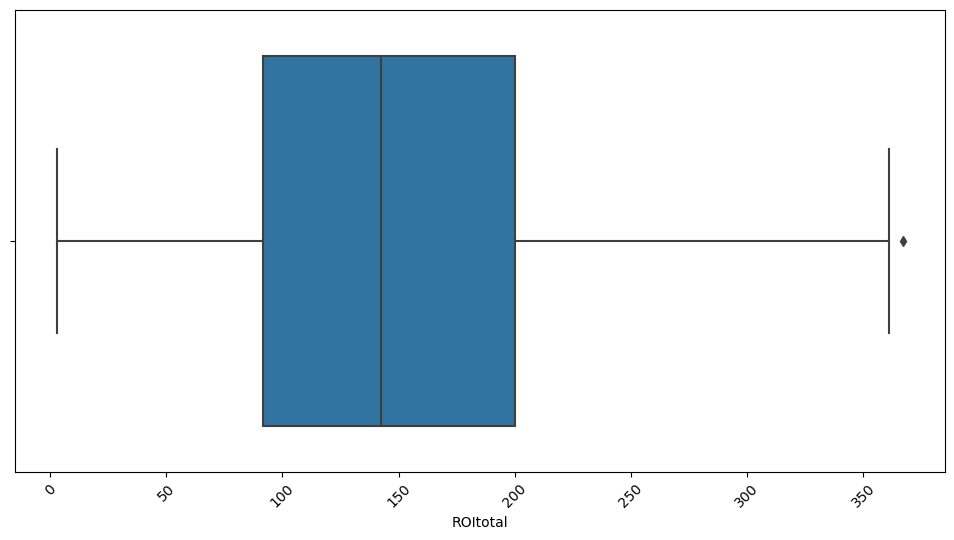

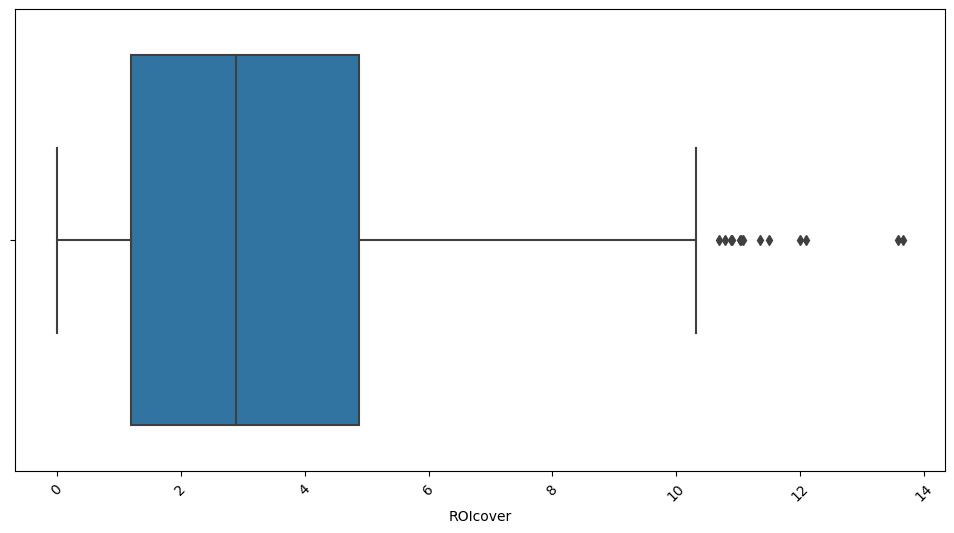

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1200x600 with 0 Axes>

In [80]:
for c in df_acoustic_indices.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=c, data=df_acoustic_indices)
    plt.xticks(rotation=45)
    plt.show()

### Missing values

In [98]:
# Check for missing values in each column
missing_values = df_acoustic_indices.isnull().sum()

# Display columns with missing values (if any)
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

# Display total number of missing values (if any)
total_missing = missing_values.sum()
print(f"\nTotal number of missing values: {total_missing}")

Columns with missing values:
Series([], dtype: int64)

Total number of missing values: 0


In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
df_acoustic_indices['ACTtMean'] = imputer.fit_transform(df_acoustic_indices[['ACTtMean']])

In [57]:
df_acoustic_indices['ACTtMean']

0      13.842583
1       5.393107
2       3.263500
3       5.393107
4       3.458653
         ...    
800     3.738714
801     3.647156
802     3.711973
803     3.614507
804     3.499315
Name: ACTtMean, Length: 805, dtype: float64

### Feature Selection

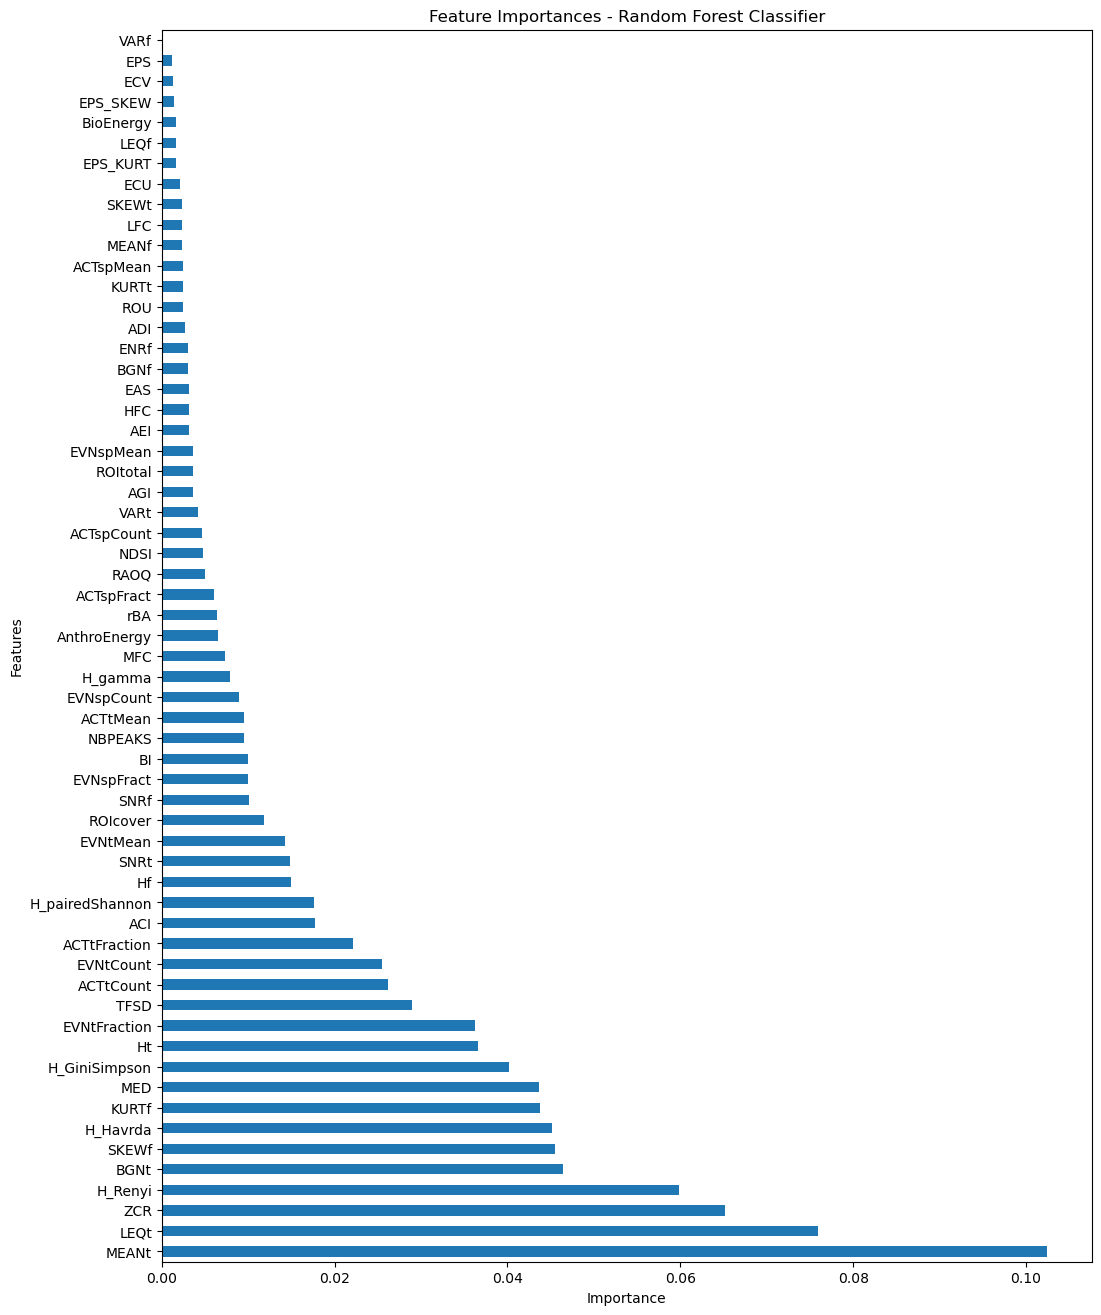

In [82]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df_acoustic_indices is your DataFrame

# Merge 'dynamique_encoded' and 'position_encoded' into a single target column
# Uncomment if running from the beginning
# df_acoustic_indices['target'] = df_acoustic_indices['dynamique_encoded'].astype(str) + df_acoustic_indices['position_encoded'].astype(str)

# Drop the original 'dynamique_encoded' and 'position_encoded' columns
# Uncomment if running from the beginning
# df_acoustic_indices = df_acoustic_indices.drop(['dynamique_encoded', 'position_encoded'], axis=1)

# Set up X and y
X = df_acoustic_indices.drop('target', axis=1)
y = df_acoustic_indices['target']

# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importances with a larger figure size
plt.figure(figsize=(12, 16))  # Adjust the size as needed
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(60).plot(kind='barh')
plt.title('Feature Importances - Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


On peut voir d'après le résultat suivant que les caracteristiques les plus importantes et du coup ceux qu'on peut prendre en considération durant notre entraînement.

In [97]:
df_acoustic_indices

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_Havrda,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,target
1,0.000000,-0.072088,0.000051,0.003911,3.185880,70.220556,-20.692665,0.043466,0.092335,0.999543,...,0.333275,4.325209,5.784790,19461.220470,0.988569,0.890561,1.281302,71,4.644769,01
11,0.000000,-0.072813,0.000090,-0.014172,6.255242,70.337510,-20.537035,0.557070,0.094004,0.996356,...,0.332973,3.414466,5.278418,13069.803481,0.975001,0.654918,1.288285,222,2.968146,01
12,0.000000,-0.072976,0.000079,0.003307,5.079686,70.348330,-20.430637,0.359608,0.095163,0.997580,...,0.333230,4.037077,5.635217,17407.264075,0.985445,0.805686,1.255975,47,0.531742,01
15,0.000000,-0.073095,0.000046,-0.014287,4.405222,70.335240,-20.817322,0.152196,0.091019,0.998949,...,0.333280,4.367142,5.862647,20394.004947,0.989320,0.671477,1.321875,156,3.929075,01
16,0.000000,-0.073064,0.000082,0.014378,4.995273,70.360837,-20.463749,0.326391,0.094801,0.997632,...,0.333228,4.030589,5.640759,18327.612095,0.985526,0.792172,1.314330,170,3.434749,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,4652.500000,-0.000613,0.000014,-0.017152,3.330055,44.638820,-38.683823,0.398622,0.011636,0.990816,...,0.333281,4.377245,5.891395,24634.482218,0.989166,0.788433,1.268436,120,1.888195,10
801,3569.633333,-0.000736,0.000012,-0.023154,3.117847,43.922367,-39.448006,0.337467,0.010656,0.992627,...,0.333270,4.287727,5.962892,26904.440129,0.988983,0.617543,1.228223,89,1.397725,10
802,3219.016667,-0.000821,0.000011,-0.022307,3.076323,43.785281,-39.647648,0.276246,0.010414,0.992826,...,0.333251,4.154682,5.829365,23458.064288,0.987350,0.558751,1.237707,126,3.503223,10
803,2858.183333,-0.000538,0.000014,-0.029085,3.002822,44.435916,-39.012215,0.209081,0.011204,0.994343,...,0.333233,4.052286,5.815305,24360.736006,0.986198,0.417491,1.221268,68,1.950415,10


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()


In [86]:
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Effectuer une validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=10)  # cv=5 signifie 5 plis (folds)

# Afficher les scores de validation croisée
print("Cross-Validation Scores:", cv_scores)
print("Moyenne des Scores:", cv_scores.mean())


C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores: [0.9375  0.90625 0.9375  0.96875 0.96875 0.9375  0.96875 0.96875 1.
 1.     ]
Moyenne des Scores: 0.959375


In [92]:
cv_scores = cross_val_score(model, X_test, y_test, cv=20)  # cv=5 signifie 5 plis (folds)

# Afficher les scores de validation croisée
print("Cross-Validation Scores:", cv_scores)
print("Moyenne des Scores:", cv_scores.mean())


C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=20.
  warnings.warn(


Cross-Validation Scores: [0.75 1.   0.75 0.75 0.75 1.   1.   1.   1.   1.   1.   1.   0.75 0.75
 1.   1.   0.75 1.   0.25 0.75]
Moyenne des Scores: 0.8625


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Liste des modèles à essayer
model = SVC()
model.fit(X_train, y_train)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Modèle: {model.__class__.__name__}")
print("Scores de Validation Croisée:", cv_scores)
print("Moyenne des Scores:", cv_scores.mean())
test_accuracy = model.score(X_test, y_test)
print("Précision sur l'ensemble de test:", test_accuracy)
    
    


Modèle: SVC
Scores de Validation Croisée: [0.703125 0.5625   0.765625 0.640625 0.78125 ]
Moyenne des Scores: 0.690625
Précision sur l'ensemble de test: 0.725


In [102]:
from sklearn.ensemble import GradientBoostingClassifier

# Modèle de Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Scores de validation croisée
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=20)
print(f"Modèle GradientBoostingClassifier")
print("Scores de Validation Croisée:", cv_scores_gb)
print("Moyenne des Scores:", cv_scores_gb.mean())

# Précision sur l'ensemble de test
test_accuracy_gb = gb_model.score(X_test, y_test)
print("Précision sur l'ensemble de test:", test_accuracy_gb)


C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=20.
  warnings.warn(


Modèle GradientBoostingClassifier
Scores de Validation Croisée: [0.9375 0.875  0.8125 0.875  0.875  1.     1.     1.     0.9375 1.
 0.9375 0.9375 1.     1.     1.     1.     1.     1.     1.     1.    ]
Moyenne des Scores: 0.959375
Précision sur l'ensemble de test: 0.9375


In [101]:
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)

# Scores de validation croisée
cv_scores_kernel_svm = cross_val_score(kernel_svm_classifier, X_train, y_train, cv=20)
print(f"Modèle GradientBoostingClassifier")
print("Scores de Validation Croisée:", cv_scores_kernel_svm)
print("Moyenne des Scores:", cv_scores_kernel_svm.mean())

# Précision sur l'ensemble de test
test_accuracy_kernel_svm = kernel_svm_classifier.score(X_test, y_test)
print("Précision sur l'ensemble de test:", test_accuracy_kernel_svm)

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=20.
  warnings.warn(


Modèle GradientBoostingClassifier
Scores de Validation Croisée: [0.75   0.8125 0.75   0.625  0.75   0.5    0.625  0.8125 0.8125 0.75
 0.625  0.8125 0.8125 0.625  0.75   0.8125 0.75   0.75   0.8125 0.75  ]
Moyenne des Scores: 0.734375
Précision sur l'ensemble de test: 0.725


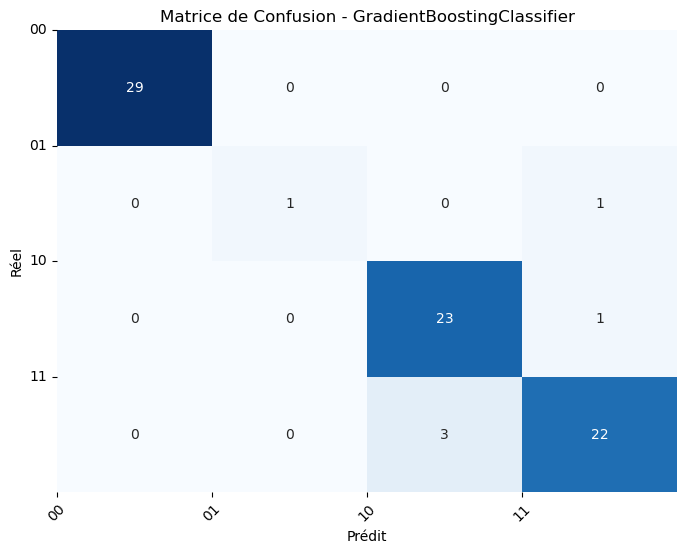

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les classes sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)

# Calculer la matrice de confusion
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Tracer la matrice de confusion à l'aide de seaborn avec les étiquettes de classe
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)

# Récupérer les noms de classe à partir de y_test et y_pred_gb
class_labels = sorted(y_test.unique())

# Ajouter les étiquettes aux axes
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

plt.title('Matrice de Confusion - GradientBoostingClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [112]:
count_elements = len(df_acoustic_indices[df_acoustic_indices['target'] == '01'])
print("Number of elements with target '01':", count_elements)


Number of elements with target '01': 9


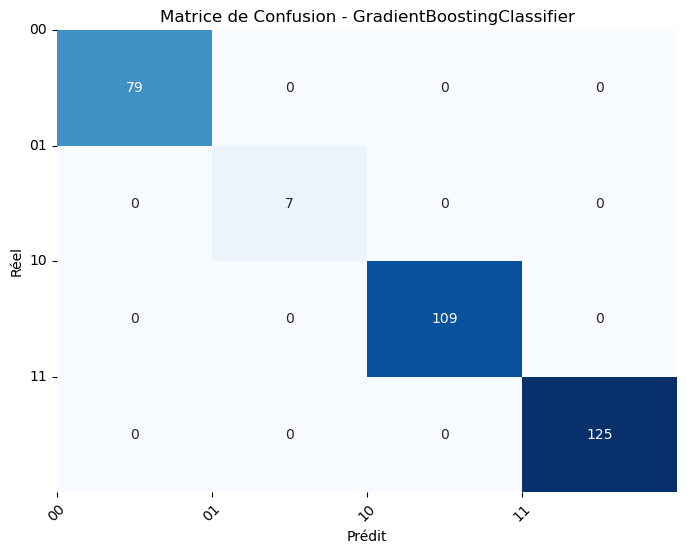

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les classes sur l'ensemble de test
y_pred_gb = gb_model.predict(X_train)

# Calculer la matrice de confusion
conf_matrix_gb = confusion_matrix(y_train, y_pred_gb)

# Tracer la matrice de confusion à l'aide de seaborn avec les étiquettes de classe
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)

# Récupérer les noms de classe à partir de y_test et y_pred_gb
class_labels = sorted(y_test.unique())

# Ajouter les étiquettes aux axes
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

plt.title('Matrice de Confusion - GradientBoostingClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


# VGGish acoustic indices

In [115]:
columns_to_drop = ['station_name', 'file_name']
df_vggish = final_df_vggish.drop(columns_to_drop, axis=1)

In [118]:
from sklearn.preprocessing import LabelEncoder

# Creating the instance of 'LabelEncoder'
label_encoder = LabelEncoder()

# Encoding 'dynamique'
df_vggish['dynamique'] = label_encoder.fit_transform(df_vggish['dynamique'])

# Pour la colonne 'position' dans final_df_acoustic
df_vggish['position'] = label_encoder.fit_transform(df_vggish['position'])



### Matrice de correlation

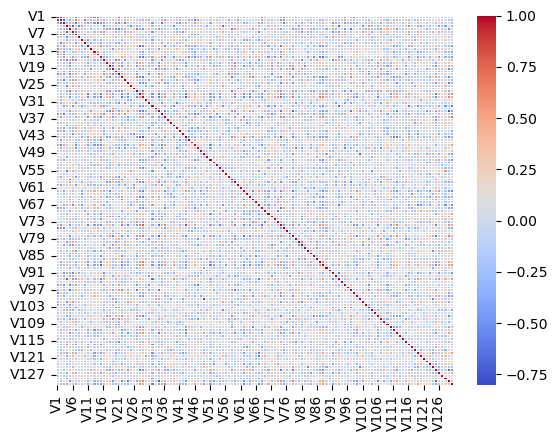

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_vggish.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths = .5)
plt.show()

In [120]:
# Check for missing values in each column
missing_values = df_vggish.isnull().sum()

# Display columns with missing values (if any)
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

# Display total number of missing values (if any)
total_missing = missing_values.sum()
print(f"\nTotal number of missing values: {total_missing}")

Columns with missing values:
Series([], dtype: int64)

Total number of missing values: 0


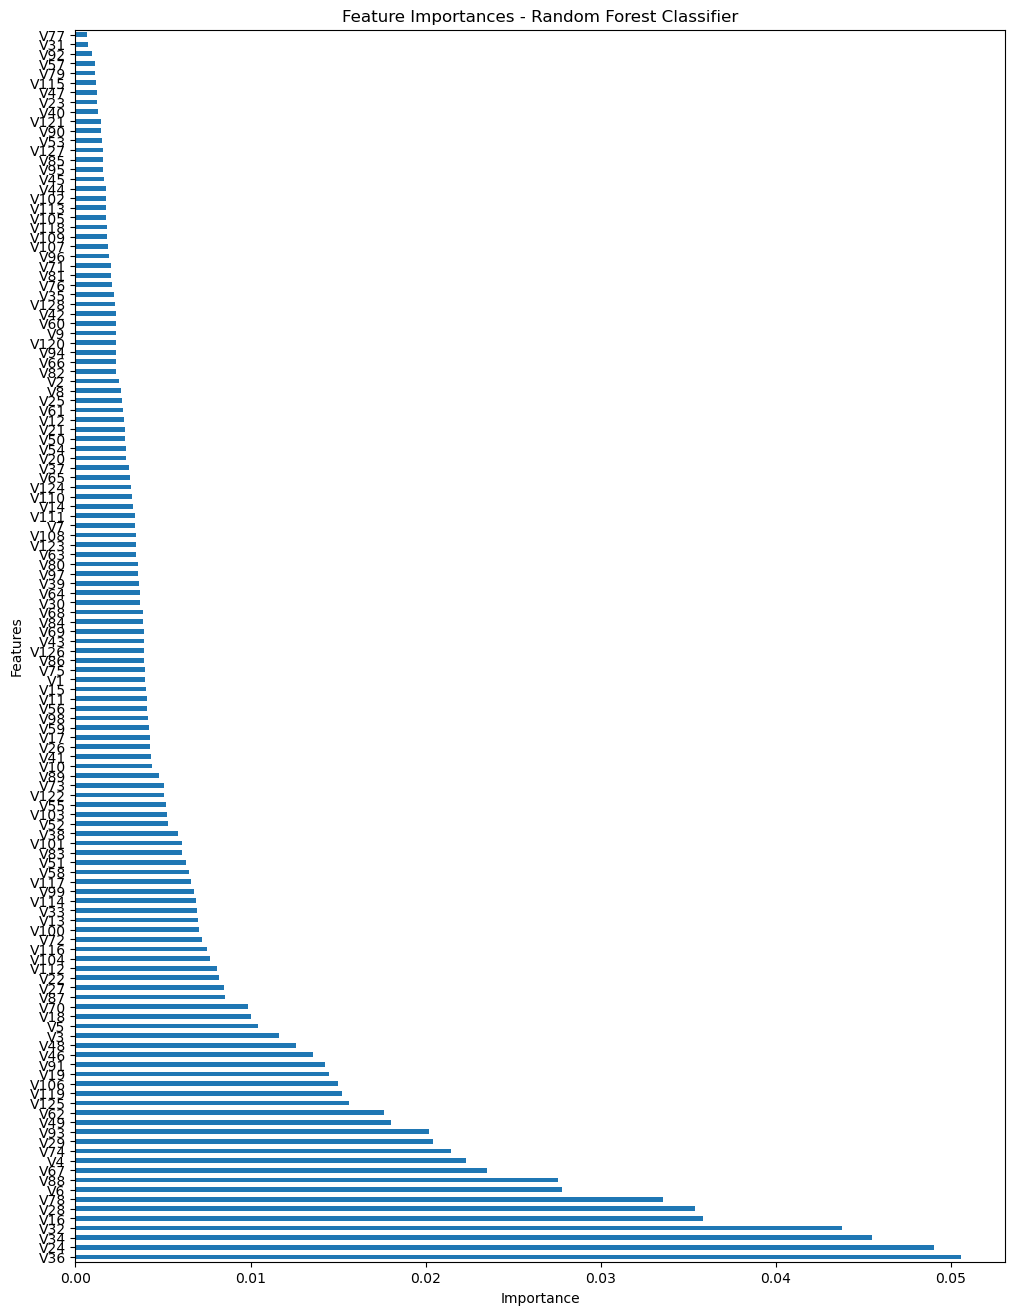

In [123]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df_acoustic_indices is your DataFrame

# Merge 'dynamique' and 'position' into a single target column
# Uncomment if running from the beginning
#df_vggish['target'] = df_vggish['dynamique'].astype(str) + df_vggish['position'].astype(str)

# Drop the original 'dynamique_encoded' and 'position_encoded' columns
# Uncomment if running from the beginning
#df_vggish = df_vggish.drop(['dynamique', 'position'], axis=1)

# Set up X and y
X = df_vggish.drop('target', axis=1)
y = df_vggish['target']

# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importances with a larger figure size
plt.figure(figsize=(12, 16))  # Adjust the size as needed
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(160).plot(kind='barh')
plt.title('Feature Importances - Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Effectuer une validation croisée
cv_scores = cross_val_score(model_rf, X_test, y_test, cv=20)  # cv=5 signifie 5 plis (folds)

# Afficher les scores de validation croisée
print("Cross-Validation Scores:", cv_scores)
print("Moyenne des Scores:", cv_scores.mean())

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=20.
  warnings.warn(


Cross-Validation Scores: [0.77777778 1.         0.875      0.875      1.         1.
 0.875      1.         0.875      1.         0.75       0.625
 0.875      0.875      0.875      0.75       0.75       0.625
 0.75       0.875     ]
Moyenne des Scores: 0.851388888888889


In [129]:
gb_model.fit(X_train, y_train)

# Scores de validation croisée
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=20)
print(f"Modèle GradientBoostingClassifier")
print("Scores de Validation Croisée:", cv_scores_gb)
print("Moyenne des Scores:", cv_scores_gb.mean())

# Précision sur l'ensemble de test
test_accuracy_gb = gb_model.score(X_test, y_test)
print("Précision sur l'ensemble de test:", test_accuracy_gb)

Modèle GradientBoostingClassifier
Scores de Validation Croisée: [0.90909091 0.93939394 1.         0.96969697 0.90625    0.90625
 0.90625    1.         0.9375     0.875      1.         0.96875
 0.96875    0.9375     0.90625    0.9375     0.90625    0.96875
 0.84375    0.875     ]
Moyenne des Scores: 0.933096590909091
Précision sur l'ensemble de test: 0.9316770186335404


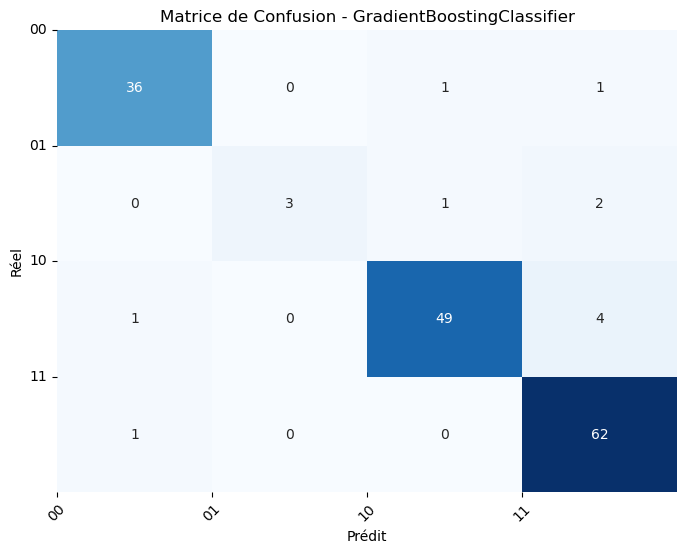

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les classes sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)

# Calculer la matrice de confusion
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Tracer la matrice de confusion à l'aide de seaborn avec les étiquettes de classe
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)

# Récupérer les noms de classe à partir de y_test et y_pred_gb
class_labels = sorted(y_test.unique())

# Ajouter les étiquettes aux axes
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

plt.title('Matrice de Confusion - GradientBoostingClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()
